# House Price Prediction Using Advanced Regression

A US-based housing company named Surprise Housing has decided to enter the Australian market. The company uses data analytics to purchase houses at a price below their actual values and flip them on at a higher price. For the same purpose, the company has collected a data set from the sale of houses in Australia.

Business Goal

The company wants to know:

Which variables are significant in predicting the price of a house, and

How well those variables describe the price of a house.

In [2]:
#Importing the important libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


# 1. Data Import and Understanding the data

In [161]:
data = pd.read_csv('train.csv')

In [162]:
data.head()

Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0   1          60       RL         65.0     8450   Pave   NaN      Reg   
1   2          20       RL         80.0     9600   Pave   NaN      Reg   
2   3          60       RL         68.0    11250   Pave   NaN      IR1   
3   4          70       RL         60.0     9550   Pave   NaN      IR1   
4   5          60       RL         84.0    14260   Pave   NaN      IR1   

  LandContour Utilities  ... PoolArea PoolQC Fence MiscFeature MiscVal MoSold  \
0         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      2   
1         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      5   
2         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      9   
3         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      2   
4         Lvl    AllPub  ...        0    NaN   NaN         NaN       0     12   

  YrSold  SaleType  SaleCondition  SalePrice  
0   2008        WD         Normal     208500  
1   2007        WD         Normal     181500  
2   2008        WD         Normal     223500  
3   2006        WD        Abnorml     140000  
4   2008        WD         Normal     250000  

[5 rows x 81 columns]

In [163]:
#checking the shape of the dataset
total_records= data.shape[0]  #storing total no. of records in a variable
data.shape

(1460, 81)

In [164]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [165]:
data.describe()

Id   MSSubClass  LotFrontage        LotArea  OverallQual  \
count  1460.000000  1460.000000  1201.000000    1460.000000  1460.000000   
mean    730.500000    56.897260    70.049958   10516.828082     6.099315   
std     421.610009    42.300571    24.284752    9981.264932     1.382997   
min       1.000000    20.000000    21.000000    1300.000000     1.000000   
25%     365.750000    20.000000    59.000000    7553.500000     5.000000   
50%     730.500000    50.000000    69.000000    9478.500000     6.000000   
75%    1095.250000    70.000000    80.000000   11601.500000     7.000000   
max    1460.000000   190.000000   313.000000  215245.000000    10.000000   

       OverallCond    YearBuilt  YearRemodAdd   MasVnrArea   BsmtFinSF1  ...  \
count  1460.000000  1460.000000   1460.000000  1452.000000  1460.000000  ...   
mean      5.575342  1971.267808   1984.865753   103.685262   443.639726  ...   
std       1.112799    30.202904     20.645407   181.066207   456.098091  ...   
min       1.000000  1872.000000   1950.000000     0.000000     0.000000  ...   
25%       5.000000  1954.000000   1967.000000     0.000000     0.000000  ...   
50%       5.000000  1973.000000   1994.000000     0.000000   383.500000  ...   
75%       6.000000  2000.000000   2004.000000   166.000000   712.250000  ...   
max       9.000000  2010.000000   2010.000000  1600.000000  5644.000000  ...   

        WoodDeckSF  OpenPorchSF  EnclosedPorch    3SsnPorch  ScreenPorch  \
count  1460.000000  1460.000000    1460.000000  1460.000000  1460.000000   
mean     94.244521    46.660274      21.954110     3.409589    15.060959   
std     125.338794    66.256028      61.119149    29.317331    55.757415   
min       0.000000     0.000000       0.000000     0.000000     0.000000   
25%       0.000000     0.000000       0.000000     0.000000     0.000000   
50%       0.000000    25.000000       0.000000     0.000000     0.000000   
75%     168.000000    68.000000       0.000000     0.000000     0.000000   
max     857.000000   547.000000     552.000000   508.000000   480.000000   

          PoolArea       MiscVal       MoSold       YrSold      SalePrice  
count  1460.000000   1460.000000  1460.000000  1460.000000    1460.000000  
mean      2.758904     43.489041     6.321918  2007.815753  180921.195890  
std      40.177307    496.123024     2.703626     1.328095   79442.502883  
min       0.000000      0.000000     1.000000  2006.000000   34900.000000  
25%       0.000000      0.000000     5.000000  2007.000000  129975.000000  
50%       0.000000      0.000000     6.000000  2008.000000  163000.000000  
75%       0.000000      0.000000     8.000000  2009.000000  214000.000000  
max     738.000000  15500.000000    12.000000  2010.000000  755000.000000  

[8 rows x 38 columns]

# 2. Data Cleaning and Manipulating the data

In [166]:
#Dropping the duplicate records for the data if there are any
data = data.drop_duplicates()

In [167]:
# columnwise null values
missing_val_cols_prcnt = round(100*data.isnull().sum()/len(data.index),2)
missing = pd.DataFrame(missing_val_cols_prcnt[missing_val_cols_prcnt!=0])
missing

0
LotFrontage   17.74
Alley         93.77
MasVnrType     0.55
MasVnrArea     0.55
BsmtQual       2.53
BsmtCond       2.53
BsmtExposure   2.60
BsmtFinType1   2.53
BsmtFinType2   2.60
Electrical     0.07
FireplaceQu   47.26
GarageType     5.55
GarageYrBlt    5.55
GarageFinish   5.55
GarageQual     5.55
GarageCond     5.55
PoolQC        99.52
Fence         80.75
MiscFeature   96.30

In [168]:
# Checking the missing values 
my_cols = missing.index
vals = missing[0]
missing_data = pd.DataFrame({'features':my_cols,'percent':vals})
missing_data = missing_data.sort_values(by='percent', ascending=False)

In [169]:
##Checking the null values in the categorical columns

cat_obj_null_cols = data.select_dtypes(include='object')   #Retaining only the object types as categorical columns and their null value %
missing_cat_obj_null_prcnt = round(100*cat_obj_null_cols.isnull().sum()/len(cat_obj_null_cols.index),2)
missing_cat_obj_null_prcnt = missing_cat_obj_null_prcnt[missing_cat_obj_null_prcnt!=0]
missing_cat_obj_null_prcnt

Alley           93.77
MasVnrType       0.55
BsmtQual         2.53
BsmtCond         2.53
BsmtExposure     2.60
BsmtFinType1     2.53
BsmtFinType2     2.60
Electrical       0.07
FireplaceQu     47.26
GarageType       5.55
GarageFinish     5.55
GarageQual       5.55
GarageCond       5.55
PoolQC          99.52
Fence           80.75
MiscFeature     96.30
dtype: float64

In [170]:
#Replacing null values with 'None'
cat_null_obj_cols = ['Alley', 'MasVnrType', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'FireplaceQu', 
            'GarageType', 'GarageFinish', 'GarageQual', 'GarageCond', 'PoolQC', 'Fence', 'MiscFeature','Electrical']
for column in cat_null_obj_cols:
    data[column]= data[column].fillna('None')

In [171]:
##Checking the null values in the categorical columns (only object types)
cat_obj_null_cols = data.select_dtypes(include='object')   #Retaining only object types categorical columns
missing_cat_obj_null_prcnt = round(100*cat_obj_null_cols.isnull().sum()/len(cat_obj_null_cols.index),2)
missing_cat_obj_null_prcnt = missing_cat_obj_null_prcnt[missing_cat_obj_null_prcnt!=0]
missing_cat_obj_null_prcnt

Series([], dtype: float64)

In [172]:
##Remove the categorical features that has more than 80% data associated to one single value
def get_cols_imbal(data, prcnt):
    data1= data.copy()
    my_list= []
    cat_obj_cols = data1.select_dtypes(include=['object'])
    for col in (cat_obj_cols):
        if(data1[col].value_counts().max() > int(prcnt*len(data1.index)/100)):
            my_list.append(col)
    return my_list

In [173]:
##Removing the skewed data
columns_to_be_removed = get_cols_imbal(data=data, prcnt=80)  
print("Categorical object type columns removed:",columns_to_be_removed)
print("\nNumber of categorical object type columns removed: ", len(columns_to_be_removed),"\n")

Categorical object type columns removed: ['Street', 'Alley', 'LandContour', 'Utilities', 'LandSlope', 'Condition1', 'Condition2', 'BldgType', 'RoofMatl', 'ExterCond', 'BsmtCond', 'BsmtFinType2', 'Heating', 'CentralAir', 'Electrical', 'Functional', 'GarageQual', 'GarageCond', 'PavedDrive', 'PoolQC', 'Fence', 'MiscFeature', 'SaleType', 'SaleCondition']

Number of categorical object type columns removed:  24 



In [174]:
##Dropping columns with skewed data (object type categorical variables)
data = data.drop(columns_to_be_removed, axis=1)
data.head()

Id  MSSubClass MSZoning  LotFrontage  LotArea LotShape LotConfig  \
0   1          60       RL         65.0     8450      Reg    Inside   
1   2          20       RL         80.0     9600      Reg       FR2   
2   3          60       RL         68.0    11250      IR1    Inside   
3   4          70       RL         60.0     9550      IR1    Corner   
4   5          60       RL         84.0    14260      IR1       FR2   

  Neighborhood HouseStyle  OverallQual  ...  WoodDeckSF  OpenPorchSF  \
0      CollgCr     2Story            7  ...           0           61   
1      Veenker     1Story            6  ...         298            0   
2      CollgCr     2Story            7  ...           0           42   
3      Crawfor     2Story            7  ...           0           35   
4      NoRidge     2Story            8  ...         192           84   

   EnclosedPorch 3SsnPorch ScreenPorch PoolArea MiscVal  MoSold YrSold  \
0              0         0           0        0       0       2   2008   
1              0         0           0        0       0       5   2007   
2              0         0           0        0       0       9   2008   
3            272         0           0        0       0       2   2006   
4              0         0           0        0       0      12   2008   

  SalePrice  
0    208500  
1    181500  
2    223500  
3    140000  
4    250000  

[5 rows x 57 columns]

In [175]:
data.shape

(1460, 57)

In [176]:
##Recheck null values in the categorical columns
cat_obj_null_cols = data.select_dtypes(include='object')   #Retaining only object types categorical columns
missing_cat_obj_null_prcnt = round(100*cat_obj_null_cols.isnull().sum()/len(cat_obj_null_cols.index),2)
missing_cat_obj_null_prcnt = missing_cat_obj_null_prcnt[missing_cat_obj_null_prcnt!=0]
missing_cat_obj_null_prcnt

Series([], dtype: float64)

In [177]:
##Creating a dataframe with object type categorical variables
obj_type_cat = data.select_dtypes(include='object').columns
data_obj_cat = data.loc[:,obj_type_cat]
data_obj_cat.head()

MSZoning LotShape LotConfig Neighborhood HouseStyle RoofStyle Exterior1st  \
0       RL      Reg    Inside      CollgCr     2Story     Gable     VinylSd   
1       RL      Reg       FR2      Veenker     1Story     Gable     MetalSd   
2       RL      IR1    Inside      CollgCr     2Story     Gable     VinylSd   
3       RL      IR1    Corner      Crawfor     2Story     Gable     Wd Sdng   
4       RL      IR1       FR2      NoRidge     2Story     Gable     VinylSd   

  Exterior2nd MasVnrType ExterQual Foundation BsmtQual BsmtExposure  \
0     VinylSd    BrkFace        Gd      PConc       Gd           No   
1     MetalSd       None        TA     CBlock       Gd           Gd   
2     VinylSd    BrkFace        Gd      PConc       Gd           Mn   
3     Wd Shng       None        TA     BrkTil       TA           No   
4     VinylSd    BrkFace        Gd      PConc       Gd           Av   

  BsmtFinType1 HeatingQC KitchenQual FireplaceQu GarageType GarageFinish  
0          GLQ        Ex          Gd        None     Attchd          RFn  
1          ALQ        Ex          TA          TA     Attchd          RFn  
2          GLQ        Ex          Gd          TA     Attchd          RFn  
3          ALQ        Gd          Gd          Gd     Detchd          Unf  
4          GLQ        Ex          Gd          TA     Attchd          RFn

In [178]:
data_obj_cat.columns

Index(['MSZoning', 'LotShape', 'LotConfig', 'Neighborhood', 'HouseStyle',
       'RoofStyle', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'ExterQual',
       'Foundation', 'BsmtQual', 'BsmtExposure', 'BsmtFinType1', 'HeatingQC',
       'KitchenQual', 'FireplaceQu', 'GarageType', 'GarageFinish'],
      dtype='object')

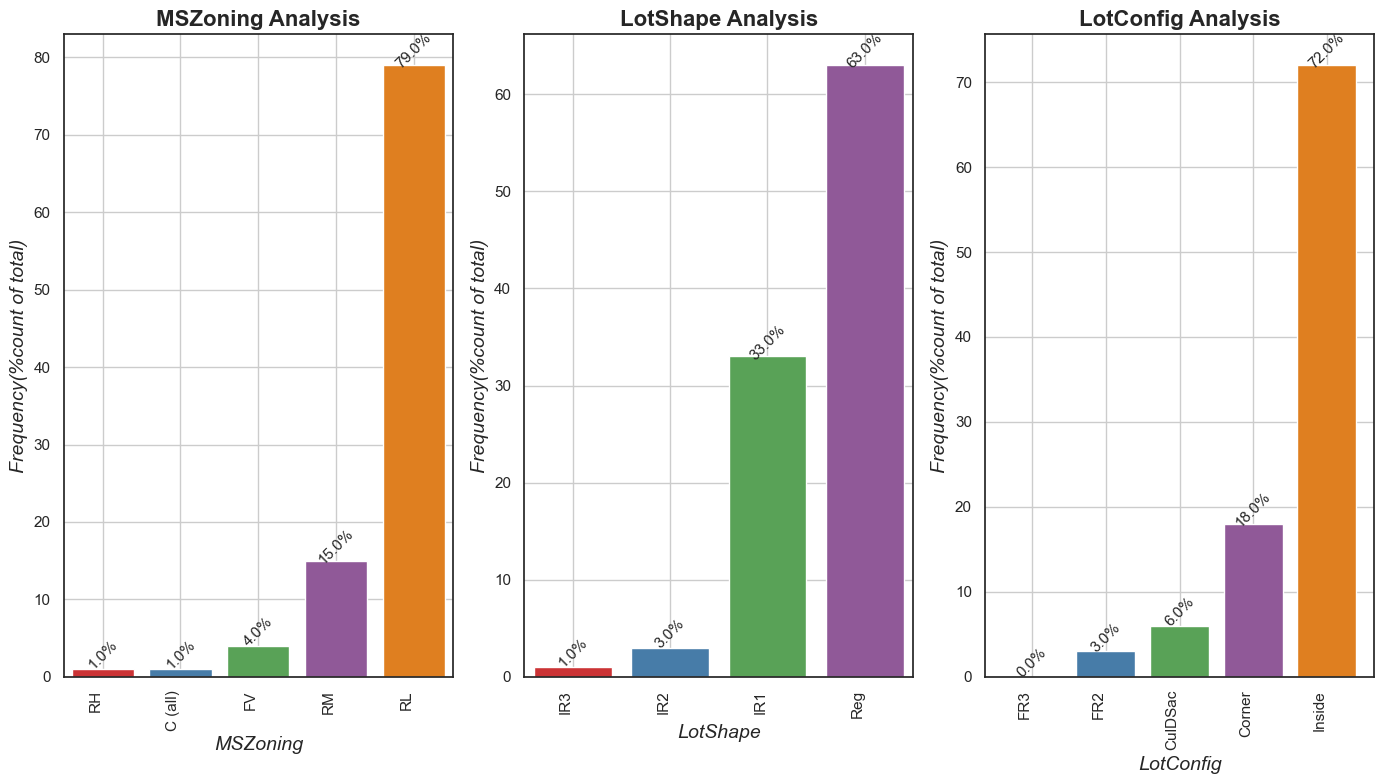

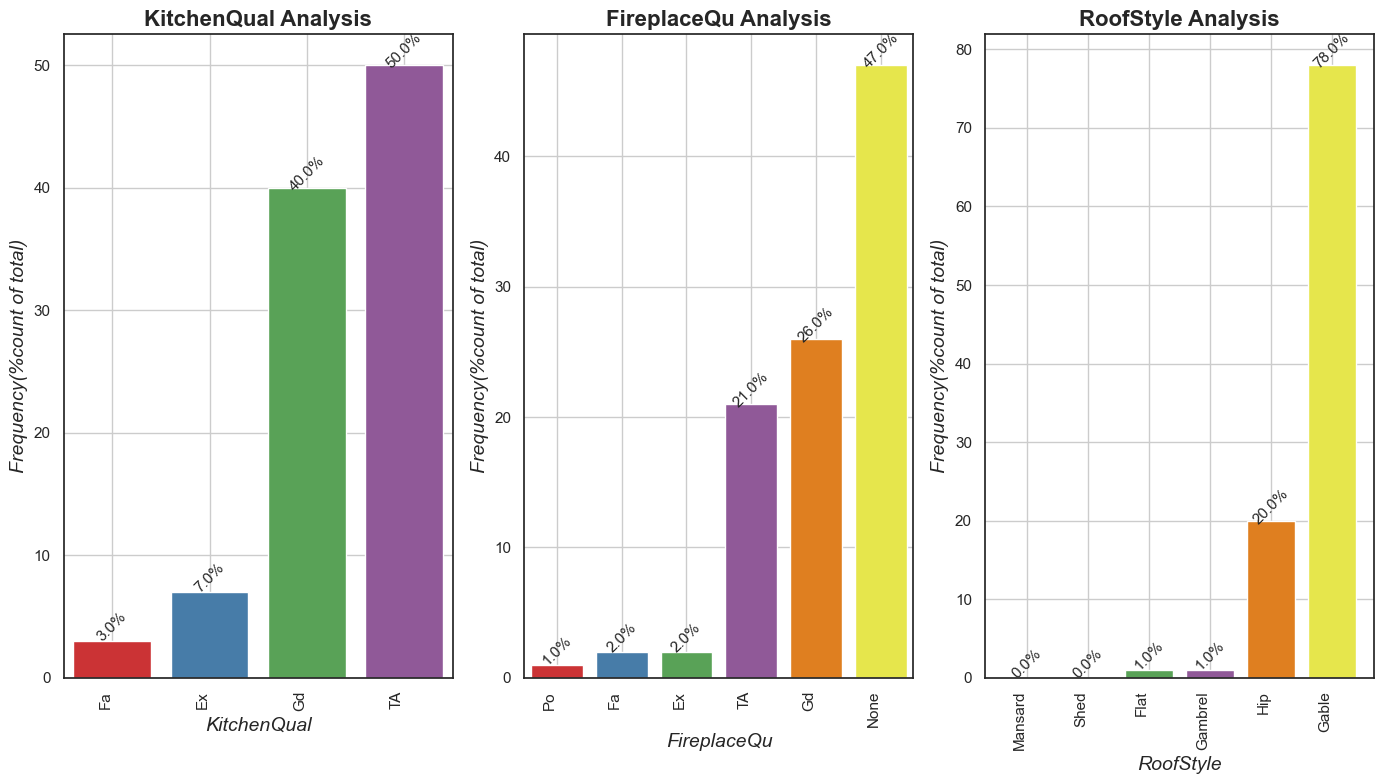

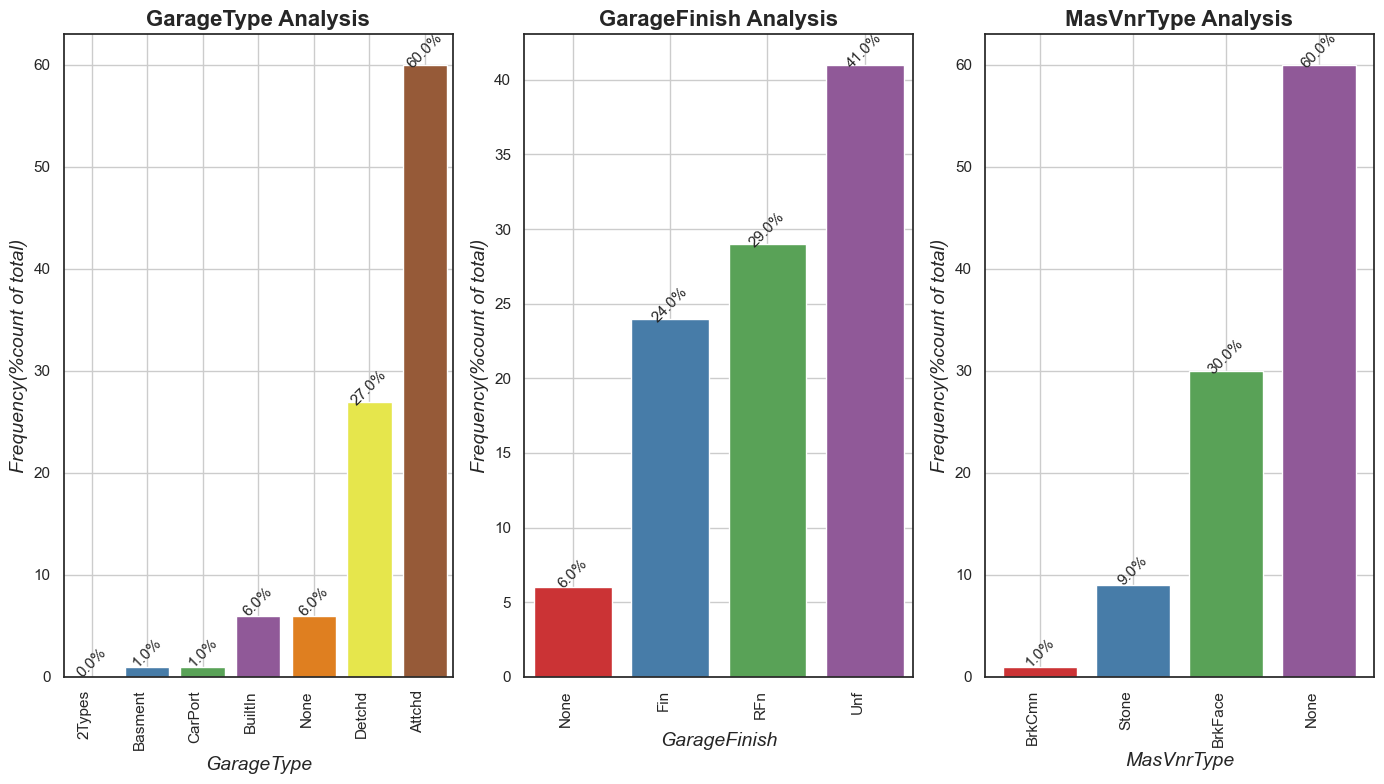

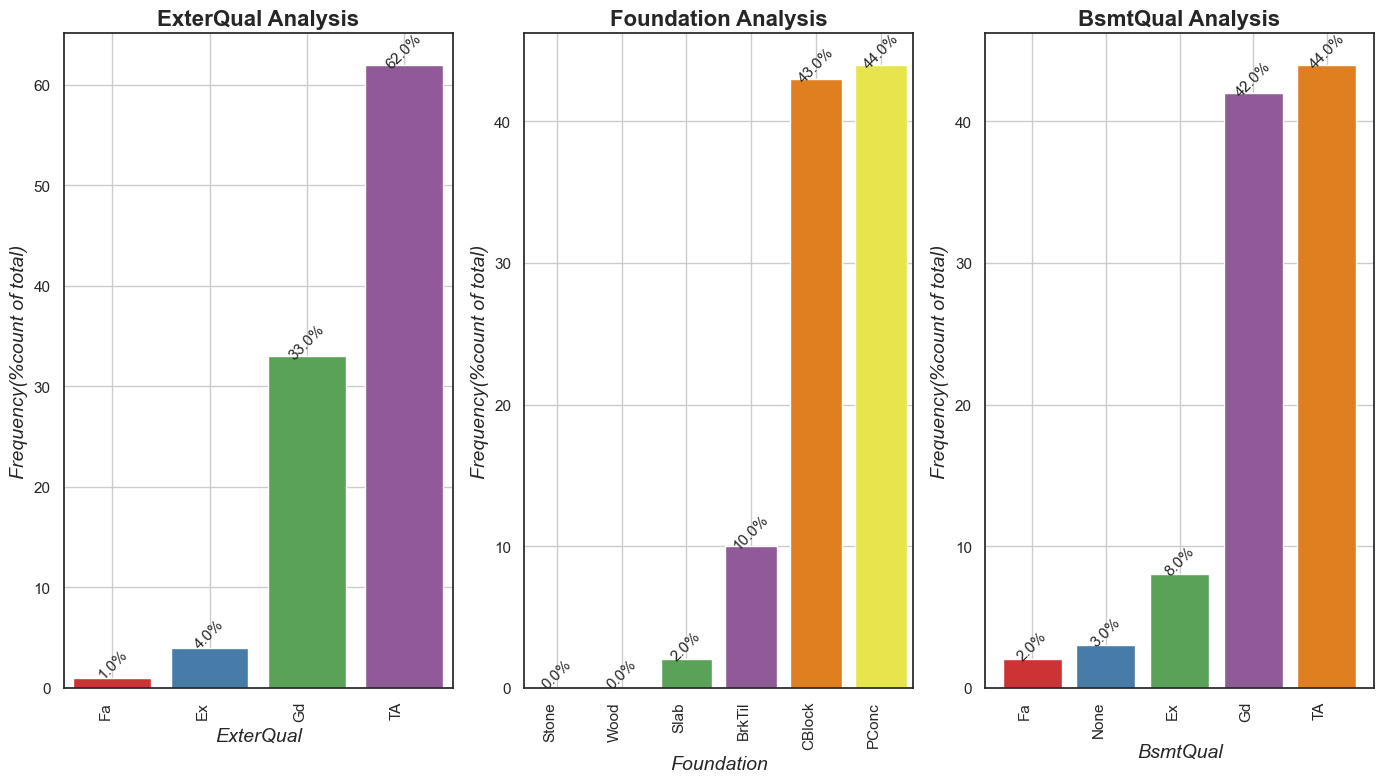

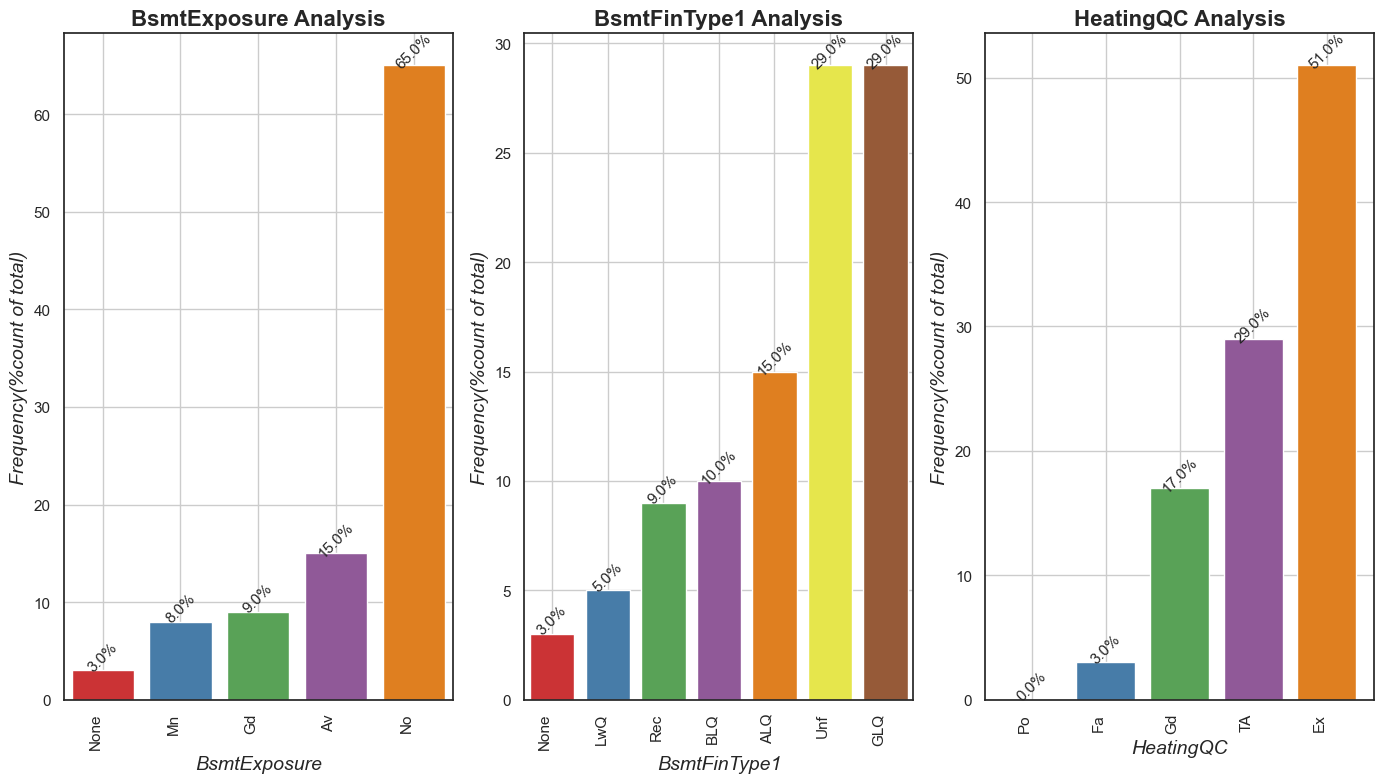

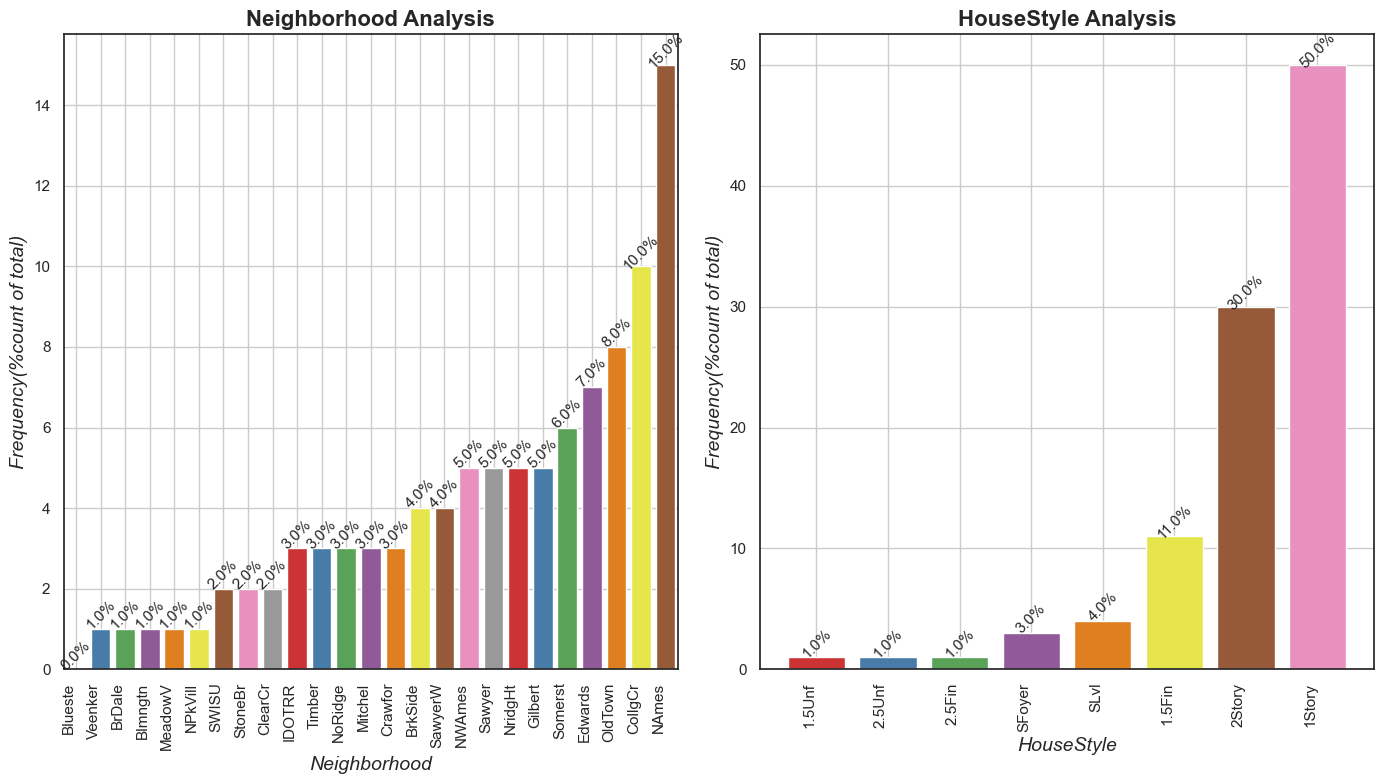

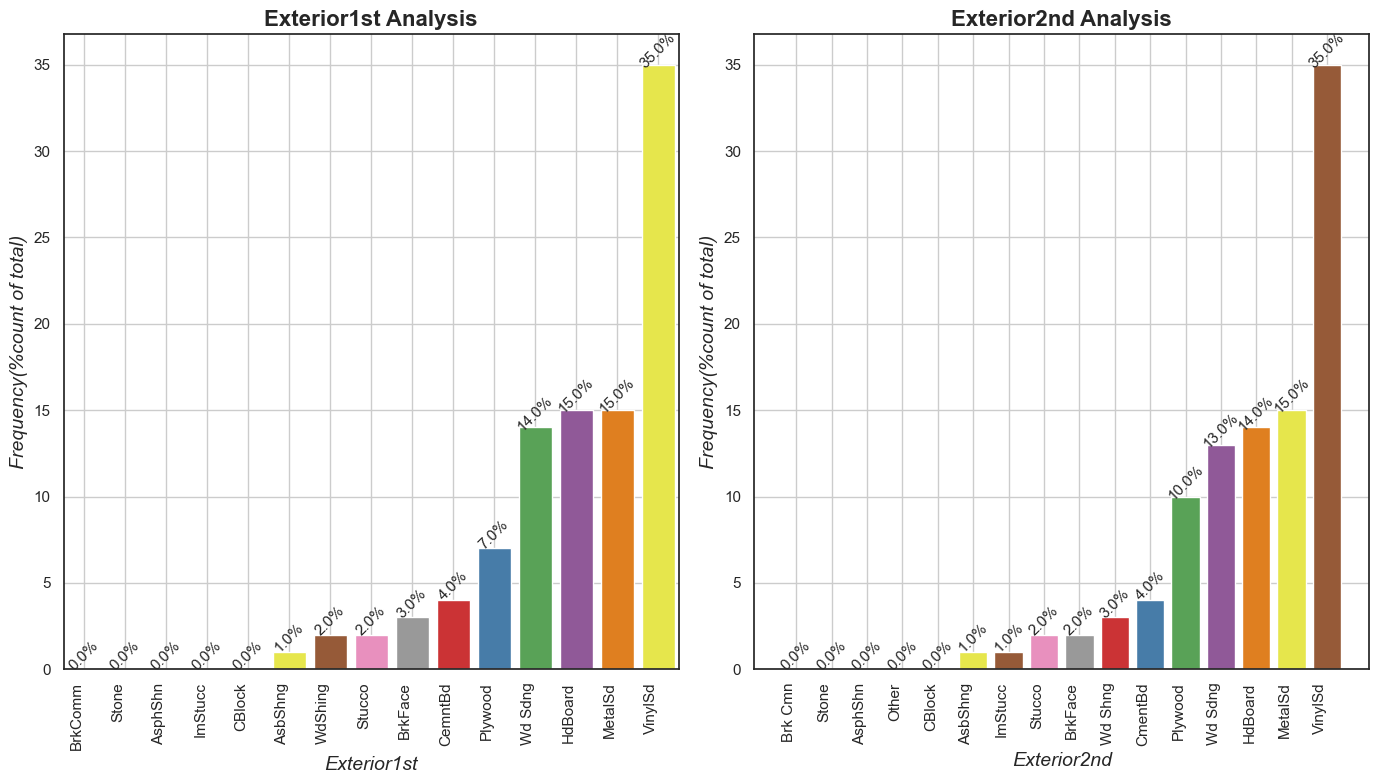

In [179]:
##Creating a function for 'categorical_freq_prcnt_plt'
def categorical_freq_prcnt_plt(data,f1,f2,f3):
    if(f3!=0):
        data= data.copy()
        sns.set(style='white')
        plt.figure(figsize=(14, 8), dpi=100)
        
        plt.subplot(131)  #subplot(131)
        ab = pd.DataFrame((data[f1].value_counts(normalize=True)*100).round(0).sort_values())
        ab.reset_index(inplace=True)
        ab1 = sns.barplot(x='index',y=f1, data=ab, palette='Set1')
        
        plt.setp(ab1.get_xticklabels(), rotation=90, horizontalalignment='right')
        plt.xlabel(f1, fontsize= 14, fontstyle='italic')
        plt.ylabel('Frequency(%count of total)', fontsize= 14, fontstyle='italic')
        plt.title(f1+' Analysis', fontsize=16, fontweight='bold')
        plt.grid(True)
        
        for i in ab1.patches:
            ab1.annotate(format(i.get_height())+"%", (i.get_x() + i.get_width() / 2.\
                                                         , i.get_height()), ha = 'center'\
                , va = 'center', xytext = (0, 10), textcoords = 'offset points',rotation=45, fontsize=11)
        
        plt.subplot(132)  #subplot(132)
        cn = pd.DataFrame((data[f2].value_counts(normalize=True)*100).round(0).sort_values())
        cn.reset_index(inplace=True)
        ab2 = sns.barplot(x='index',y=f2, data=cn, palette='Set1')
        
        plt.setp(ab2.get_xticklabels(), rotation=90, horizontalalignment='right')
        plt.xlabel(f2, fontsize= 14, fontstyle='italic')
        plt.ylabel('Frequency(%count of total)', fontsize= 14, fontstyle='italic')
        plt.title(f2+' Analysis', fontsize=16, fontweight='bold')
        plt.grid(True)
        
        for i in ab2.patches:
            ab2.annotate(format(i.get_height())+"%", (i.get_x() + i.get_width() / 2.\
                                                         , i.get_height()), ha = 'center'\
                , va = 'center', xytext = (0, 10), textcoords = 'offset points',rotation=45, fontsize=11)
        
        plt.subplot(133)  #subplot(133)
        ef = pd.DataFrame((data[f3].value_counts(normalize=True)*100).round(0).sort_values())
        ef.reset_index(inplace=True)
        ab3 = sns.barplot(x='index',y=f3, data=ef, palette='Set1')
        
        plt.setp(ab3.get_xticklabels(), rotation=90, horizontalalignment='right')
        plt.xlabel(f3, fontsize= 14, fontstyle='italic')
        plt.ylabel('Frequency(%count of total)', fontsize= 14, fontstyle='italic')
        plt.title(f3+' Analysis', fontsize=16, fontweight='bold')
        
        for i in ab3.patches:
            ab3.annotate(format(i.get_height())+"%", (i.get_x() + i.get_width() / 2.\
                                                         , i.get_height()), ha = 'center'\
                , va = 'center', xytext = (0, 10), textcoords = 'offset points',rotation=45, fontsize=11)
            
        plt.grid(True)
        plt.tight_layout()
        plt.autoscale()
        plt.show()
    else:
        df= data.copy()
        sns.set(style='white')
        plt.figure(figsize=(14, 8), dpi=100)
        
        plt.subplot(121)  #subplot(121)
        ab = pd.DataFrame((df[f1].value_counts(normalize=True)*100).round(0).sort_values())
        ab.reset_index(inplace=True)
        ab1 = sns.barplot(x='index',y=f1, data=ab, palette='Set1')
        
        plt.setp(ab1.get_xticklabels(), rotation=90, horizontalalignment='right')
        plt.xlabel(f1, fontsize= 14, fontstyle='italic')
        plt.ylabel('Frequency(%count of total)', fontsize= 14, fontstyle='italic')
        plt.title(f1+' Analysis', fontsize=16, fontweight='bold')
        plt.grid(True)
        
        for i in ab1.patches:
            ab1.annotate(format(i.get_height())+"%", (i.get_x() + i.get_width() / 2.\
                                                         , i.get_height()), ha = 'center'\
                , va = 'center', xytext = (0, 10), textcoords = 'offset points',rotation=45, fontsize=11)
        
        plt.subplot(122)  #subplot(122)
        cn = pd.DataFrame((df[f2].value_counts(normalize=True)*100).round(0).sort_values())
        cn.reset_index(inplace=True)
        ab2 = sns.barplot(x='index',y=f2, data=cn, palette='Set1')
        
        plt.setp(ab2.get_xticklabels(), rotation=90, horizontalalignment='right')
        plt.xlabel(f2, fontsize= 14, fontstyle='italic')
        plt.ylabel('Frequency(%count of total)', fontsize= 14, fontstyle='italic')
        plt.title(f2+' Analysis', fontsize=16, fontweight='bold')
        
        for i in ab2.patches:
            ab2.annotate(format(i.get_height())+"%", (i.get_x() + i.get_width() / 2.\
                                                         , i.get_height()), ha = 'center'\
                , va = 'center', xytext = (0, 10), textcoords = 'offset points',rotation=45, fontsize=11)
        
        plt.grid(True)
        plt.tight_layout()
        plt.autoscale()
        plt.show()
        
    
categorical_freq_prcnt_plt(data,'MSZoning','LotShape','LotConfig')
categorical_freq_prcnt_plt(data,'KitchenQual', 'FireplaceQu','RoofStyle')
categorical_freq_prcnt_plt(data,'GarageType', 'GarageFinish', 'MasVnrType')
categorical_freq_prcnt_plt(data,'ExterQual','Foundation', 'BsmtQual')
categorical_freq_prcnt_plt(data,'BsmtExposure', 'BsmtFinType1', 'HeatingQC')
categorical_freq_prcnt_plt(data, 'Neighborhood', 'HouseStyle',0)
categorical_freq_prcnt_plt(data,'Exterior1st', 'Exterior2nd', 0) 

# Major takeaways from the analysis for far is as below:

Most preferred choices:
- (MSZoning) zone of the sale:'RL'(Residential Low Density) followed by 'RM'(Residential Medium Density).
- LotShape: Reg(Regular) type
- LotConfig: Inside(Inside lot)
- No significant preference w.r.t following features:
--(i) FireplaceQu (Quality), MasVnrType: 'None'
--(ii) KitchenQual (Quality), ExterQual (Quality of exterior material), BsmtQual (Height of basement):'TA'(Typical/Average)
- RoofStyle: 'Gable'
- GarageType: Attached
- GarageFinish: Unfinished
- Foundation: Poured Concrete
- (BsmtFinType1) Rating of Basement Fin. Area: Good Living Quarters and Unfinished
- HeatingQC: Excellent
- Neighborhood: North Ames, followed by College Creek
- HouseStyle: One story, followed by Two story.
- Exterior1st (Exterior covering on the house) and Exterior2nd (if more than one material on exterior): Vinyl Siding, followed by Metal Siding
- Basement Exposure: No Exposure

In [180]:
##Checking null values in the numeric columns.

numeric_null_cols = data.select_dtypes(include=['int64','float64','int32','float32'])   #Retaining only int and float data types for numeric columns
missing_numeric_null_prcnt = round(100*numeric_null_cols.isnull().sum()/len(numeric_null_cols.index),2)
missing_numeric_null_prcnt = missing_numeric_null_prcnt[missing_numeric_null_prcnt!=0]
missing_numeric_null_prcnt

LotFrontage    17.74
MasVnrArea      0.55
GarageYrBlt     5.55
dtype: float64

In [181]:
print("LotFrontage Stats:\n",data.LotFrontage.describe(percentiles=[0.1, .25, .50, .75, .85, .90, .95, .98, .99, 1]))
print("\nMasVnrArea Stats:\n",data.MasVnrArea.describe(percentiles=[0.1, .25, .50, .75, .85, .90, .95, .98, .99, 1]))

LotFrontage Stats:
 count    1201.000000
mean       70.049958
std        24.284752
min        21.000000
10%        44.000000
25%        59.000000
50%        69.000000
75%        80.000000
85%        90.000000
90%        96.000000
95%       107.000000
98%       124.000000
99%       141.000000
100%      313.000000
max       313.000000
Name: LotFrontage, dtype: float64

MasVnrArea Stats:
 count    1452.000000
mean      103.685262
std       181.066207
min         0.000000
10%         0.000000
25%         0.000000
50%         0.000000
75%       166.000000
85%       262.350000
90%       335.000000
95%       456.000000
98%       650.980000
99%       791.920000
100%     1600.000000
max      1600.000000
Name: MasVnrArea, dtype: float64


In [182]:
##For 'MasVnrArea', finding the median by removing all the values at 0.0 percentile for accurate value
updated_MasVnrArea = data.MasVnrArea[~(data.MasVnrArea==0)]
print("\nMasVnrArea Stats:\n",updated_MasVnrArea.describe(percentiles=[0.1, .25, .50, .75, .85, .90, .95, .98, .99, 1]))


MasVnrArea Stats:
 count     591.000000
mean      254.739425
std       205.144174
min         1.000000
10%        70.000000
25%       113.000000
50%       203.000000
75%       330.500000
85%       424.500000
90%       481.000000
95%       650.500000
98%       862.000000
99%      1032.600000
100%     1600.000000
max      1600.000000
Name: MasVnrArea, dtype: float64


In [183]:
##Filling the null values with 0 for 'GarageYrBlt'

data['GarageYrBlt']= data['GarageYrBlt'].fillna(0)
data['GarageYrBlt'] = data['GarageYrBlt'].astype(int) 

In [184]:
##Recheck null values in the numeric columns.

numeric_null_cols = data.select_dtypes(include=['int64','float64','int32','float32'])   #Retaining only int and float data types for numeric columns
missing_numeric_null_prcnt = round(100*numeric_null_cols.isnull().sum()/len(numeric_null_cols.index),2)
missing_numeric_null_prcnt = missing_numeric_null_prcnt[missing_numeric_null_prcnt!=0]
missing_numeric_null_prcnt

LotFrontage    17.74
MasVnrArea      0.55
dtype: float64

In [185]:
##Impute the null values with median values for 'LotFrontage' and 'MasVnrArea' columns

data['LotFrontage'] = data['LotFrontage'].replace(np.nan, data['LotFrontage'].median())
data['MasVnrArea'] = data['MasVnrArea'].replace(np.nan, updated_MasVnrArea.median())

In [186]:
##Recheck null values in the numeric columns.

numeric_null_cols = data.select_dtypes(include=['int64','float64','int32','float32'])   #Retaining only int and float data types for numeric columns
missing_numeric_null_prcnt = round(100*numeric_null_cols.isnull().sum()/len(numeric_null_cols.index),2)
missing_numeric_null_prcnt = missing_numeric_null_prcnt[missing_numeric_null_prcnt!=0]
missing_numeric_null_prcnt

Series([], dtype: float64)

There areNo null values present in the numeric columns of the dataset now.

In [187]:
##Create a new column named 'Is Remodelled': This column would determine whether the house has been remodelled or not based on 'YearBuilt' anf 'YearRemodAdd' 

def Remodel_Check(row):     ##Based on the difference between remodelled and built years
    if(row['YearBuilt'] == row['YearRemodAdd']):
        return 0     #Indicate not Remodelled
    elif (row['YearBuilt'] < row['YearRemodAdd']):
        return 1     #Indicated Remodelled
    else:
        return 2    #Any other observation check
    
data['IsRemodelled'] = data.apply(Remodel_Check, axis=1)
data.head()   

Id  MSSubClass MSZoning  LotFrontage  LotArea LotShape LotConfig  \
0   1          60       RL         65.0     8450      Reg    Inside   
1   2          20       RL         80.0     9600      Reg       FR2   
2   3          60       RL         68.0    11250      IR1    Inside   
3   4          70       RL         60.0     9550      IR1    Corner   
4   5          60       RL         84.0    14260      IR1       FR2   

  Neighborhood HouseStyle  OverallQual  ...  OpenPorchSF  EnclosedPorch  \
0      CollgCr     2Story            7  ...           61              0   
1      Veenker     1Story            6  ...            0              0   
2      CollgCr     2Story            7  ...           42              0   
3      Crawfor     2Story            7  ...           35            272   
4      NoRidge     2Story            8  ...           84              0   

   3SsnPorch ScreenPorch PoolArea MiscVal MoSold  YrSold SalePrice  \
0          0           0        0       0      2    2008    208500   
1          0           0        0       0      5    2007    181500   
2          0           0        0       0      9    2008    223500   
3          0           0        0       0      2    2006    140000   
4          0           0        0       0     12    2008    250000   

  IsRemodelled  
0            0  
1            0  
2            1  
3            1  
4            0  

[5 rows x 58 columns]

In [188]:
##Confirmation that there is no wrong entries with value '2'. Hence, 0 if not remodelled and 1 if remodelled.
data.IsRemodelled.value_counts()

0    764
1    696
Name: IsRemodelled, dtype: int64

In [189]:
##Creating new column named 'PropertyAge' to determine the age of property

def find_age_since_built(row):
        return row['YrSold'] - row['YearBuilt']
    
data['PropertyAge'] = data.apply(find_age_since_built, axis=1)
data.head() 

Id  MSSubClass MSZoning  LotFrontage  LotArea LotShape LotConfig  \
0   1          60       RL         65.0     8450      Reg    Inside   
1   2          20       RL         80.0     9600      Reg       FR2   
2   3          60       RL         68.0    11250      IR1    Inside   
3   4          70       RL         60.0     9550      IR1    Corner   
4   5          60       RL         84.0    14260      IR1       FR2   

  Neighborhood HouseStyle  OverallQual  ...  EnclosedPorch  3SsnPorch  \
0      CollgCr     2Story            7  ...              0          0   
1      Veenker     1Story            6  ...              0          0   
2      CollgCr     2Story            7  ...              0          0   
3      Crawfor     2Story            7  ...            272          0   
4      NoRidge     2Story            8  ...              0          0   

   ScreenPorch PoolArea MiscVal MoSold YrSold  SalePrice IsRemodelled  \
0            0        0       0      2   2008     208500            0   
1            0        0       0      5   2007     181500            0   
2            0        0       0      9   2008     223500            1   
3            0        0       0      2   2006     140000            1   
4            0        0       0     12   2008     250000            0   

  PropertyAge  
0           5  
1          31  
2           7  
3          91  
4           8  

[5 rows x 59 columns]

In [190]:
##Dropping the columns from which the new columns are created.
##Dropping 'YrSold', 'GarageYrBlt', 'YearRemodAdd' and 'YearBuilt'
data = data.drop(['YearBuilt', 'YearRemodAdd', 'YrSold', 'GarageYrBlt'], axis = 1)
data.head()

Id  MSSubClass MSZoning  LotFrontage  LotArea LotShape LotConfig  \
0   1          60       RL         65.0     8450      Reg    Inside   
1   2          20       RL         80.0     9600      Reg       FR2   
2   3          60       RL         68.0    11250      IR1    Inside   
3   4          70       RL         60.0     9550      IR1    Corner   
4   5          60       RL         84.0    14260      IR1       FR2   

  Neighborhood HouseStyle  OverallQual  ...  OpenPorchSF EnclosedPorch  \
0      CollgCr     2Story            7  ...           61             0   
1      Veenker     1Story            6  ...            0             0   
2      CollgCr     2Story            7  ...           42             0   
3      Crawfor     2Story            7  ...           35           272   
4      NoRidge     2Story            8  ...           84             0   

  3SsnPorch ScreenPorch PoolArea  MiscVal MoSold SalePrice IsRemodelled  \
0         0           0        0        0      2    208500            0   
1         0           0        0        0      5    181500            0   
2         0           0        0        0      9    223500            1   
3         0           0        0        0      2    140000            1   
4         0           0        0        0     12    250000            0   

  PropertyAge  
0           5  
1          31  
2           7  
3          91  
4           8  

[5 rows x 55 columns]

In [191]:
data.shape

(1460, 55)

In [192]:
##Reheck for percentage of null values in the entire dataframe
missing_val_cols_prcnt = round(100*data.isnull().sum()/len(data.index),2)
missing = missing_val_cols_prcnt[missing_val_cols_prcnt!=0]
missing

Series([], dtype: float64)

In [193]:
data.shape

(1460, 55)

In [194]:
##Removing numeric attributes that have 80% data associated to one single value.

def get_num_cols_imbal(data, prcnt):
    data1= data.copy()
    my_list= []
    num_cols = data1.select_dtypes(include=['int64','float64','int32','float32'])
    for col in (num_cols):
        if(data1[col].value_counts().max() > int(prcnt*len(data.index)/100)):
            my_list.append(col)
    return my_list

##Removing the skewed data
num_cols_to_be_removed = get_num_cols_imbal(data=data, prcnt=80)  
print("Numeric columns removed:",num_cols_to_be_removed)
print("\nNumber of numeric columns removed: ", len(num_cols_to_be_removed),"\n")


##Dropping columns with skewed data (int and float type numeric variables)
data = data.drop(num_cols_to_be_removed, axis=1)
data.head()

Numeric columns removed: ['BsmtFinSF2', 'LowQualFinSF', 'BsmtHalfBath', 'KitchenAbvGr', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal']

Number of numeric columns removed:  9 



Id  MSSubClass MSZoning  LotFrontage  LotArea LotShape LotConfig  \
0   1          60       RL         65.0     8450      Reg    Inside   
1   2          20       RL         80.0     9600      Reg       FR2   
2   3          60       RL         68.0    11250      IR1    Inside   
3   4          70       RL         60.0     9550      IR1    Corner   
4   5          60       RL         84.0    14260      IR1       FR2   

  Neighborhood HouseStyle  OverallQual  ...  GarageType GarageFinish  \
0      CollgCr     2Story            7  ...      Attchd          RFn   
1      Veenker     1Story            6  ...      Attchd          RFn   
2      CollgCr     2Story            7  ...      Attchd          RFn   
3      Crawfor     2Story            7  ...      Detchd          Unf   
4      NoRidge     2Story            8  ...      Attchd          RFn   

  GarageCars GarageArea WoodDeckSF  OpenPorchSF MoSold SalePrice IsRemodelled  \
0          2        548          0           61      2    208500            0   
1          2        460        298            0      5    181500            0   
2          2        608          0           42      9    223500            1   
3          3        642          0           35      2    140000            1   
4          3        836        192           84     12    250000            0   

  PropertyAge  
0           5  
1          31  
2           7  
3          91  
4           8  

[5 rows x 46 columns]

In [195]:
##Reheck for percentage of null values in the entire dataframe
missing_val_cols_prcnt = round(100*data.isnull().sum()/len(data.index),2)
missing = missing_val_cols_prcnt[missing_val_cols_prcnt!=0]
missing

Series([], dtype: float64)

There are no null values in the dataset as per above

In [196]:
data.shape

(1460, 46)

In [197]:
##Numeric cateogorical variables
numeric_cat_cols = ['MSSubClass','MoSold','OverallQual','OverallCond','BsmtFullBath','FullBath','HalfBath','BedroomAbvGr',\
                    'TotRmsAbvGrd','Fireplaces','GarageCars','IsRemodelled']

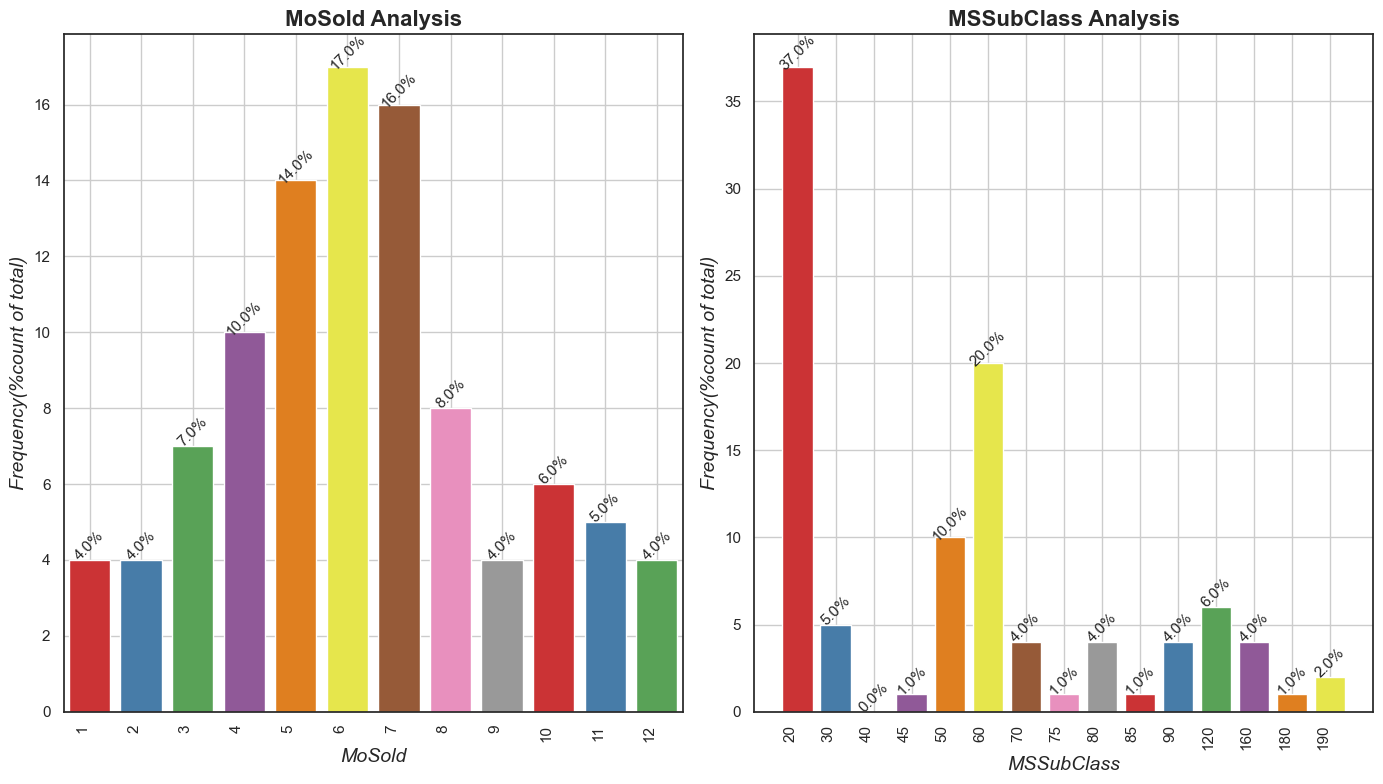

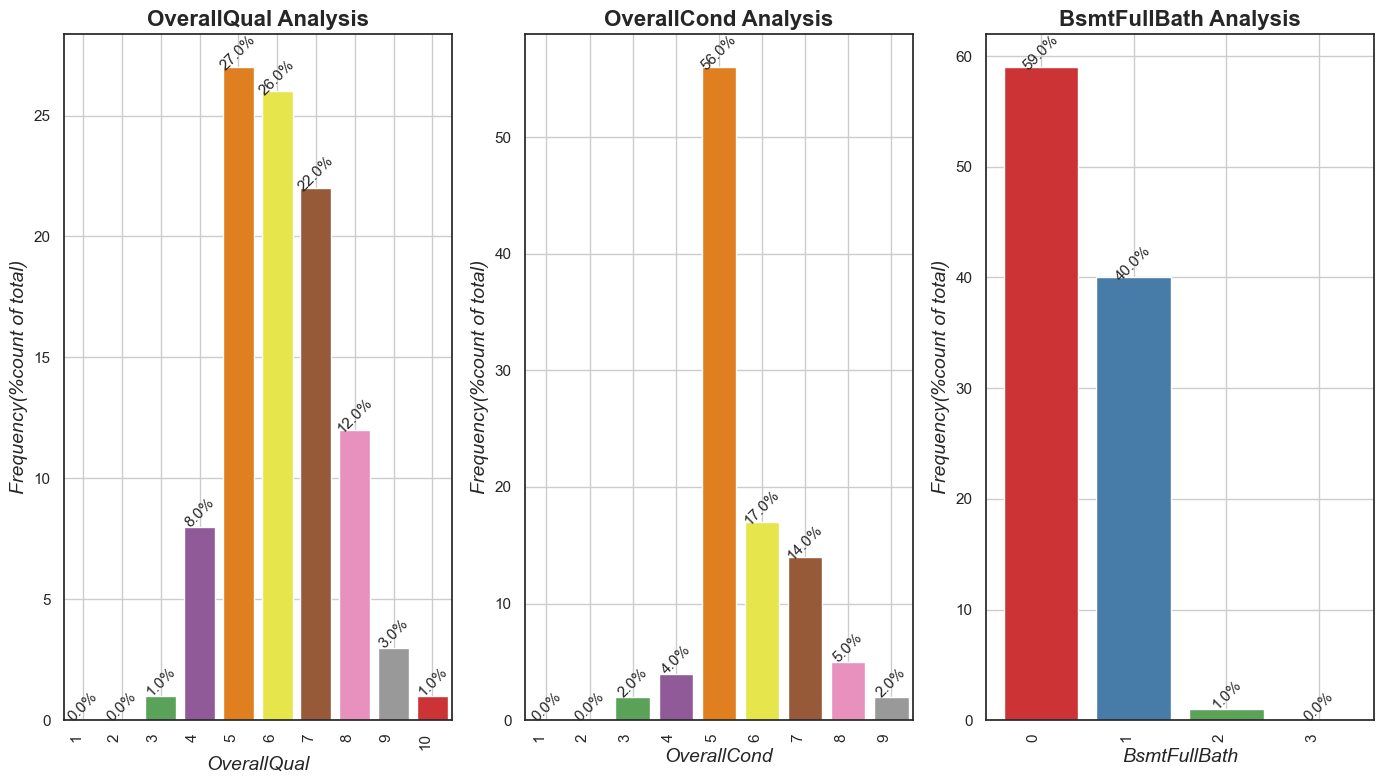

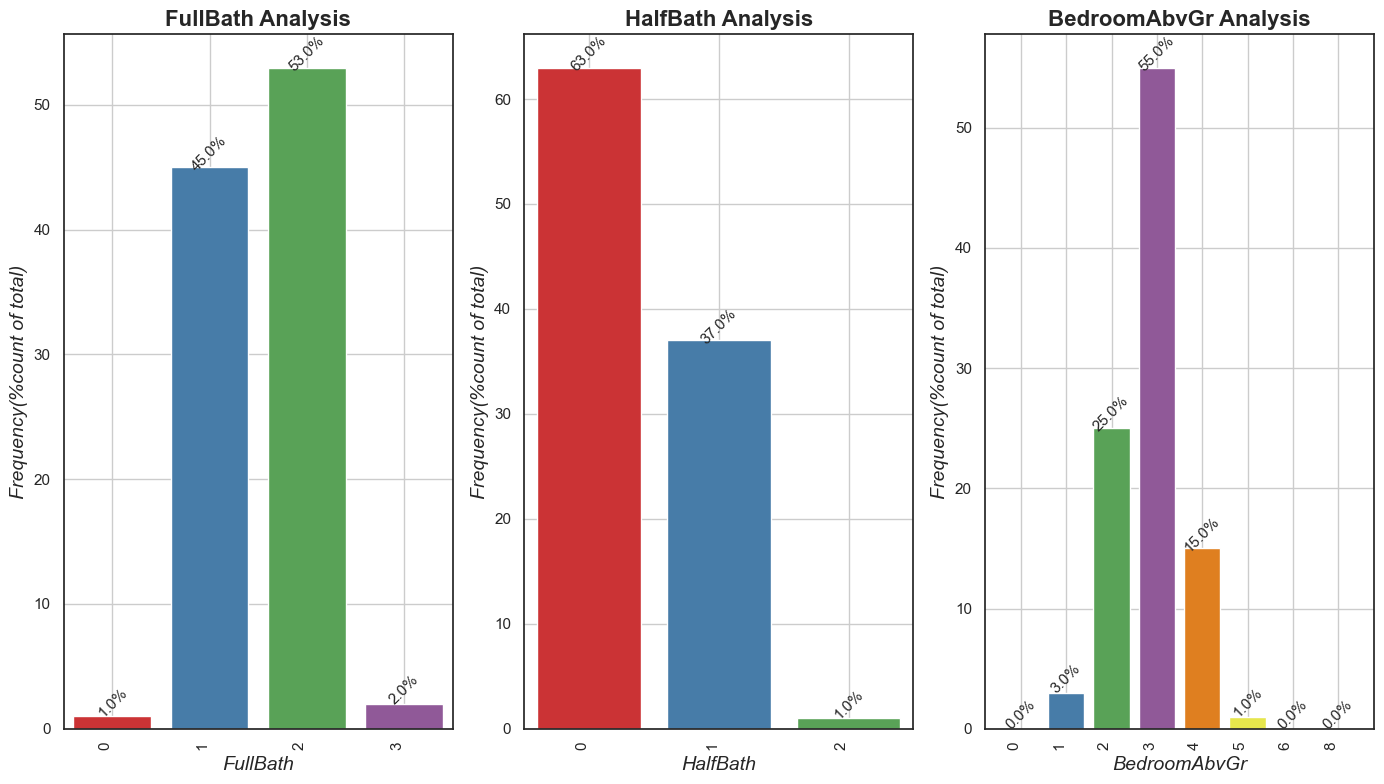

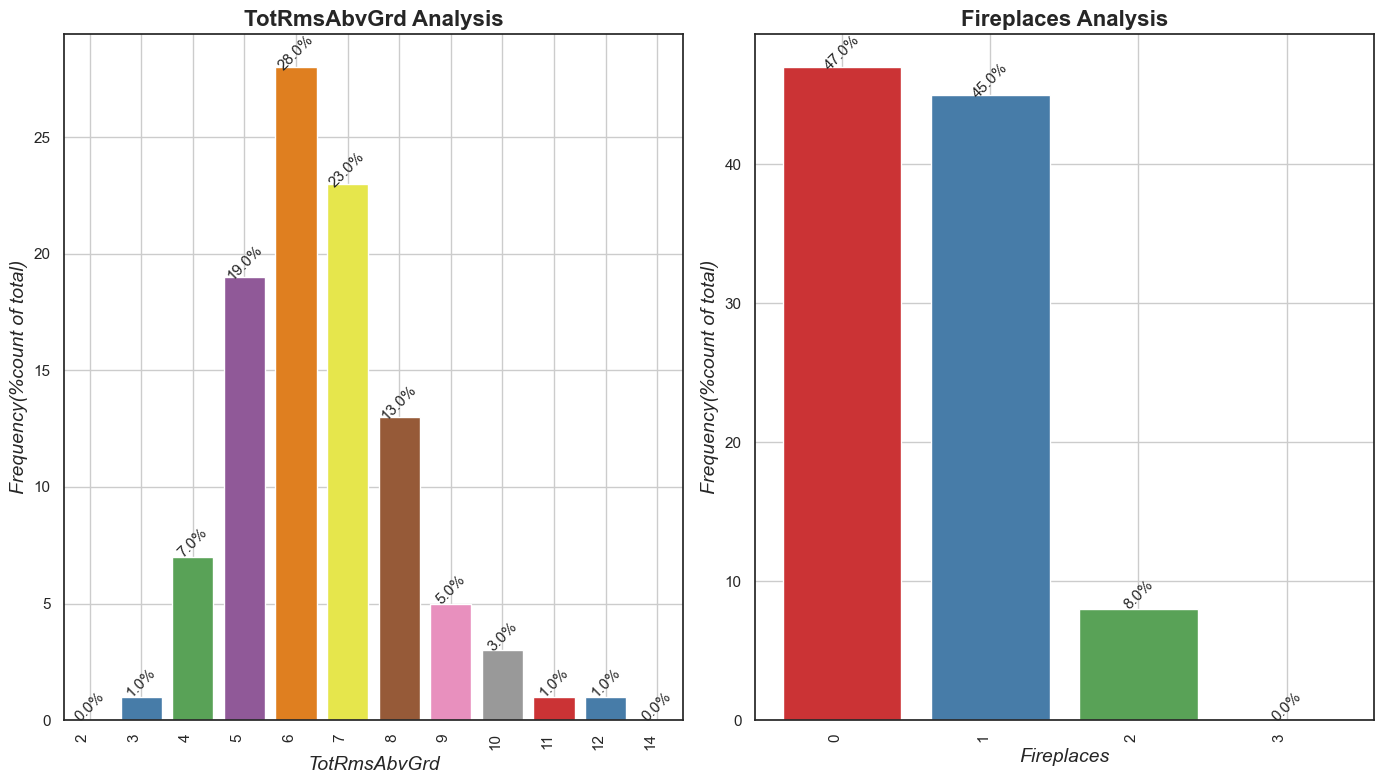

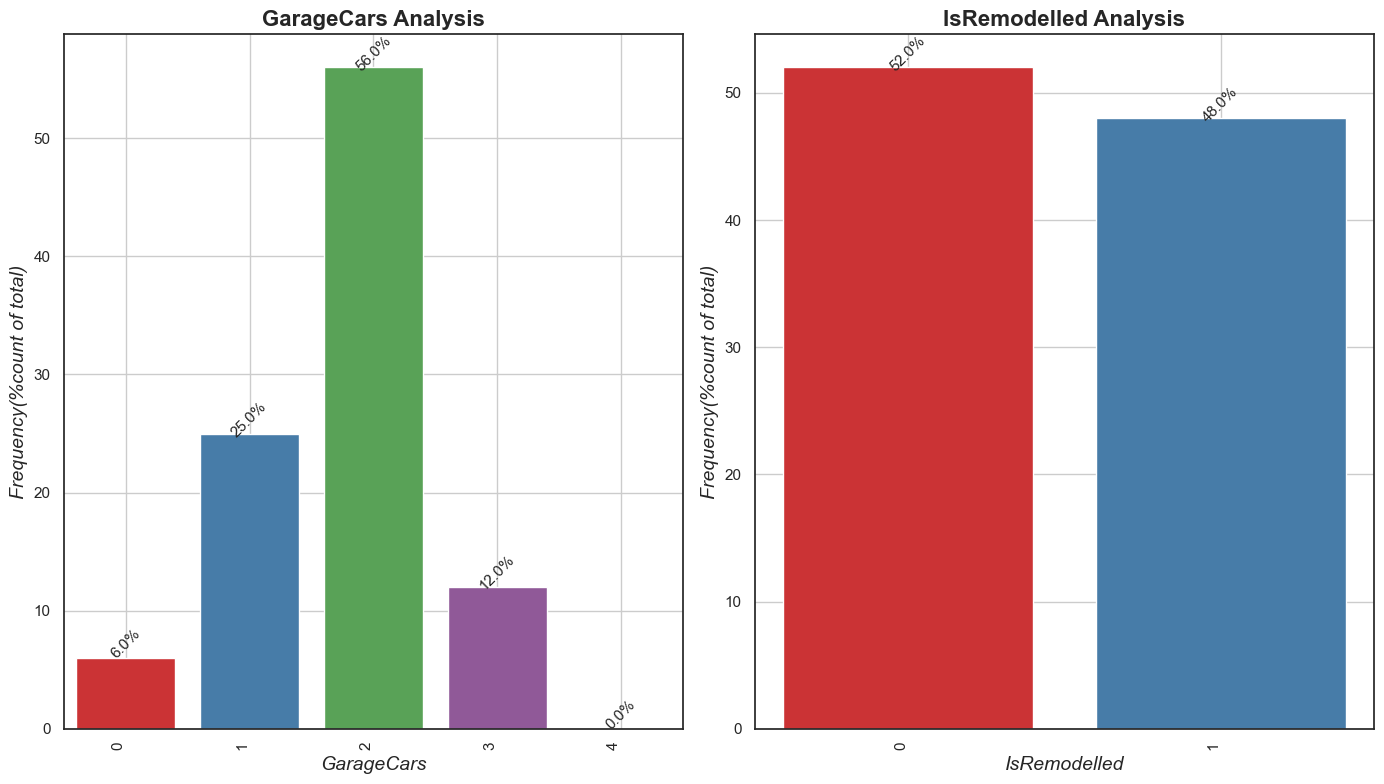

In [198]:
categorical_freq_prcnt_plt(data, 'MoSold', 'MSSubClass',0)
categorical_freq_prcnt_plt(data, 'OverallQual','OverallCond','BsmtFullBath')
categorical_freq_prcnt_plt(data, 'FullBath','HalfBath','BedroomAbvGr')
categorical_freq_prcnt_plt(data, 'TotRmsAbvGrd','Fireplaces',0)
categorical_freq_prcnt_plt(data, 'GarageCars','IsRemodelled',0)

# Takeaways

- Month (House) Sold: June, followed by July and May
- MSSubClass: Most preferred type of dwelling involved is 20 i.e. 1-Story 1946 & Newer All Styles, followed by 60 i.e. 2-Story 1946 & Newer.
- Overall Quality (material and finish): Average and Above Average
- Overall Condition: Mostly Average, followed by Above Average
- (i) Basement Full Bathrooms: Maximum 0(None), followed by 1.
-  (ii) Full Bathrooms: Preferred 2, followed by 1 and (iii) Half Bathrooms: Preferred 0(None), followed by 1.
- Bedrooms Above Ground:3, followed by 2.
- Total Rooms Above Ground: 6, followed by 7.
- No significant preferences for Fireplaces (0 0r 1) and WhetherRemodelled (House) or not.
- GarageCars space: 2 car spaces, followed by 1 car space.

In [199]:
##Removing 'Id' column as it doesn't seem to be important for analysis
data = data.drop(['Id'], axis=1)

In [200]:
##Checking for outliers
data.describe(percentiles=[0.1,0.25,0.5,0.75,0.95,0.98,0.99,1])

MSSubClass  LotFrontage        LotArea  OverallQual  OverallCond  \
count  1460.000000  1460.000000    1460.000000  1460.000000  1460.000000   
mean     56.897260    69.863699   10516.828082     6.099315     5.575342   
std      42.300571    22.027677    9981.264932     1.382997     1.112799   
min      20.000000    21.000000    1300.000000     1.000000     1.000000   
10%      20.000000    49.000000    5000.000000     5.000000     5.000000   
25%      20.000000    60.000000    7553.500000     5.000000     5.000000   
50%      50.000000    69.000000    9478.500000     6.000000     5.000000   
75%      70.000000    79.000000   11601.500000     7.000000     6.000000   
95%     160.000000   104.000000   17401.150000     8.000000     8.000000   
98%     188.200000   120.820000   25251.620000     9.000000     8.000000   
99%     190.000000   137.410000   37567.640000    10.000000     9.000000   
100%    190.000000   313.000000  215245.000000    10.000000     9.000000   
max     190.000000   313.000000  215245.000000    10.000000     9.000000   

        MasVnrArea   BsmtFinSF1    BsmtUnfSF  TotalBsmtSF     1stFlrSF  ...  \
count  1460.000000  1460.000000  1460.000000  1460.000000  1460.000000  ...   
mean    104.229452   443.639726   567.240411  1057.429452  1162.626712  ...   
std     180.717988   456.098091   441.866955   438.705324   386.587738  ...   
min       0.000000     0.000000     0.000000     0.000000   334.000000  ...   
10%       0.000000     0.000000    74.900000   636.900000   756.900000  ...   
25%       0.000000     0.000000   223.000000   795.750000   882.000000  ...   
50%       0.000000   383.500000   477.500000   991.500000  1087.000000  ...   
75%     168.000000   712.250000   808.000000  1298.250000  1391.250000  ...   
95%     456.000000  1274.000000  1468.000000  1753.000000  1831.250000  ...   
98%     650.820000  1442.640000  1678.200000  2001.640000  2072.280000  ...   
99%     791.280000  1572.410000  1797.050000  2155.050000  2219.460000  ...   
100%   1600.000000  5644.000000  2336.000000  6110.000000  4692.000000  ...   
max    1600.000000  5644.000000  2336.000000  6110.000000  4692.000000  ...   

       TotRmsAbvGrd   Fireplaces   GarageCars   GarageArea   WoodDeckSF  \
count   1460.000000  1460.000000  1460.000000  1460.000000  1460.000000   
mean       6.517808     0.613014     1.767123   472.980137    94.244521   
std        1.625393     0.644666     0.747315   213.804841   125.338794   
min        2.000000     0.000000     0.000000     0.000000     0.000000   
10%        5.000000     0.000000     1.000000   240.000000     0.000000   
25%        5.000000     0.000000     1.000000   334.500000     0.000000   
50%        6.000000     1.000000     2.000000   480.000000     0.000000   
75%        7.000000     1.000000     2.000000   576.000000   168.000000   
95%       10.000000     2.000000     3.000000   850.100000   335.000000   
98%       10.820000     2.000000     3.000000   907.460000   430.100000   
99%       11.000000     2.000000     3.000000  1002.790000   505.460000   
100%      14.000000     3.000000     4.000000  1418.000000   857.000000   
max       14.000000     3.000000     4.000000  1418.000000   857.000000   

       OpenPorchSF       MoSold      SalePrice  IsRemodelled  PropertyAge  
count  1460.000000  1460.000000    1460.000000   1460.000000  1460.000000  
mean     46.660274     6.321918  180921.195890      0.476712    36.547945  
std      66.256028     2.703626   79442.502883      0.499629    30.250152  
min       0.000000     1.000000   34900.000000      0.000000     0.000000  
10%       0.000000     3.000000  106475.000000      0.000000     1.000000  
25%       0.000000     5.000000  129975.000000      0.000000     8.000000  
50%      25.000000     6.000000  163000.000000      0.000000    35.000000  
75%      68.000000     8.000000  214000.000000      1.000000    54.000000  
95%     175.050000    11.000000  326100.000000      1.000000    91.000000  
98%     240.820000    12.

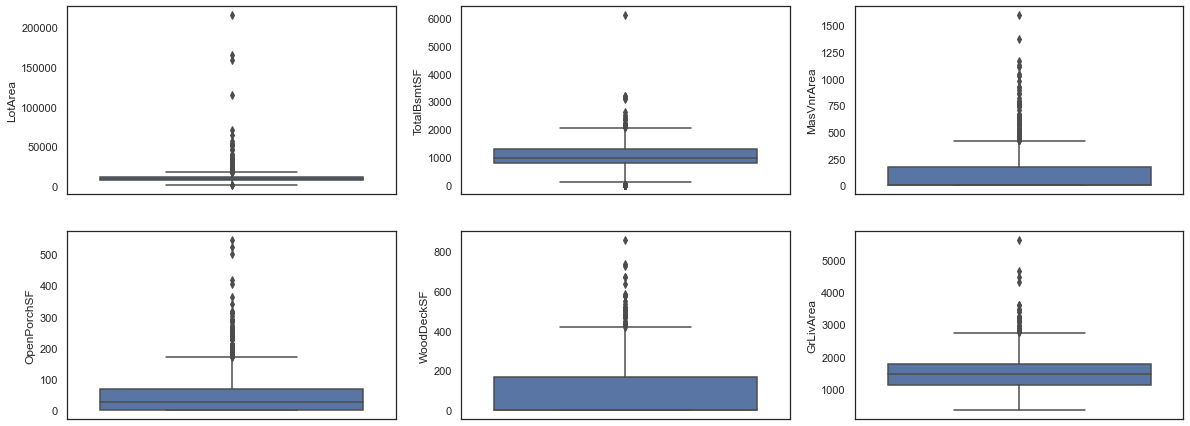

In [201]:
# Checking the outliers in all the numeric columns using the boxplot

plt.figure(figsize=(20, 20))
plt.subplot(5,3,1)
sns.boxplot(y = 'LotArea', color='b', data = data)
plt.subplot(5,3,2)
sns.boxplot(y = 'TotalBsmtSF', color='b', data = data)
plt.subplot(5,3,3)
sns.boxplot(y = 'MasVnrArea', color='b', data = data)
plt.subplot(5,3,4)
sns.boxplot(y = 'OpenPorchSF', color='b', data = data)
plt.subplot(5,3,5)
sns.boxplot(y = 'WoodDeckSF', color='b', data = data)
plt.subplot(5,3,6)
sns.boxplot(y = 'GrLivArea', color='b', data = data)


plt.show()

In [202]:
data.shape

(1460, 45)

In [203]:
##Removing the Outliers
# Removing values beyond 95% for LotArea

q_LotArea = data['LotArea'].quantile(0.95)
data = data[data["LotArea"] < q_LotArea]


# Removing values beyond 98% for TotalBsmtSF
q_TotalBsmtSF = data['TotalBsmtSF'].quantile(0.98)
data = data[data["TotalBsmtSF"] < q_TotalBsmtSF]

# Removing values beyond 99% for WoodDeckSF

q_WoodDeckSF = data['WoodDeckSF'].quantile(0.99)
data = data[data["WoodDeckSF"] < q_WoodDeckSF]

# Removing values beyond 99% for OpenPorchSF

q_OpenPorchSF = data['OpenPorchSF'].quantile(0.99)
data = data[data["OpenPorchSF"] < q_OpenPorchSF]

In [204]:
# Determine the percentage of data retained

retained_data = round(100*(len(data)/total_records),2)
print(retained_data,"%")

91.16 %


# Step 3: Data Visualization

C:\Users\kouls\anaconda\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


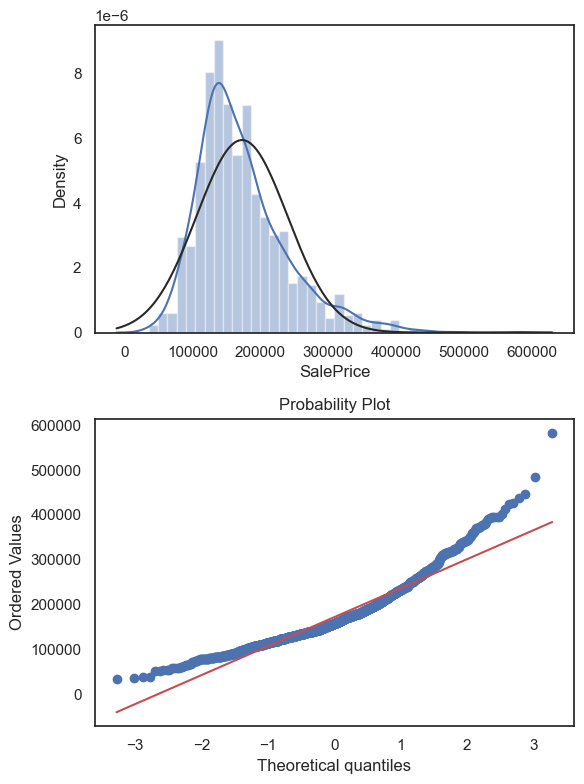

In [205]:
##Visualising the target variable 'SalePrice'
from scipy import stats
from scipy.stats import norm

plt.figure(figsize=(6,8), dpi=100)
plt.subplot(211)
sns.distplot(data['SalePrice'], fit=norm)


#Get also the QQ-plot
plt.subplot(212)
res = stats.probplot(data['SalePrice'], plot=plt)

plt.autoscale()
plt.tight_layout()
plt.show()

Observation: The points on the probplot don't lie along the red line. It shows that there is a skewness in the data of the target variable. Hence, transforming the variable using log-transform.

C:\Users\kouls\anaconda\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)



 mu = 11.99 and sigma = 0.37



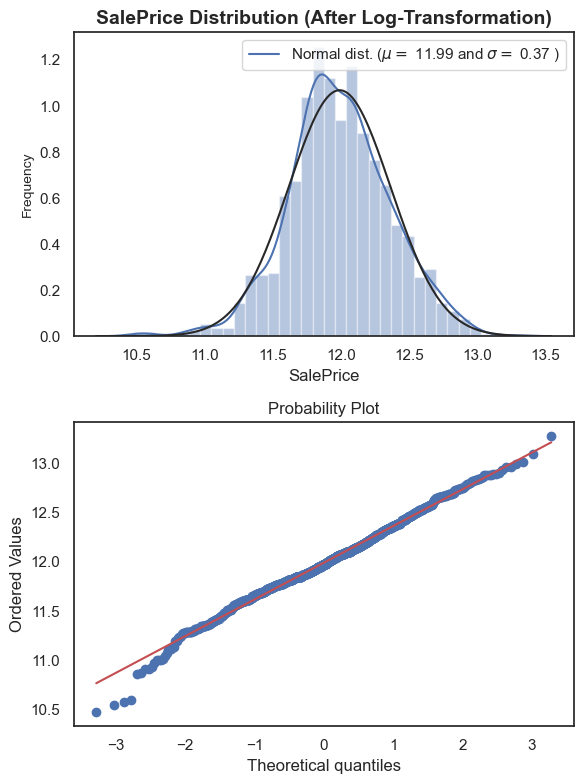

In [206]:
##Tranforming the target variable 'SalePrice' using Log-Transform. 

from scipy import stats
from scipy.stats import norm

##Using the numpy fuction log1p which that applies log(1+x) to all elements of the target variable column
data["SalePrice"] = np.log1p(data["SalePrice"])

plt.figure(figsize=(6,8), dpi=100)
plt.subplot(211)
sns.distplot(data['SalePrice'], fit=norm)

# Get the fitted parameters used by the function
(mu, sigma) = norm.fit(data['SalePrice'])
print( '\n mu = {:.2f} and sigma = {:.2f}\n'.format(mu, sigma))

#Plotting the distribution
plt.legend(['Normal dist. ($\mu=$ {:.2f} and $\sigma=$ {:.2f} )'.format(mu, sigma)],
            loc='best')
plt.ylabel('Frequency', fontsize=10)
plt.title("SalePrice Distribution (After Log-Transformation)", fontsize=14, fontweight='bold')

#Get also the QQ-plot
plt.subplot(212)
res = stats.probplot(data['SalePrice'], plot=plt)

plt.autoscale()
plt.tight_layout()
plt.show()

Take Aways:
- The normal distribution plot now shows that the new distribution of SalePrice (log-transformed) is almost normally distributed.
- The points on the probplot almost lie along the red line. It shows that the skewness issue in the data of the target variable, 'SalePrice' is almost resolved with some noise.

In [207]:
##Let's define a function to draw scatterplots to understand relationship between 'dependent' and 'numeric' variables.
#(For three scatterplots together)
def scatter_plt_3(a, b, c):
    plt.figure(figsize=(15,5), dpi=150)
    sns.set_style("white")
    #subplot (131)
    plt.subplot(1,3,1)
    plt.scatter(x= data[a], y= data['SalePrice'])
    plt.title(("Sale price vs "+a), fontweight='bold', fontsize=15)
    plt.xlabel(a, fontsize=13, fontstyle='italic')
    plt.ylabel('SalePrice', fontsize=13, fontstyle='italic')
    plt.grid(True)
    #subplot (132)
    plt.subplot(1,3,2)
    plt.scatter(x= data[b], y= data['SalePrice'])
    plt.title(("Sale price vs "+b), fontweight='bold', fontsize=15)
    plt.xlabel(b, fontsize=13, fontstyle='italic')
    plt.ylabel('SalePrice', fontsize=13, fontstyle='italic')
    plt.grid(True)
    #subplot (133)
    plt.subplot(1,3,3)
    plt.scatter(x= data[c], y= data['SalePrice'])
    plt.title(("Sale price vs "+c), fontweight='bold', fontsize=15)
    plt.xlabel(c, fontsize=13, fontstyle='italic')
    plt.ylabel('SalePrice', fontsize=13, fontstyle='italic')
    plt.grid(True)
    
    plt.autoscale()
    plt.tight_layout()
    plt.show()

In [208]:
##(For two scatterplots together)
def scatter_plt_2(a,b):
    sns.set_style("white")
    plt.figure(figsize=(10,5), dpi=150)
    #subplot(121)
    plt.subplot(121)
    plt.scatter(x= data[a], y= data['SalePrice'])
    plt.title(("Sale Price vs "+a), fontweight='bold', fontsize=15)
    plt.xlabel(a, fontsize=13, fontstyle='italic')
    plt.ylabel('SalePrice', fontsize=13, fontstyle='italic')
    plt.grid(True)
    #subplot(122)
    plt.subplot(122)
    plt.scatter(x= data[b], y= data['SalePrice'])
    plt.title(("Sale price vs "+b), fontweight='bold', fontsize=15)
    plt.xlabel(b, fontsize=13, fontstyle='italic')
    plt.ylabel('SalePrice', fontsize=13, fontstyle='italic')
    plt.grid(True)
    
    plt.autoscale()
    plt.tight_layout()
    plt.show()

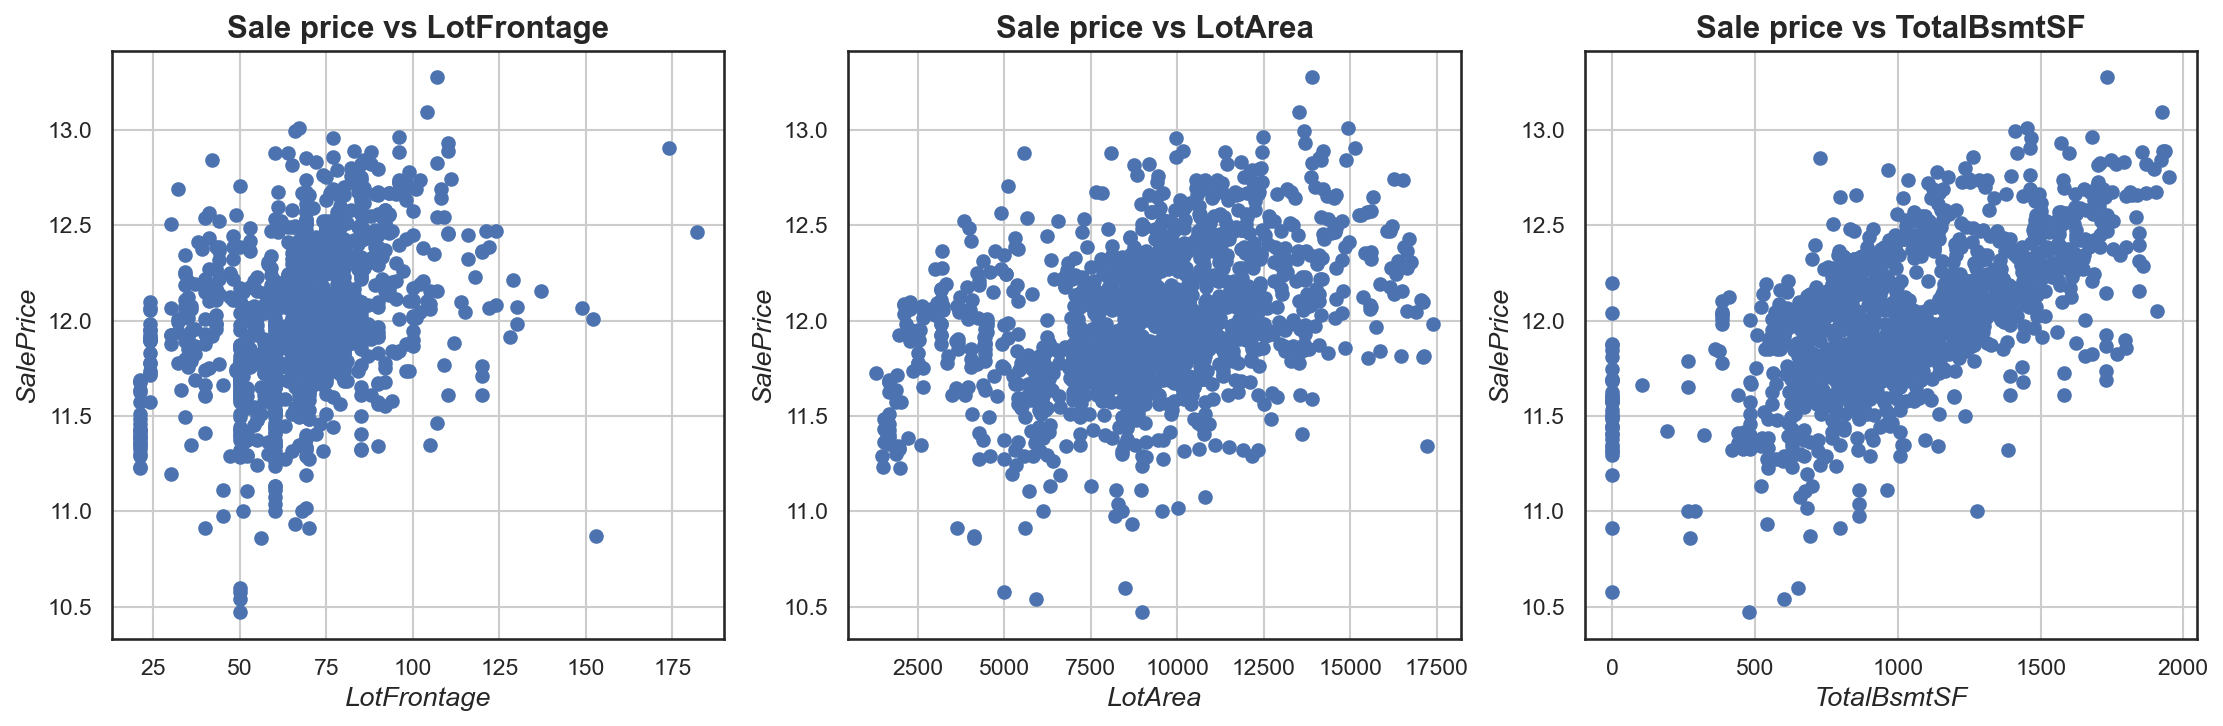

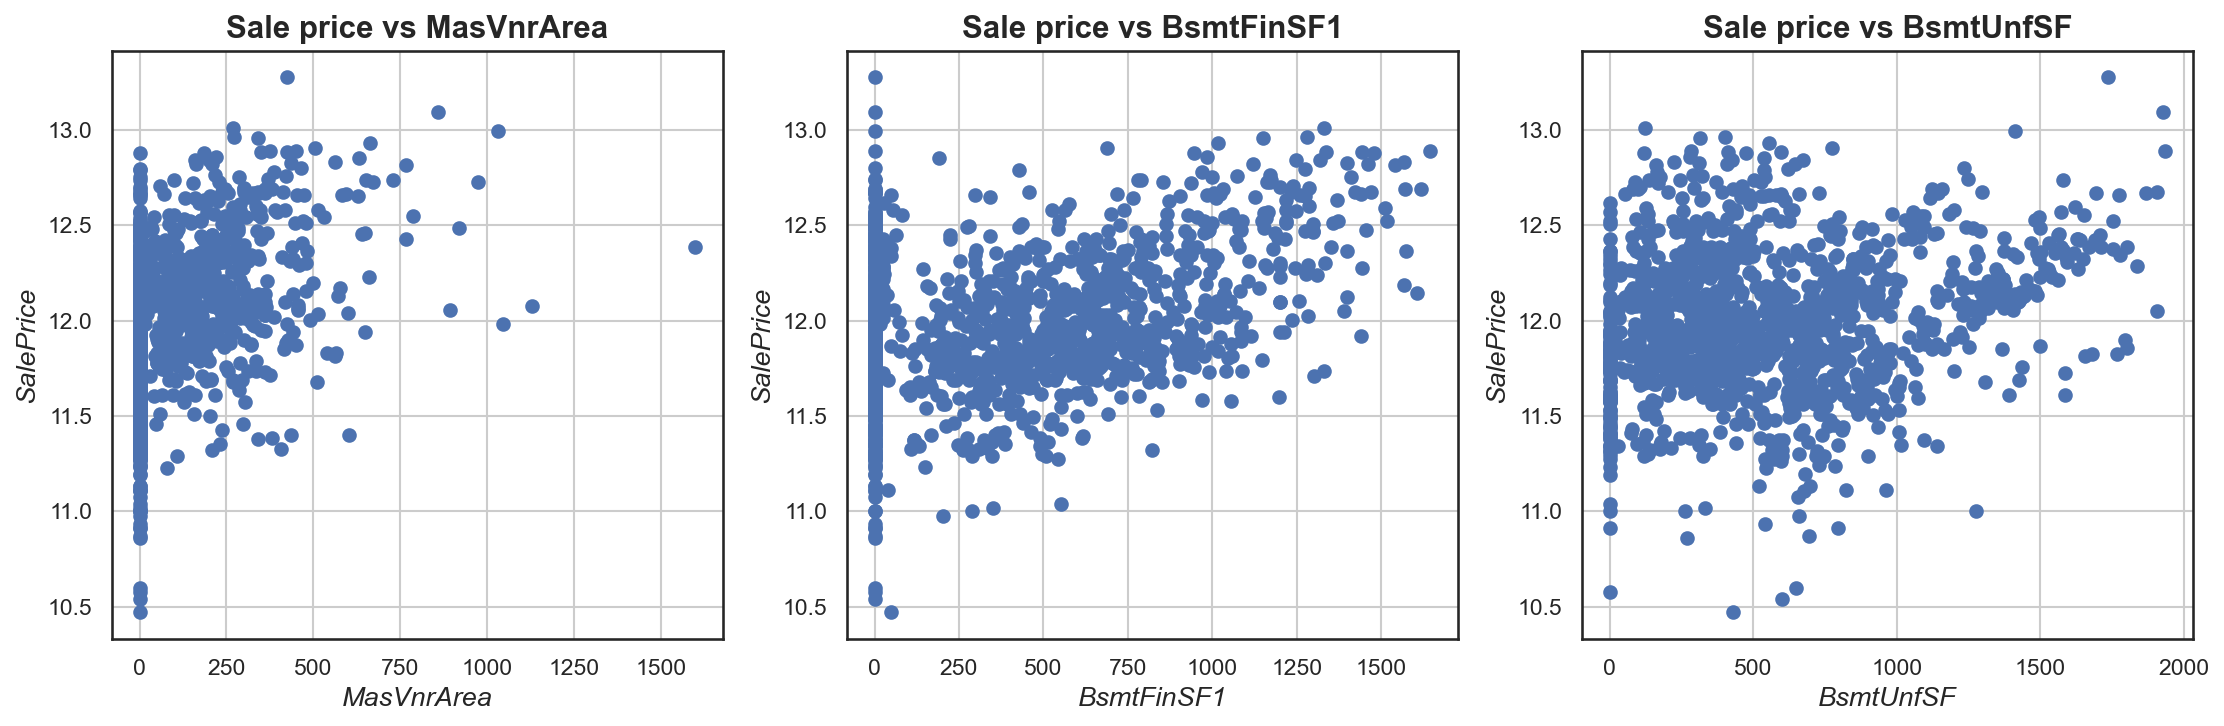

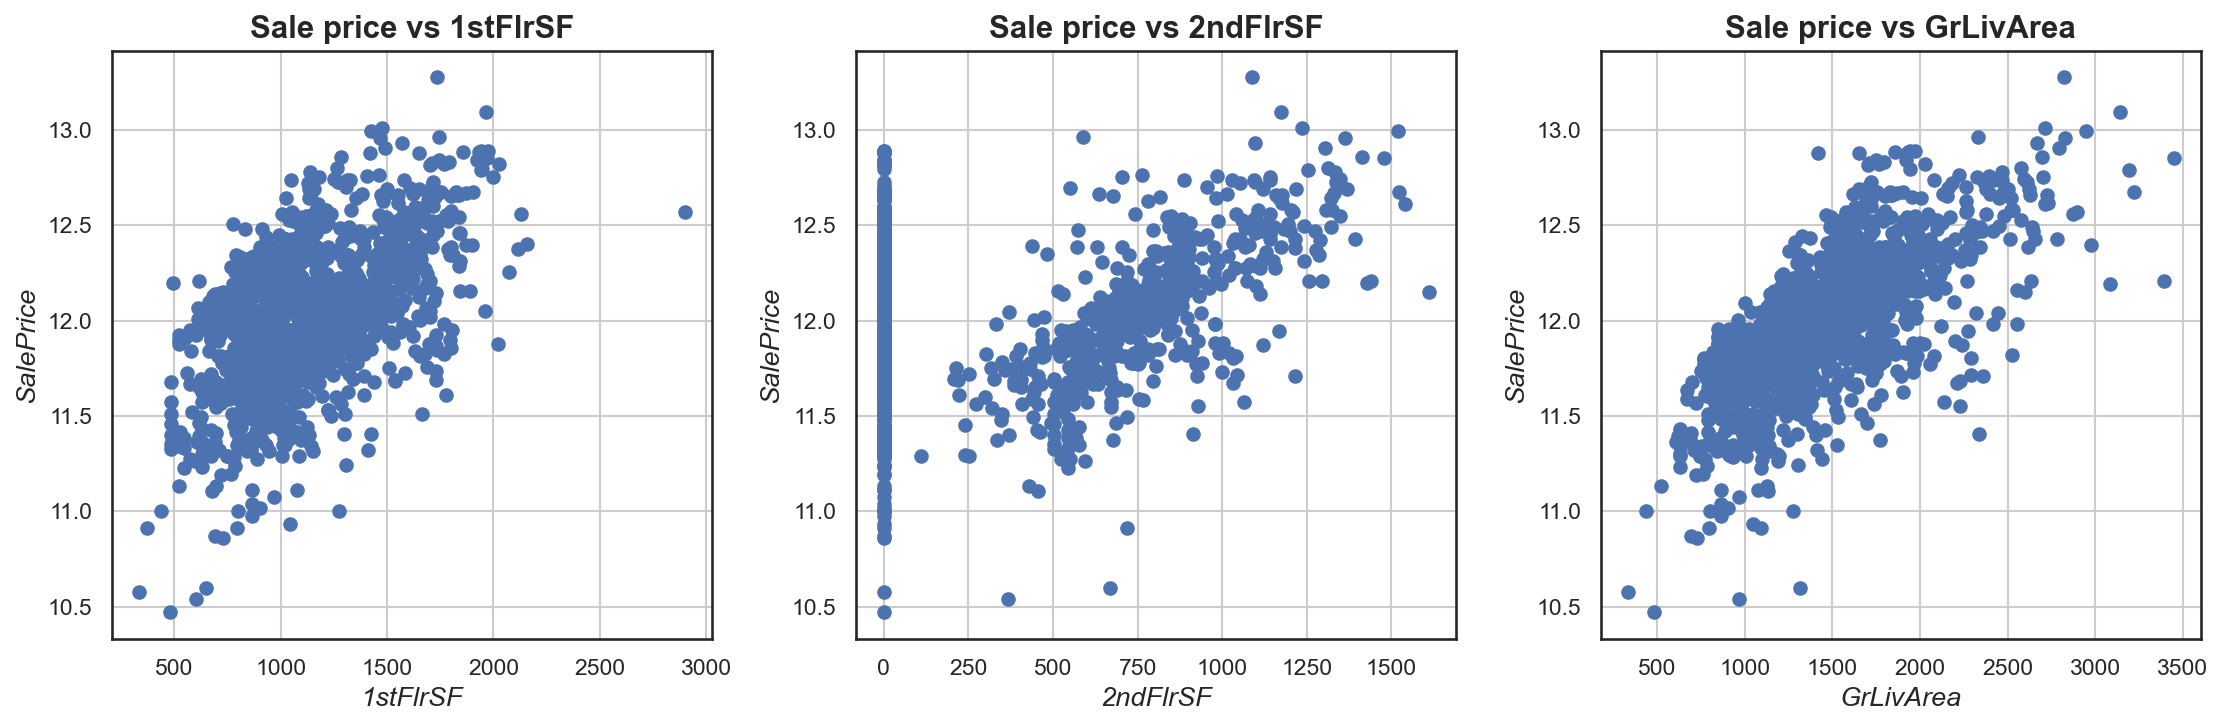

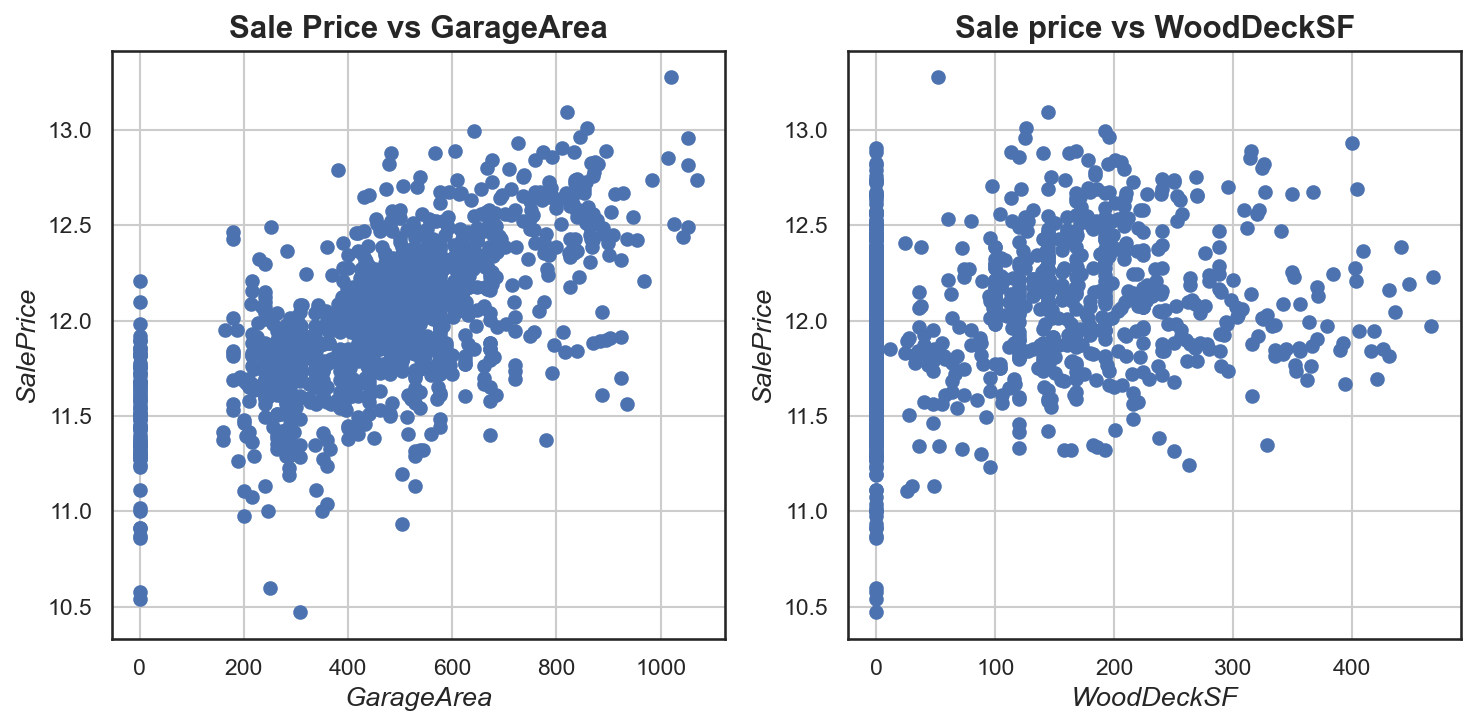

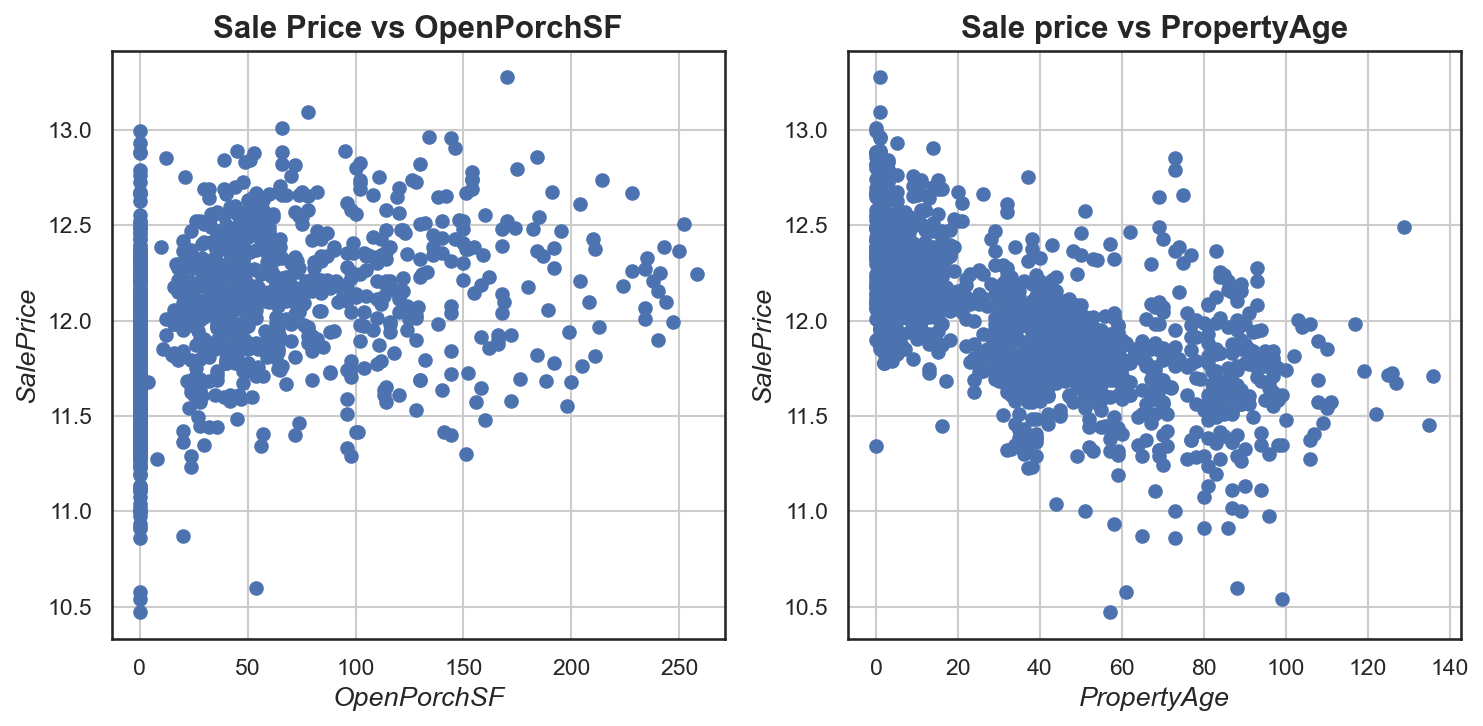

In [209]:
scatter_plt_3('LotFrontage', 'LotArea','TotalBsmtSF')
scatter_plt_3('MasVnrArea','BsmtFinSF1', 'BsmtUnfSF')
scatter_plt_3('1stFlrSF','2ndFlrSF', 'GrLivArea')
scatter_plt_2( 'GarageArea', 'WoodDeckSF')
scatter_plt_2('OpenPorchSF', 'PropertyAge')

## Take Aways
- '1stFlrSF','GrLivArea' show a positive correlation with the SalePrice.
- Other continuous variables are too scattered. Let's understand them from further analysis.
- SalePrice vs ('LotFrontage', 'MasVnrArea', '1stFlrSF', and 'GarageArea' scatterplots do have some datapoints with some eccentric values/outliers. Let's eliminate them first.

In [210]:
##Based on the 'LotFrontage', 'MasVnrArea', '1stFlrSF', and 'GarageArea' scatterplots w.r.t. SalePrice, eliminating outlier datapoints 

data = data.loc[~((data['SalePrice']<11.0) & (data['LotFrontage']>150))]
data = data.loc[~((data['SalePrice']>12.0) & (data['MasVnrArea']>1500))]
data = data.loc[~((data['SalePrice']>12.0) & (data['1stFlrSF']>2500))]
data = data.loc[~((data['SalePrice']<12.5) & (data['GarageArea']>1200))]

In [211]:
## Determine the percentage of data retained in the dataset

new_retained_data = round(100*(len(data)/total_records),2)
print(new_retained_data,"%")

90.96 %


C:\Users\kouls\AppData\Local\Temp\ipykernel_23040\830150360.py:5: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  my_mask_1 = np.triu(np.ones_like(corr_matrix_new, dtype=np.bool))


<Figure size 1440x1200 with 0 Axes>

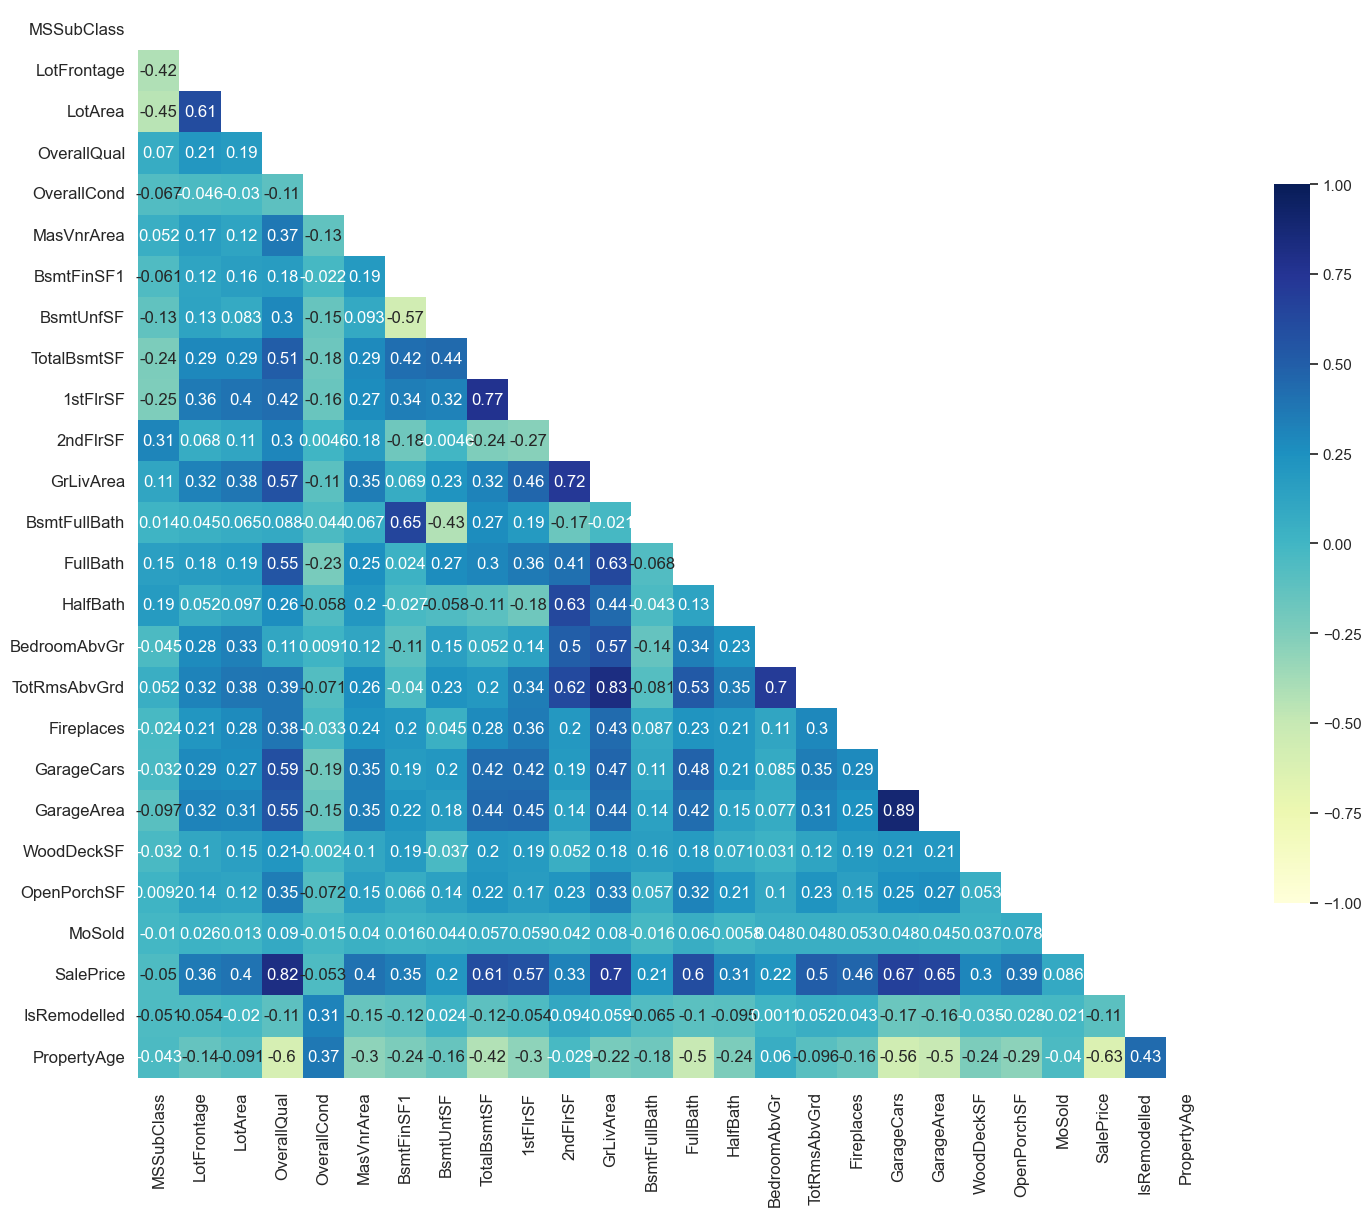

In [212]:
#Plotting a heatmap to understand correlation amongst numeric variables
numeric_vars= data.select_dtypes(include=['int32','float32','int64','float64']).columns
plt.figure(figsize = (12,10), dpi=120)
corr_matrix_new = data[numeric_vars].corr()
my_mask_1 = np.triu(np.ones_like(corr_matrix_new, dtype=np.bool))
f, ax_corr1 = plt.subplots(figsize=(15, 15), dpi=100)
ax_corr1 = sns.heatmap(corr_matrix_new, cmap= 'YlGnBu', cbar_kws={"shrink": .5}, vmin= -1, vmax=1, center=0,
            square=True, mask=my_mask_1, annot=True)
plt.xticks(fontsize=12, rotation=90)
plt.yticks(fontsize=12, rotation=0)
plt.tight_layout()
plt.autoscale()
plt.show()

Observations:
(1)The predictors 'GrLivArea' and 'TotRmsAbvGrd' shows (0.83) strong positive correlation. Hence, dropping 'TotRmsAbvGrd'.
(2)The predictors 'GarageCars' and 'GarageArea' shows (0.89) strong positive correlation. Hence, dropping 'GarageCars'.
(1)The predictors 'GrLivArea' and '2ndFlrSF' shows (0.72) strong positive correlation. Hence, dropping '2ndFlrSF'.
(2)The predictors '1stFlrSF' and 'TotalBsmtSF' shows (0.77) strong positive correlation. Hence, dropping '1stFlrSF'.

In [217]:
##Removing the highly correlated predictors to reduce multicollinearity.

data= data.drop(['TotRmsAbvGrd', 'GarageCars', '2ndFlrSF', '1stFlrSF'], axis = 1)
data.head()

MSSubClass MSZoning  LotFrontage  LotArea LotShape LotConfig Neighborhood  \
0          60       RL         65.0     8450      Reg    Inside      CollgCr   
1          20       RL         80.0     9600      Reg       FR2      Veenker   
2          60       RL         68.0    11250      IR1    Inside      CollgCr   
3          70       RL         60.0     9550      IR1    Corner      Crawfor   
4          60       RL         84.0    14260      IR1       FR2      NoRidge   

  HouseStyle  OverallQual  OverallCond  ... FireplaceQu GarageType  \
0     2Story            7            5  ...        None     Attchd   
1     1Story            6            8  ...          TA     Attchd   
2     2Story            7            5  ...          TA     Attchd   
3     2Story            7            5  ...          Gd     Detchd   
4     2Story            8            5  ...          TA     Attchd   

  GarageFinish GarageArea  WoodDeckSF OpenPorchSF MoSold  SalePrice  \
0          RFn        548           0          61      2  12.247699   
1          RFn        460         298           0      5  12.109016   
2          RFn        608           0          42      9  12.317171   
3          Unf        642           0          35      2  11.849405   
4          RFn        836         192          84     12  12.429220   

  IsRemodelled PropertyAge  
0            0           5  
1            0          31  
2            1           7  
3            1          91  
4            0           8  

[5 rows x 41 columns]

C:\Users\kouls\AppData\Local\Temp\ipykernel_23040\4121872376.py:5: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  my_mask_2 = np.triu(np.ones_like(corr_matrix_new1, dtype=np.bool))


<Figure size 1440x1200 with 0 Axes>

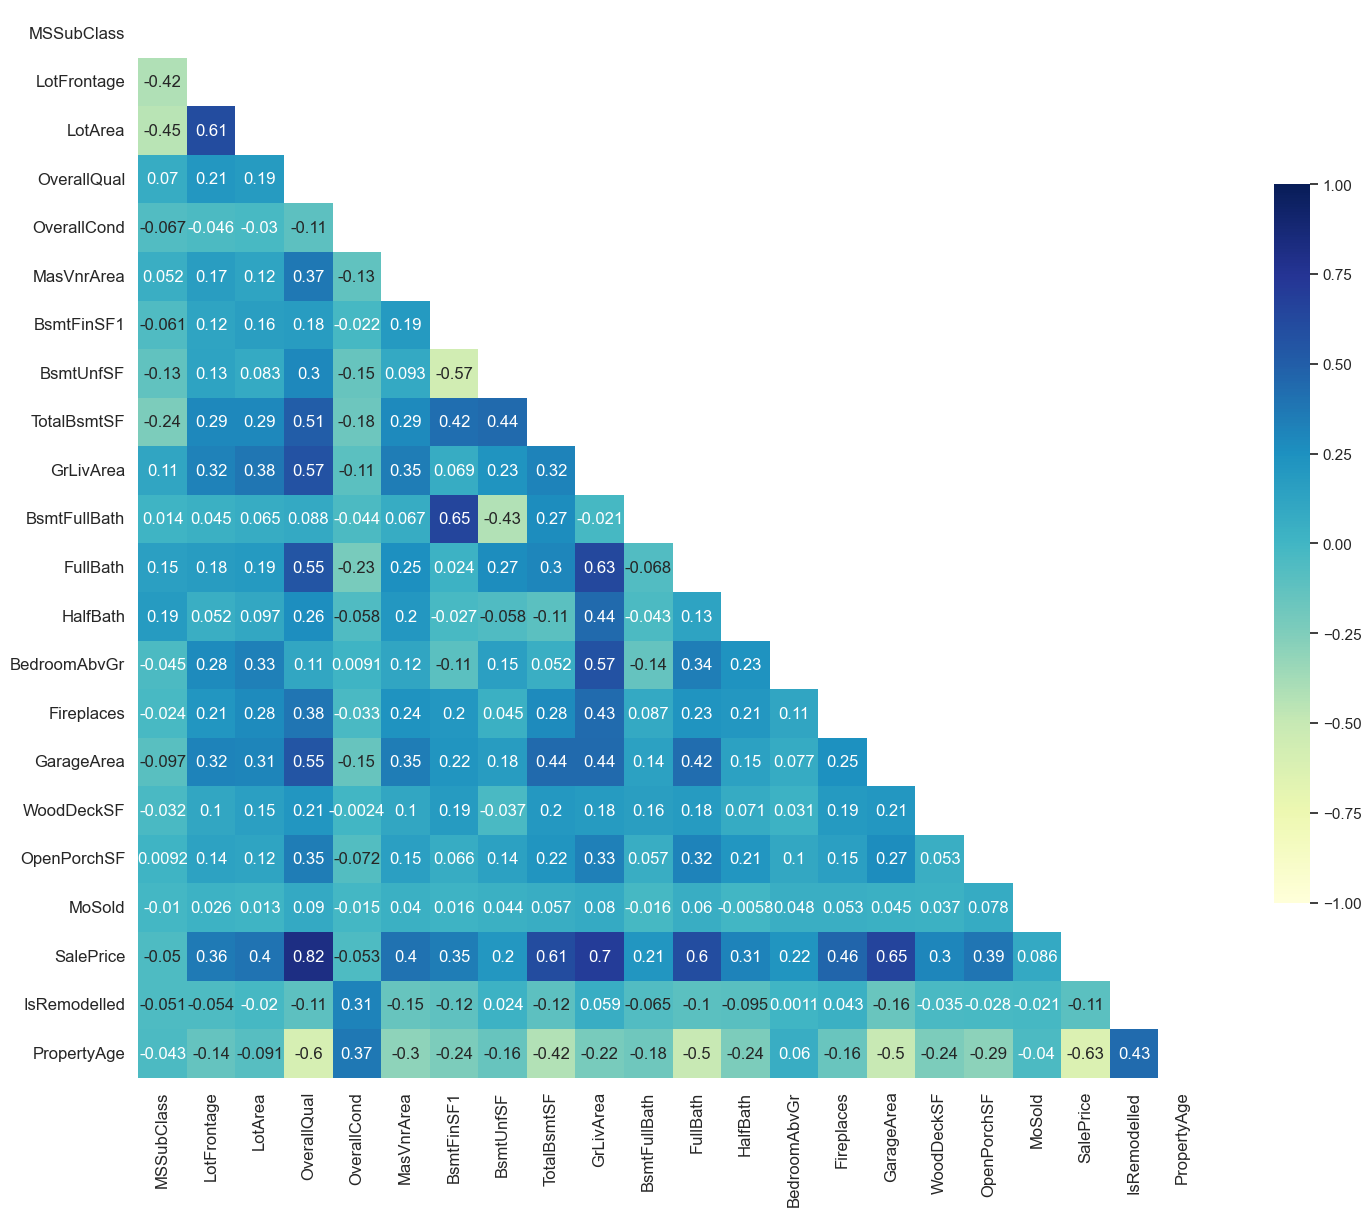

In [218]:
#Rechecking the heatmap to understand correlation amongst all numeric variables 
numeric_vars1= data.select_dtypes(include=['int32','float32','int64','float64']).columns
plt.figure(figsize = (12,10), dpi=120)
corr_matrix_new1 = data[numeric_vars1].corr()
my_mask_2 = np.triu(np.ones_like(corr_matrix_new1, dtype=np.bool))
f, ax_corr2 = plt.subplots(figsize=(15, 15), dpi=100)
ax_corr2 = sns.heatmap(corr_matrix_new1, cmap= 'YlGnBu', cbar_kws={"shrink": .5}, vmin= -1, vmax=1, center=0,
            square=True, mask=my_mask_2, annot=True)
plt.xticks(fontsize=12, rotation=90)
plt.yticks(fontsize=12)
plt.tight_layout()
plt.autoscale()
plt.show()

In [215]:
#CHecking the shape again
data.shape

(1328, 45)

# Step 4: Data Preparation

In [219]:
# For values which can be ordered, we have given an ordered sequence value
# For values which cannot be ordered, we have categorised them into 0 and 1

##For ordinals, let's assign them their respective weights.
data['d_LotShape'] = data['LotShape'].map({'Reg': 3, 'IR1': 2, 'IR2': 1, 'IR3': 0}) #3 indicates better i.e. Regular LotShape
data['d_ExterQual'] = data['ExterQual'].map({'Ex': 5, 'Gd': 4, 'TA': 3, 'Fa': 2, 'Po': 1, 'None': 0 })
data['d_BsmtQual'] = data['BsmtQual'].map({'Ex': 5, 'Gd': 4, 'TA': 3, 'Fa': 2, 'Po': 1, 'None': 0})

data['d_BsmtExposure'] = data['BsmtExposure'].map({'Gd': 4, 'Av': 3, 'Mn': 2, 'No': 1, 'None': 0})
data['d_BsmtFinType1'] = data['BsmtFinType1'].map({'GLQ': 6, 'ALQ': 5, 'BLQ': 4, 'Rec': 3, 'LwQ': 2, 'Unf': 1, 'None': 0})
data['d_HeatingQC'] = data['HeatingQC'].map({'Ex': 5, 'Gd': 4, 'TA': 3, 'Fa': 2, 'Po': 1, 'None': 0})

data['d_KitchenQual'] = data['KitchenQual'].map({'Ex': 5, 'Gd': 4, 'TA': 3, 'Fa': 2, 'Po': 1, 'None': 0})
data['d_FireplaceQu'] = data['FireplaceQu'].map({'Ex': 5, 'Gd': 4, 'TA': 3, 'Fa': 2, 'Po': 1, 'None': 0})
data['d_GarageFinish'] = data['GarageFinish'].map({'Fin': 3, 'RFn': 2, 'Unf': 1, 'None': 0 })

data = data.drop(['LotShape', 'ExterQual', 'BsmtQual', 'BsmtExposure', 'BsmtFinType1', 'HeatingQC', \
                                'KitchenQual', 'FireplaceQu', 'GarageFinish' ], axis=1)

data.head()

MSSubClass MSZoning  LotFrontage  LotArea LotConfig Neighborhood  \
0          60       RL         65.0     8450    Inside      CollgCr   
1          20       RL         80.0     9600       FR2      Veenker   
2          60       RL         68.0    11250    Inside      CollgCr   
3          70       RL         60.0     9550    Corner      Crawfor   
4          60       RL         84.0    14260       FR2      NoRidge   

  HouseStyle  OverallQual  OverallCond RoofStyle  ... PropertyAge d_LotShape  \
0     2Story            7            5     Gable  ...           5          3   
1     1Story            6            8     Gable  ...          31          3   
2     2Story            7            5     Gable  ...           7          2   
3     2Story            7            5     Gable  ...          91          2   
4     2Story            8            5     Gable  ...           8          2   

  d_ExterQual  d_BsmtQual d_BsmtExposure  d_BsmtFinType1  d_HeatingQC  \
0           4           4              1               6            5   
1           3           4              4               5            5   
2           4           4              2               6            5   
3           3           3              1               5            4   
4           4           4              3               6            5   

   d_KitchenQual  d_FireplaceQu  d_GarageFinish  
0              4              0               2  
1              3              3               2  
2              4              3               2  
3              4              4               1  
4              4              3               2  

[5 rows x 41 columns]

In [220]:
#Creating dummies for nominal variables


##Creating dummies for 'MSSubClass'
d_MSSubClass = pd.get_dummies(data['MSSubClass'], prefix='MSSubClass', drop_first = True)
data = pd.concat([data, d_MSSubClass], axis = 1)

##Creating dummies for 'LotConfigs'
d_LotConfigs = pd.get_dummies(data['LotConfig'], prefix='LotConfig', drop_first = True)
data = pd.concat([data, d_LotConfigs], axis = 1)

##Creating dummies for 'MSZoning'
d_MSZoning = pd.get_dummies(data['MSZoning'], prefix='MSZoning', drop_first = True)
data = pd.concat([data, d_MSZoning], axis = 1)

##Creating dummies for 'Neighborhood'
d_Neighborhood = pd.get_dummies(data['Neighborhood'], prefix='Neighborhood', drop_first = True)
data = pd.concat([data, d_Neighborhood], axis = 1)

##Creating dummies for 'Exterior2nd'
d_Exterior2nd = pd.get_dummies(data['Exterior2nd'], prefix='Exterior2nd', drop_first = True)
data = pd.concat([data, d_Exterior2nd], axis = 1)

##Creating dummies for 'HouseStyle'
d_HouseStyle = pd.get_dummies(data['HouseStyle'], prefix='HouseStyle', drop_first = True)
data = pd.concat([data, d_HouseStyle], axis = 1)

##Creating dummies for 'Foundation'
d_Foundation = pd.get_dummies(data['Foundation'], prefix='Foundation', drop_first = True)
data = pd.concat([data, d_Foundation], axis = 1)

##Creating dummies for 'MasVnrType'
d_MasVnrType = pd.get_dummies(data['MasVnrType'], prefix='MasVnrTyp', drop_first = True)
data = pd.concat([data, d_MasVnrType], axis = 1)

##Creating dummies for 'RoofStyle'
d_RoofStyle = pd.get_dummies(data['RoofStyle'], prefix='RoofStyle', drop_first = True)
data = pd.concat([data, d_RoofStyle], axis = 1)

##Creating dummies for 'Exterior1st'
d_Exterior1st = pd.get_dummies(data['Exterior1st'], prefix='Exterior1st', drop_first = True)
data = pd.concat([data, d_Exterior1st], axis = 1)

##Creating dummies for 'GarageType'
d_GarageType = pd.get_dummies(data['GarageType'], prefix='GarageType', drop_first = True)
data = pd.concat([data, d_GarageType], axis = 1)


##Dropping columns for which we have created dummies, as we now have new columns derived from these columns
orig_before_dum_cols = ['MSSubClass','MSZoning', 'Neighborhood', 'RoofStyle', 'Exterior1st', 'Exterior2nd', 'Foundation', \
              'GarageType',  'LotConfig' ,'HouseStyle', 'MasVnrType']
data = data.drop(orig_before_dum_cols, axis=1)

In [221]:
data.head()

LotFrontage  LotArea  OverallQual  OverallCond  MasVnrArea  BsmtFinSF1  \
0         65.0     8450            7            5       196.0         706   
1         80.0     9600            6            8         0.0         978   
2         68.0    11250            7            5       162.0         486   
3         60.0     9550            7            5         0.0         216   
4         84.0    14260            8            5       350.0         655   

   BsmtUnfSF  TotalBsmtSF  GrLivArea  BsmtFullBath  ...  Exterior1st_Stucco  \
0        150          856       1710             1  ...                   0   
1        284         1262       1262             0  ...                   0   
2        434          920       1786             1  ...                   0   
3        540          756       1717             1  ...                   0   
4        490         1145       2198             1  ...                   0   

   Exterior1st_VinylSd  Exterior1st_Wd Sdng  Exterior1st_WdShing  \
0                    1                    0                    0   
1                    0                    0                    0   
2                    1                    0                    0   
3                    0                    1                    0   
4                    1                    0                    0   

   GarageType_Attchd  GarageType_Basment  GarageType_BuiltIn  \
0                  1                   0                   0   
1                  1                   0                   0   
2                  1                   0                   0   
3                  0                   0                   0   
4                  1                   0                   0   

   GarageType_CarPort  GarageType_Detchd  GarageType_None  
0                   0                  0                0  
1                   0                  0                0  
2                   0                  0                0  
3                   0                  1                0  
4                   0                  0                0  

[5 rows x 130 columns]

In [222]:
##Rechecking and eliminating those predictor variables that have a correlation of (threshold:-0.7 to 0.7) with other predictors.

data_corr = data.drop(['SalePrice'],axis =1)
my_corr_matrix = data_corr.corr().abs()
my_corr_matrix

upper_triangle = my_corr_matrix.where(np.triu(np.ones(my_corr_matrix.shape), k=1).astype(np.bool))
col_to_drop = [col for col in upper_triangle.columns if any(upper_triangle[col] > 0.70)]  #Reduces multicollinearity (if any)
col_to_drop  #columns to drop from data. Independent predictors highly correlated to each other

C:\Users\kouls\AppData\Local\Temp\ipykernel_23040\1216939740.py:7: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  upper_triangle = my_corr_matrix.where(np.triu(np.ones(my_corr_matrix.shape), k=1).astype(np.bool))


['d_ExterQual',
 'd_BsmtFinType1',
 'd_FireplaceQu',
 'MSZoning_RM',
 'Neighborhood_Somerst',
 'HouseStyle_1.5Unf',
 'HouseStyle_2Story',
 'HouseStyle_SFoyer',
 'HouseStyle_SLvl',
 'Foundation_PConc',
 'MasVnrTyp_None',
 'RoofStyle_Hip',
 'Exterior1st_CBlock',
 'Exterior1st_CemntBd',
 'Exterior1st_HdBoard',
 'Exterior1st_MetalSd',
 'Exterior1st_Plywood',
 'Exterior1st_Stucco',
 'Exterior1st_VinylSd',
 'Exterior1st_Wd Sdng',
 'GarageType_Detchd']

In [223]:
##Dropping independent predictors highly correlated to each other
data = data.drop(col_to_drop, axis=1)

In [224]:
# checking the shape
data.shape

(1328, 109)

In [225]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1328 entries, 0 to 1458
Columns: 109 entries, LotFrontage to GarageType_None
dtypes: float64(3), int64(24), uint8(82)
memory usage: 396.8 KB


All the columans are now converted to numeric

In [226]:
##Creating a copy of this dataframe for 'Question 3'
data_ques3 = data.copy()

In [227]:
##Creating a function to find binary value columns from the 'data' dataframe
def binary_val_cols(data):
    data_1 = data.copy()
    dualsvcol = (data_1.nunique()==2)
    list_dualsvcol = list(dualsvcol[dualsvcol.values==True].index)
    return list_dualsvcol

binary_cols = binary_val_cols(data)
print(binary_cols)

['IsRemodelled', 'MSSubClass_30', 'MSSubClass_40', 'MSSubClass_45', 'MSSubClass_50', 'MSSubClass_60', 'MSSubClass_70', 'MSSubClass_75', 'MSSubClass_80', 'MSSubClass_85', 'MSSubClass_90', 'MSSubClass_120', 'MSSubClass_160', 'MSSubClass_180', 'MSSubClass_190', 'LotConfig_CulDSac', 'LotConfig_FR2', 'LotConfig_FR3', 'LotConfig_Inside', 'MSZoning_FV', 'MSZoning_RH', 'MSZoning_RL', 'Neighborhood_Blueste', 'Neighborhood_BrDale', 'Neighborhood_BrkSide', 'Neighborhood_ClearCr', 'Neighborhood_CollgCr', 'Neighborhood_Crawfor', 'Neighborhood_Edwards', 'Neighborhood_Gilbert', 'Neighborhood_IDOTRR', 'Neighborhood_MeadowV', 'Neighborhood_Mitchel', 'Neighborhood_NAmes', 'Neighborhood_NPkVill', 'Neighborhood_NWAmes', 'Neighborhood_NoRidge', 'Neighborhood_NridgHt', 'Neighborhood_OldTown', 'Neighborhood_SWISU', 'Neighborhood_Sawyer', 'Neighborhood_SawyerW', 'Neighborhood_StoneBr', 'Neighborhood_Timber', 'Neighborhood_Veenker', 'Exterior2nd_AsphShn', 'Exterior2nd_Brk Cmn', 'Exterior2nd_BrkFace', 'Exterior

# 5. Train Test Split

In [228]:
##splitting the data into train and test

from sklearn.model_selection import train_test_split
np.random.seed(0)
data_train, data_test = train_test_split(data, train_size=0.7, test_size = 0.3, random_state=100)

In [229]:
##Dataframe with binary columns
data_binary_train = data_train.loc[:, binary_cols]
data_binary_test = data_test.loc[:, binary_cols]

##Dropping binary dummy variables
data_train = data_train.drop(binary_cols, axis=1)
data_test = data_test.drop(binary_cols, axis=1)

##StandardScaler

from sklearn.preprocessing import StandardScaler
all_cols = data_train.columns
scaler = StandardScaler()

#scaler fit_transform on train data
data_train[all_cols] = scaler.fit_transform(data_train[all_cols])
#concat dummies:Train set
data_train = pd.concat([data_train, data_binary_train], axis=1)

#scaler transform on test data
data_test[all_cols] = scaler.transform(data_test[all_cols])
#concat dummies: Test set
data_test = pd.concat([data_test, data_binary_test], axis=1)

In [230]:
print(data_train.shape)
print(data_test.shape)

(929, 109)
(399, 109)


In [232]:
##Storing target variable to y_train and y_test

y_train = data_train['SalePrice']
y_test = data_test['SalePrice']

In [233]:
##Storing all feature variables to X_train and X_test
X_train = data_train.drop('SalePrice',axis=1)
X_test = data_test.drop('SalePrice',axis=1)

In [243]:
##Running RFE with the output number of the variable equal to 50
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression
pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_columns', 1000)

In [253]:
##Running RFE with the output number of the variable equal to 50
lm = LinearRegression()
lm.fit(X_train, y_train)
rfe = RFE(lm)
rfe = rfe.fit(X_train, y_train)

In [254]:
##my_zip file zips features, rfe.support_ and rfe.ranking_
my_zip = list(zip(X_train.columns,rfe.support_,rfe.ranking_))
my_zip

[('LotFrontage', False, 15),
 ('LotArea', True, 1),
 ('OverallQual', True, 1),
 ('OverallCond', True, 1),
 ('MasVnrArea', False, 37),
 ('BsmtFinSF1', False, 21),
 ('BsmtUnfSF', True, 1),
 ('TotalBsmtSF', True, 1),
 ('GrLivArea', True, 1),
 ('BsmtFullBath', False, 38),
 ('FullBath', False, 10),
 ('HalfBath', False, 7),
 ('BedroomAbvGr', False, 51),
 ('Fireplaces', False, 12),
 ('GarageArea', True, 1),
 ('WoodDeckSF', False, 20),
 ('OpenPorchSF', False, 25),
 ('MoSold', False, 55),
 ('PropertyAge', True, 1),
 ('d_LotShape', False, 39),
 ('d_BsmtQual', False, 27),
 ('d_BsmtExposure', False, 34),
 ('d_HeatingQC', False, 6),
 ('d_KitchenQual', True, 1),
 ('d_GarageFinish', False, 29),
 ('IsRemodelled', False, 30),
 ('MSSubClass_30', True, 1),
 ('MSSubClass_40', True, 1),
 ('MSSubClass_45', False, 48),
 ('MSSubClass_50', False, 3),
 ('MSSubClass_60', True, 1),
 ('MSSubClass_70', False, 19),
 ('MSSubClass_75', True, 1),
 ('MSSubClass_80', False, 46),
 ('MSSubClass_85', False, 31),
 ('MSSubCla

In [255]:
##Checking columns that have RFE support
col_rfe_sup = X_train.columns[rfe.support_]
col_rfe_sup

Index(['LotArea', 'OverallQual', 'OverallCond', 'BsmtUnfSF', 'TotalBsmtSF',
       'GrLivArea', 'GarageArea', 'PropertyAge', 'd_KitchenQual',
       'MSSubClass_30', 'MSSubClass_40', 'MSSubClass_60', 'MSSubClass_75',
       'MSSubClass_90', 'MSSubClass_160', 'LotConfig_FR2', 'MSZoning_FV',
       'MSZoning_RL', 'Neighborhood_Blueste', 'Neighborhood_CollgCr',
       'Neighborhood_Crawfor', 'Neighborhood_Edwards', 'Neighborhood_Gilbert',
       'Neighborhood_IDOTRR', 'Neighborhood_MeadowV', 'Neighborhood_Mitchel',
       'Neighborhood_NAmes', 'Neighborhood_NWAmes', 'Neighborhood_NoRidge',
       'Neighborhood_NridgHt', 'Neighborhood_OldTown', 'Neighborhood_SWISU',
       'Neighborhood_Sawyer', 'Neighborhood_SawyerW', 'Neighborhood_StoneBr',
       'Neighborhood_Timber', 'Neighborhood_Veenker', 'Exterior2nd_AsphShn',
       'Exterior2nd_Brk Cmn', 'Exterior2nd_MetalSd', 'Exterior2nd_Stone',
       'Exterior2nd_Stucco', 'HouseStyle_2.5Fin', 'HouseStyle_2.5Unf',
       'Foundation_CBlock', '

In [257]:
##Creating a dataframe for RFE supported top 50 indepedent variables. Assign the 50 features selected using RFE to a dataframe and view them

top50_data = pd.DataFrame(my_zip, columns=['Features', 'rfe_support', 'rfe_ranking'])
top50_data = top50_data.loc[top50_data['rfe_support'] == True]
top50_data.reset_index(drop=True, inplace=True)
top50_data

Features  rfe_support  rfe_ranking
0                LotArea         True            1
1            OverallQual         True            1
2            OverallCond         True            1
3              BsmtUnfSF         True            1
4            TotalBsmtSF         True            1
5              GrLivArea         True            1
6             GarageArea         True            1
7            PropertyAge         True            1
8          d_KitchenQual         True            1
9          MSSubClass_30         True            1
10         MSSubClass_40         True            1
11         MSSubClass_60         True            1
12         MSSubClass_75         True            1
13         MSSubClass_90         True            1
14        MSSubClass_160         True            1
15         LotConfig_FR2         True            1
16           MSZoning_FV         True            1
17           MSZoning_RL         True            1
18  Neighborhood_Blueste         True            1
19  Neighborhood_CollgCr         True            1
20  Neighborhood_Crawfor         True            1
21  Neighborhood_Edwards         True            1
22  Neighborhood_Gilbert         True            1
23   Neighborhood_IDOTRR         True            1
24  Neighborhood_MeadowV         True            1
25  Neighborhood_Mitchel         True            1
26    Neighborhood_NAmes         True            1
27   Neighborhood_NWAmes         True            1
28  Neighborhood_NoRidge         True            1
29  Neighborhood_NridgHt         True            1
30  Neighborhood_OldTown         True            1
31    Neighborhood_SWISU         True            1
32   Neighborhood_Sawyer         True            1
33  Neighborhood_SawyerW         True            1
34  Neighborhood_StoneBr         True            1
35   Neighborhood_Timber         True            1
36  Neighborhood_Veenker         True            1
37   Exterior2nd_AsphShn         True            1
38   Exterior2nd_Brk Cmn         True            1
39   Exterior2nd_MetalSd         True            1
40     Exterior2nd_Stone         True            1
41    Exterior2nd_Stucco         True            1
42     HouseStyle_2.5Fin         True            1
43     HouseStyle_2.5Unf         True            1
44     Foundation_CBlock         True            1
45       Foundation_Wood         True            1
46       MasVnrTyp_Stone         True            1
47       RoofStyle_Gable         True            1
48     RoofStyle_Mansard         True            1
49   Exterior1st_BrkComm         True            1
50   Exterior1st_BrkFace         True            1
51    GarageType_Basment         True            1
52    GarageType_CarPort         True            1
53       GarageType_None         True            1

In [258]:
##Let's Assign top 50 columns to X_train_rfe

X_train_rfe = X_train[col_rfe_sup]

In [259]:
##Making sure that we have only 50 features (supported by RFE) in X_train and X_test for further analysis

X_train = X_train_rfe[X_train_rfe.columns]
X_test =  X_test[X_train.columns]

# 6. Model Building and Evaluation

In [261]:
import sklearn
from sklearn.preprocessing import scale 

from sklearn.model_selection import train_test_split   #train_test_split
from sklearn.model_selection import GridSearchCV, KFold
from sklearn.linear_model import Lasso, Ridge #Ridge and Lasso Regression
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error  #Evaluation Metrics

## list of alphas (lambda parameter): Ridge Regression Model

params = {'alpha': [0.0001, 0.001, 0.01, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0, 
                    9.0, 10.0,11,12,13,14,15,16,17,18,19,20, 50, 100, 500, 1000 ]}

ridge = Ridge()

##Cross-Validation

folds = 5
ridge_model_cv = GridSearchCV(estimator = ridge, 
                        param_grid = params, 
                        scoring= 'neg_mean_absolute_error', 
                        cv = folds, 
                        return_train_score=True,
                        verbose = 1)            
ridge_model_cv.fit(X_train, y_train)

Fitting 5 folds for each of 36 candidates, totalling 180 fits


GridSearchCV(cv=5, estimator=Ridge(),
             param_grid={'alpha': [0.0001, 0.001, 0.01, 0.1, 0.2, 0.3, 0.4, 0.5,
                                   0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0, 4.0, 5.0,
                                   6.0, 7.0, 8.0, 9.0, 10.0, 11, 12, 13, 14, 15,
                                   16, 17, 18, ...]},
             return_train_score=True, scoring='neg_mean_absolute_error',
             verbose=1)

In [262]:
##Display Mean Scores

ridge_cv_results = pd.DataFrame(ridge_model_cv.cv_results_)
ridge_cv_results[['param_alpha', 'mean_train_score', 'mean_test_score', 'rank_test_score']].sort_values(by = ['rank_test_score'])

param_alpha  mean_train_score  mean_test_score  rank_test_score
18         7.0         -0.195156        -0.205890                1
19         8.0         -0.195554        -0.205912                2
17         6.0         -0.194751        -0.205915                3
16         5.0         -0.194309        -0.206012                4
20         9.0         -0.195939        -0.206039                5
21        10.0         -0.196318        -0.206212                6
15         4.0         -0.193851        -0.206225                7
22          11         -0.196680        -0.206375                8
23          12         -0.197031        -0.206534                9
14         3.0         -0.193324        -0.206624               10
24          13         -0.197380        -0.206690               11
25          14         -0.197716        -0.206864               12
26          15         -0.198046        -0.207042               13
27          16         -0.198371        -0.207220               14
13         2.0         -0.192709        -0.207355               15
28          17         -0.198679        -0.207393               16
29          18         -0.198979        -0.207565               17
30          19         -0.199271        -0.207740               18
31          20         -0.199555        -0.207910               19
12         1.0         -0.191976        -0.208596               20
11         0.9         -0.191896        -0.208774               21
10         0.8         -0.191813        -0.208967               22
9          0.7         -0.191725        -0.209177               23
8          0.6         -0.191631        -0.209431               24
7          0.5         -0.191526        -0.209732               25
6          0.4         -0.191409        -0.210067               26
5          0.3         -0.191289        -0.210444               27
4          0.2         -0.191199        -0.210888               28
3          0.1         -0.191119        -0.211414               29
32          50         -0.205372        -0.211842               30
2         0.01         -0.191045        -0.211988               31
1        0.001         -0.191038        -0.212052               32
0       0.0001         -0.191037        -0.212059               33
33         100         -0.210867        -0.215975               34
34         500         -0.252319        -0.254972               35
35        1000         -0.307197        -0.309669               36

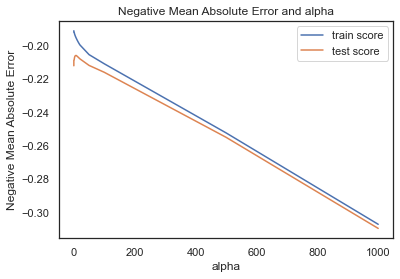

In [263]:
##Plot mean test and train scores with alpha 

ridge_cv_results['param_alpha'] = ridge_cv_results['param_alpha'].astype('int32')

# plotting

plt.plot(ridge_cv_results['param_alpha'], ridge_cv_results['mean_train_score'])
plt.plot(ridge_cv_results['param_alpha'], ridge_cv_results['mean_test_score'])
plt.xlabel('alpha')
plt.ylabel('Negative Mean Absolute Error')
plt.title("Negative Mean Absolute Error and alpha")
plt.legend(['train score', 'test score'], loc='upper right')
plt.show()

In [264]:
##Finding the best estimator for alpha (lambda parameter)
ridge_model_cv.best_estimator_

Ridge(alpha=7.0)

In [265]:
##Checking the coefficient values with lambda (alpha) = 7

ridge = Ridge(alpha=7)

ridge.fit(X_train, y_train)
print("Intercept: ", ridge.intercept_)
print("Coefficients:\n",ridge.coef_)

Intercept:  0.04240710672606287
Coefficients:
 [ 0.06767558  0.21916767  0.14144394 -0.10743596  0.20147493  0.35161455
  0.07536385 -0.25631137  0.07242656 -0.06484242  0.         -0.00729192
  0.02944315 -0.16167111 -0.21015953 -0.03655938  0.17782731  0.10540596
  0.01585281 -0.05739827  0.22458338 -0.13127849 -0.02482025 -0.11287663
 -0.16352688 -0.06373262 -0.07267929 -0.1089424  -0.02440777  0.09949669
 -0.17208597 -0.04671525 -0.11291003 -0.09675854  0.08783762 -0.03496194
  0.00081482 -0.01688647 -0.0624185   0.05249366  0.03084122  0.03926861
 -0.11872856  0.00731957 -0.08602506 -0.13130884  0.09125872 -0.0525457
  0.04725342 -0.1510177   0.19071731 -0.04074423 -0.04677135 -0.08673153]


In [266]:
##Making predictions for train and test sets: Ridge Regression Model
y_pred_train_r = ridge.predict(X_train)
y_pred_test_r = ridge.predict(X_test)

##R2 score for Ridge Regression Model
r2_score_ridge_train = r2_score(y_true= y_train, y_pred= y_pred_train_r)
r2_score_ridge_test = r2_score(y_true= y_test, y_pred= y_pred_test_r)

##Check the mean squared error (MSE) for Ridge Regression Model
MSE_ridge_train = mean_squared_error(y_train, y_pred_train_r)
MSE_ridge_test = mean_squared_error(y_test, y_pred_test_r)

##Mean Absolute error for train and test sets
MAE_ridge_train = mean_absolute_error(y_train, y_pred_train_r)
MAE_ridge_test = mean_absolute_error(y_test, y_pred_test_r)

##Root Mean Squared Error for Train and Test Sets
RMSE_ridge_train = np.sqrt(MSE_ridge_train)
RMSE_ridge_test = np.sqrt(MSE_ridge_test)


print("For Ridge Regression Model (Original Model, alpha=7.0):\n","*"*40)
print("\nFor Train Set:\nR2 score:",r2_score_ridge_train,"\nMSE score:",MSE_ridge_train,"\nMAE score:",MAE_ridge_train,\
     "\nRMSE score:",RMSE_ridge_train)
print("\nFor Test Set:\nR2 score:",r2_score_ridge_test,"\nMSE score:",MSE_ridge_test,"\nMAE score:",MAE_ridge_test,\
      "\nRMSE score:",RMSE_ridge_test,"\n","*"*40)

For Ridge Regression Model (Original Model, alpha=7.0):
 ****************************************

For Train Set:
R2 score: 0.9233674023410886 
MSE score: 0.07663259765891142 
MAE score: 0.1956819537892218 
RMSE score: 0.27682593386261956

For Test Set:
R2 score: 0.8750590244531883 
MSE score: 0.10431930307306864 
MAE score: 0.21999408994333225 
RMSE score: 0.32298498892838445 
 ****************************************


In [268]:
##Creating a dataframe of features and coefficients

ridge_data = pd.DataFrame({'Features':X_train.columns, 'Coefficient':ridge.coef_.round(4), 
                         'Abs_Coefficient_Ridge(Desc_Sort)':abs(ridge.coef_.round(4))})

##Sorting coefficient in descending order of absolute values and reset index
ridge_data = ridge_data.sort_values(by='Abs_Coefficient_Ridge(Desc_Sort)', ascending=False)
ridge_data.reset_index(drop=True, inplace=True)  

#Dataframe rdige_df
ridge_data.head(10)  #Top10

Features  Coefficient  Abs_Coefficient_Ridge(Desc_Sort)
0             GrLivArea       0.3516                            0.3516
1           PropertyAge      -0.2563                            0.2563
2  Neighborhood_Crawfor       0.2246                            0.2246
3           OverallQual       0.2192                            0.2192
4        MSSubClass_160      -0.2102                            0.2102
5           TotalBsmtSF       0.2015                            0.2015
6   Exterior1st_BrkFace       0.1907                            0.1907
7           MSZoning_FV       0.1778                            0.1778
8  Neighborhood_OldTown      -0.1721                            0.1721
9  Neighborhood_MeadowV      -0.1635                            0.1635

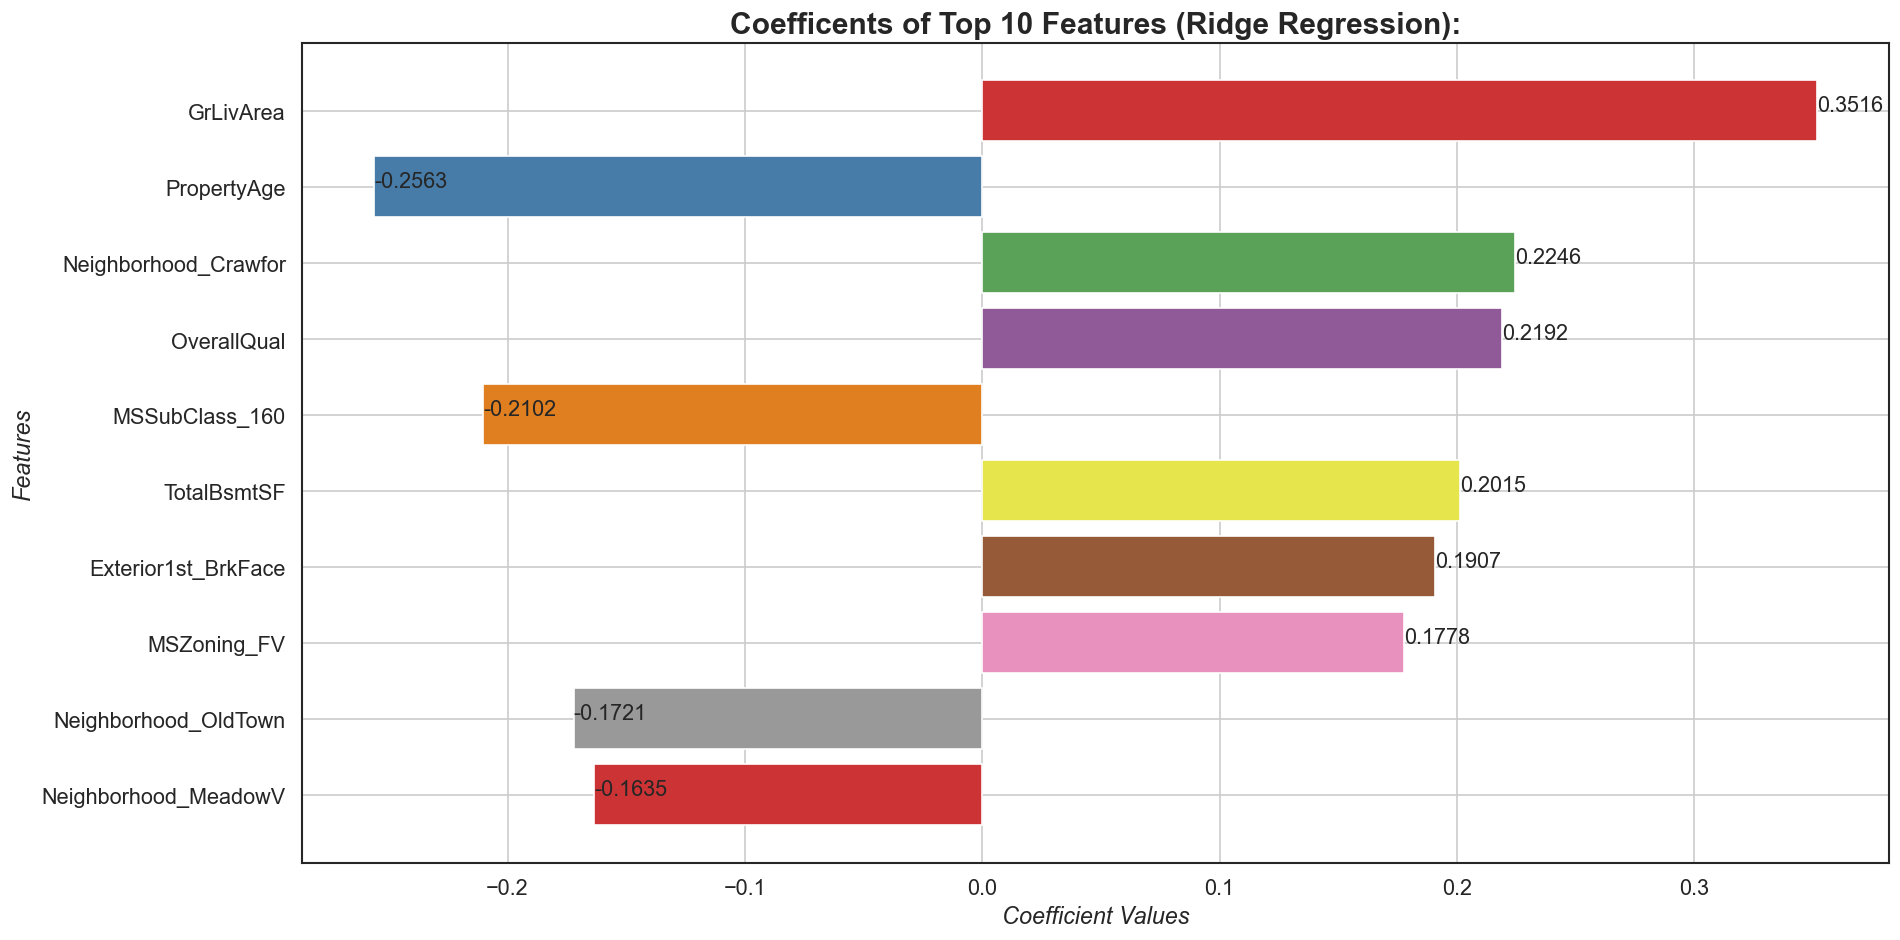

In [269]:
##Coefficient value plot (Ridge Regression)

top10_ridge_data= ridge_data.loc[:9] #Ridge_data with top 10 coefficients

sns.set(style='white')
plt.figure(figsize=(16,8), dpi=120)
ax3= sns.barplot(y=top10_ridge_data['Features'], x=top10_ridge_data['Coefficient'], palette='Set1')

plt.xlabel('Coefficient Values', fontsize= 14, fontstyle='italic')
plt.ylabel('Features' , fontsize= 14, fontstyle='italic')
plt.title('Coefficents of Top 10 Features (Ridge Regression):', fontsize=18,fontweight='bold')

coef= top10_ridge_data['Coefficient'] #Storing coefficient values
for index, value in enumerate(coef):
    plt.text(value, index, str(value), fontsize=13)

plt.grid(True)
plt.xticks(fontsize=13)
plt.yticks(fontsize=13)
plt.autoscale()
plt.tight_layout()
plt.show()

C:\Users\kouls\anaconda\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


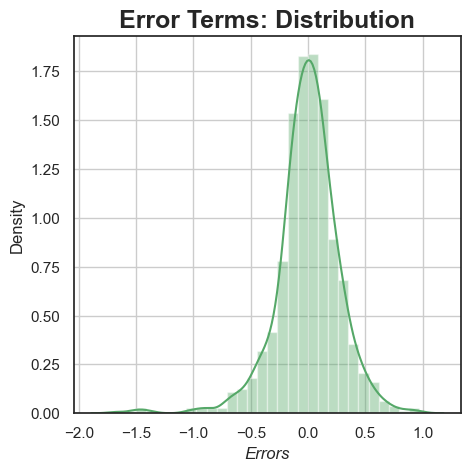

In [270]:
# Plot the histogram of the error terms for train set
sns.set_style('white')
plt.figure(figsize=(5,5), dpi=100)
res = (y_train - y_pred_train_r)     #residuals
sns.distplot(res , bins = 30, color='g')
plt.title('Error Terms: Distribution', fontweight='bold', fontsize = 18)               
plt.xlabel('Errors', fontstyle='italic', fontsize = 12) 
plt.grid(True)
plt.show()

Error terms are approximately normally distributed with mean 0, so our assumption holds true

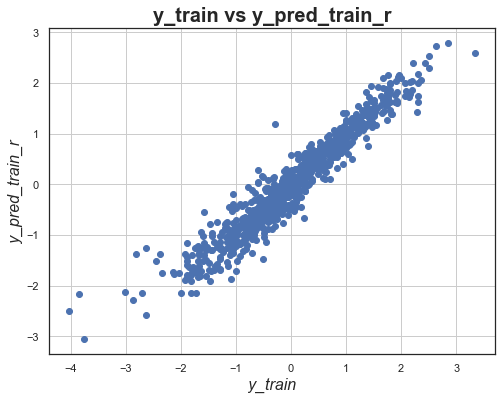

In [271]:
# Plotting y_train and y_train_pred to understand the residuals.
sns.set_style('white')
plt.figure(figsize = (8,6))
plt.scatter(y_train,y_pred_train_r)
plt.title('y_train vs y_pred_train_r', fontweight='bold', fontsize = 20)           
plt.xlabel('y_train', fontstyle='italic', fontsize = 16)              
plt.ylabel('y_pred_train_r', fontstyle='italic', fontsize = 16) 
plt.grid(True)
plt.show()

In [272]:
y_train.shape

(929,)

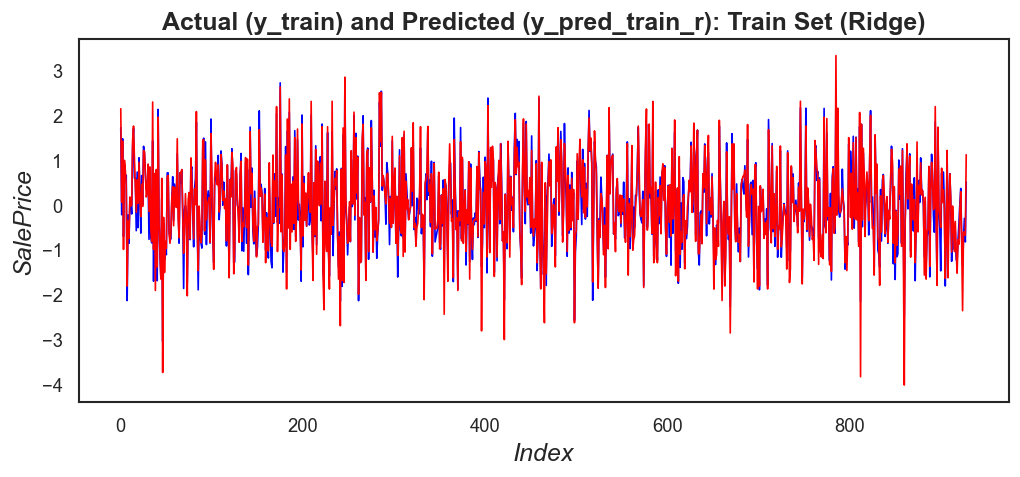

In [274]:
# Actual and Predicted (Train Set)
sns.set_style('white')
plt.figure(figsize = (10,4), dpi=120)
f = [i for i in range(0,929,1)] #Since y_train has 929 observations
g = [i for i in range(0,929,1)]
plt.plot(f, y_pred_train_r, color="blue", linewidth=1, linestyle="-")     #Predicted 'y_pred_train_r' plot
plt.plot(g, y_train, color="red",  linewidth=1, linestyle="-")  #Actual 'y_train' plot
plt.title("Actual (y_train) and Predicted (y_pred_train_r): Train Set (Ridge)", fontsize=15, fontweight='bold')    
plt.xlabel('Index', fontsize=15, fontstyle='italic')                              
plt.ylabel('SalePrice', fontsize=15, fontstyle='italic')  
plt.show()

Blue: Predicted (y_pred_train_r)- - - - - - - - - - - - - - Red: Actual (y_train)

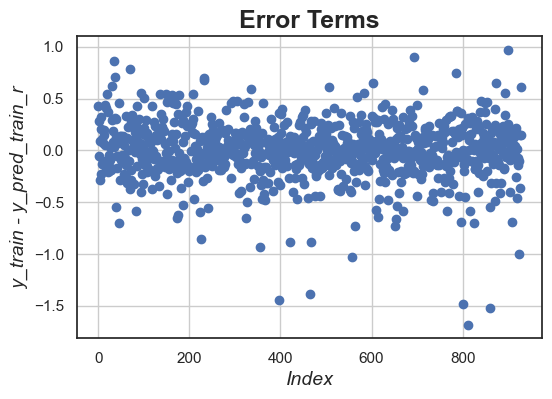

In [275]:
# Error terms for train set
sns.set_style('white')
plt.figure(figsize = (6,4), dpi=100)
j = [i for i in range(0,929,1)] #For 929 observations in the train set
res_train = (y_train-y_pred_train_r) #residuals (train set)
plt.scatter(j, res_train)

plt.title('Error Terms', fontsize=18, fontweight='bold')              
plt.xlabel('Index', fontstyle='italic', fontsize=14)                      
plt.ylabel('y_train - y_pred_train_r', fontstyle='italic', fontsize=14)   
plt.grid(True)
plt.show()

The residuals are scattered along (y=0) and are independent of each other.

C:\Users\kouls\anaconda\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


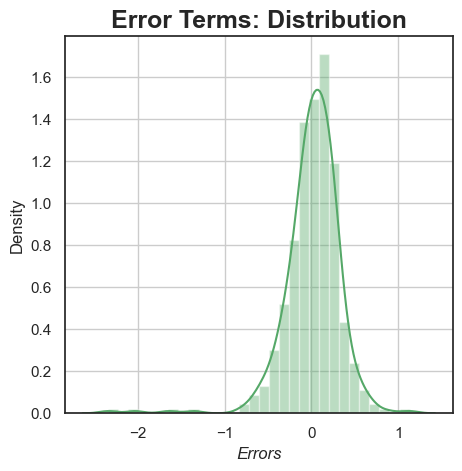

In [276]:
# Plot the histogram of the error terms (test set)
sns.set_style('white')
plt.figure(figsize=(5,5), dpi=100)
res = (y_test - y_pred_test_r)     #residuals
sns.distplot(res , bins = 30, color='g')
plt.title('Error Terms: Distribution', fontweight='bold', fontsize = 18)               
plt.xlabel('Errors', fontstyle='italic', fontsize = 12) 
plt.grid(True)
plt.show()

Error terms seem to be approximately normally distributed with mean 0, so our assumption holds true.

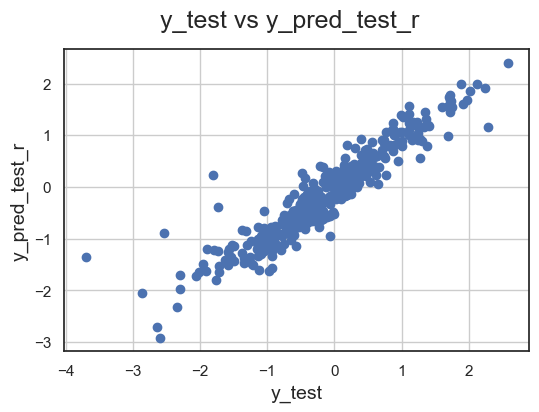

In [277]:
# Plotting y_test and y_pred_test_r to understand the spread.
sns.set_style('white')
fig = plt.figure(figsize=(6,4), dpi=100)
plt.scatter(y_test,y_pred_test_r)
fig.suptitle('y_test vs y_pred_test_r', fontsize=18)             
plt.xlabel('y_test', fontsize=14)                       
plt.ylabel('y_pred_test_r', fontsize=14)  
plt.grid(True)
plt.show()

In [278]:
y_test.shape

(399,)

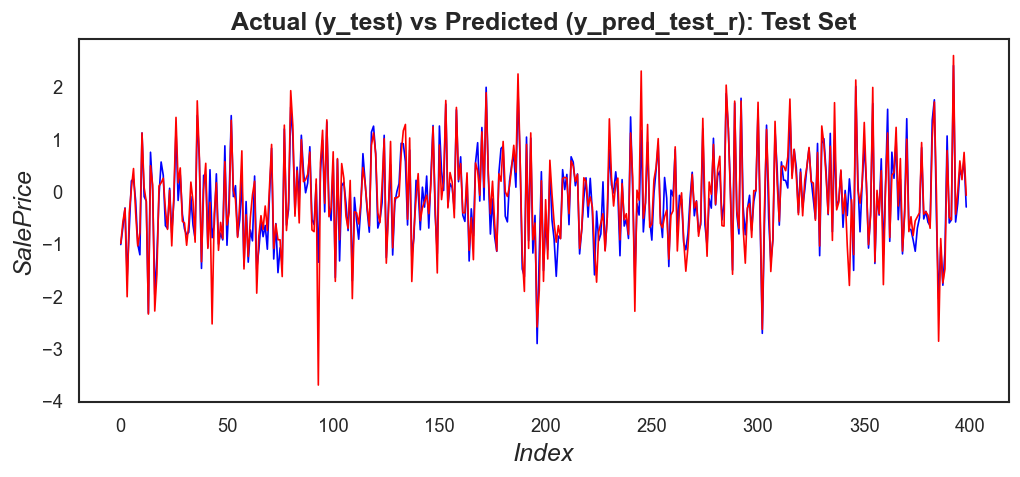

In [279]:
# Actual vs Predicted (Test Set)
plt.figure(figsize = (10,4), dpi=120)
p = [i for i in range(0,399,1)] #As test set has 399 observations
l = [i for i in range(0,399,1)]
plt.plot(p, y_pred_test_r, color="blue", linewidth=1, linestyle="-")   #Predicted 'y_pred_test_r' plot(test pred)
plt.plot(l, y_test, color="red",  linewidth=1, linestyle="-")   #Actual 'y_test' plot
plt.title('Actual (y_test) vs Predicted (y_pred_test_r): Test Set', fontsize=15, fontweight='bold')                              
plt.ylabel('SalePrice', fontsize=15, fontstyle='italic')  
plt.xlabel('Index', fontsize=15, fontstyle='italic')
plt.show()

Blue: Predicted (y_pred_test_r)- - - - - - - - - - - - - - Red: Actual (y_test)

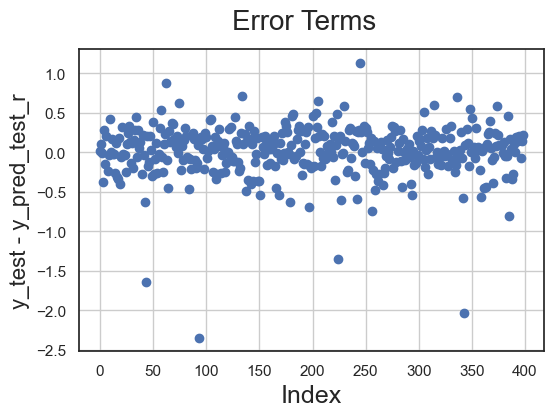

In [280]:
# Error terms
fig = plt.figure(figsize=(6,4), dpi=100)
o = [i for i in range(0,399,1)] #For 399 observations in the test set
res_test = (y_test-y_pred_test_r) #residuals test set
plt.scatter(o,res_test)

fig.suptitle('Error Terms', fontsize=20)              
plt.xlabel('Index', fontsize=18)                     
plt.ylabel('y_test - y_pred_test_r', fontsize=16)    
plt.grid(True)
plt.show()

The residuals are scattered along (y=0) and are independent of each other.

# Lasso Regression

In [281]:
##Lasso Regression Model. 
lasso = Lasso()

##List of alphas (lambda parameter)

params_1 = {'alpha': [0.00001, 0.0001, 0.0002, 0.0003, 0.0005, 0.0006, 0.0007,0.0008, 0.0009, 0.001, 0.002,0.003,0.004, 0.005, 0.01, 0.05, 0.1, 0.2, 0.3, 0.4, 0.5,
                      0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0, 
                    9.0, 10.0, 20, 50, 100, 500, 1000 ]}

##Cross-Validation

folds = 5
lasso_model_cv = GridSearchCV(estimator = lasso,                         
                        param_grid = params_1, 
                        scoring= 'neg_mean_absolute_error', 
                        cv = folds, 
                        return_train_score=True,
                        verbose = 1)            

lasso_model_cv.fit(X_train, y_train)

Fitting 5 folds for each of 40 candidates, totalling 200 fits


GridSearchCV(cv=5, estimator=Lasso(),
             param_grid={'alpha': [1e-05, 0.0001, 0.0002, 0.0003, 0.0005,
                                   0.0006, 0.0007, 0.0008, 0.0009, 0.001, 0.002,
                                   0.003, 0.004, 0.005, 0.01, 0.05, 0.1, 0.2,
                                   0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0,
                                   3.0, 4.0, 5.0, ...]},
             return_train_score=True, scoring='neg_mean_absolute_error',
             verbose=1)

In [282]:
##Display the mean scores

lasso_cv_results = pd.DataFrame(lasso_model_cv.cv_results_)
lasso_cv_results[['param_alpha', 'mean_train_score', 'mean_test_score', 'rank_test_score']].sort_values(by = ['rank_test_score'])

param_alpha  mean_train_score  mean_test_score  rank_test_score
9        0.001         -0.195359        -0.207946                1
8       0.0009         -0.194868        -0.208040                2
7       0.0008         -0.194387        -0.208301                3
6       0.0007         -0.193872        -0.208660                4
10       0.002         -0.199408        -0.208872                5
5       0.0006         -0.193349        -0.209079                6
4       0.0005         -0.192894        -0.209584                7
11       0.003         -0.202299        -0.210600                8
3       0.0003         -0.192086        -0.210847                9
2       0.0002         -0.191600        -0.211650               10
1       0.0001         -0.191280        -0.212635               11
12       0.004         -0.205286        -0.213146               12
0      0.00001         -0.191056        -0.213327               13
13       0.005         -0.208434        -0.215971               14
14        0.01         -0.217075        -0.221879               15
15        0.05         -0.234319        -0.238467               16
16         0.1         -0.267692        -0.270710               17
17         0.2         -0.331228        -0.334327               18
18         0.3         -0.412182        -0.415597               19
19         0.4         -0.494744        -0.497404               20
20         0.5         -0.566245        -0.568684               21
21         0.6         -0.632814        -0.634786               22
22         0.7         -0.696714        -0.698737               23
23         0.8         -0.764348        -0.766433               24
37         100         -0.787354        -0.788532               25
36          50         -0.787354        -0.788532               25
35          20         -0.787354        -0.788532               25
34        10.0         -0.787354        -0.788532               25
33         9.0         -0.787354        -0.788532               25
32         8.0         -0.787354        -0.788532               25
31         7.0         -0.787354        -0.788532               25
29         5.0         -0.787354        -0.788532               25
38         500         -0.787354        -0.788532               25
28         4.0         -0.787354        -0.788532               25
27         3.0         -0.787354        -0.788532               25
26         2.0         -0.787354        -0.788532               25
25         1.0         -0.787354        -0.788532               25
24         0.9         -0.787354        -0.788532               25
30         6.0         -0.787354        -0.788532               25
39        1000         -0.787354        -0.788532               25

In [283]:
##Plotting a magnified graph for a lower range of alpha.

lasso = Lasso()

##List of alphas (lambda parameter: consider smaller range on the basis of lasso_cv_results table ranking)

params_2 = {'alpha': [0.00001, 0.0001, 0.0002, 0.0003, 0.0004, 0.0005, 0.0006, 0.0007, 0.0008, 0.0009, 0.001,0.002,0.003, 0.005, 0.01, 0.02, 0.05]}

##Cross-Validation

folds = 5
lasso_model_cv = GridSearchCV(estimator = lasso,                         
                        param_grid = params_2, 
                        scoring= 'neg_mean_absolute_error', 
                        cv = folds, 
                        return_train_score=True,
                        verbose = 1)            

lasso_model_cv.fit(X_train, y_train)

Fitting 5 folds for each of 17 candidates, totalling 85 fits


GridSearchCV(cv=5, estimator=Lasso(),
             param_grid={'alpha': [1e-05, 0.0001, 0.0002, 0.0003, 0.0004,
                                   0.0005, 0.0006, 0.0007, 0.0008, 0.0009,
                                   0.001, 0.002, 0.003, 0.005, 0.01, 0.02,
                                   0.05]},
             return_train_score=True, scoring='neg_mean_absolute_error',
             verbose=1)

In [284]:
##ReDisplay the mean scores

lasso_cv_results = pd.DataFrame(lasso_model_cv.cv_results_)
lasso_cv_results[['param_alpha', 'mean_train_score', 'mean_test_score', 'rank_test_score']].sort_values(by = ['rank_test_score'])

param_alpha  mean_train_score  mean_test_score  rank_test_score
10       0.001         -0.195359        -0.207946                1
9       0.0009         -0.194868        -0.208040                2
8       0.0008         -0.194387        -0.208301                3
7       0.0007         -0.193872        -0.208660                4
11       0.002         -0.199408        -0.208872                5
6       0.0006         -0.193349        -0.209079                6
5       0.0005         -0.192894        -0.209584                7
4       0.0004         -0.192498        -0.210161                8
12       0.003         -0.202299        -0.210600                9
3       0.0003         -0.192086        -0.210847               10
2       0.0002         -0.191600        -0.211650               11
1       0.0001         -0.191280        -0.212635               12
0      0.00001         -0.191056        -0.213327               13
13       0.005         -0.208434        -0.215971               14
14        0.01         -0.217075        -0.221879               15
15        0.02         -0.221570        -0.224862               16
16        0.05         -0.234319        -0.238467               17

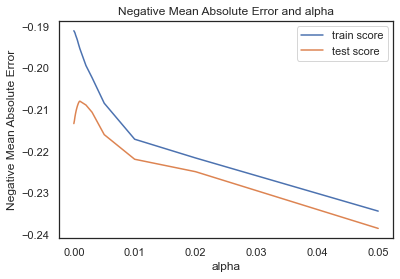

In [285]:
##Plotting mean test and train scoes with alpha 
lasso_cv_results['param_alpha'] = lasso_cv_results['param_alpha'].astype('float64')

##plotting
plt.plot(lasso_cv_results['param_alpha'], lasso_cv_results['mean_train_score'])
plt.plot(lasso_cv_results['param_alpha'], lasso_cv_results['mean_test_score'])
plt.xlabel('alpha')
plt.ylabel('Negative Mean Absolute Error')

plt.title("Negative Mean Absolute Error and alpha")
plt.legend(['train score', 'test score'], loc='upper right')
plt.show()

In [286]:
# get the best estimator for lambda

lasso_model_cv.best_estimator_

Lasso(alpha=0.001)

In [287]:
# check the coefficient values with lambda = 0.001

lasso = Lasso(alpha=0.001)
        
lasso.fit(X_train, y_train) 
print("Intercept: ",lasso.intercept_)
print("Coefficients:\n ",lasso.coef_)

Intercept:  0.013257698784719057
Coefficients:
  [ 0.06050582  0.22069735  0.14079534 -0.10544678  0.20076054  0.35724589
  0.07612678 -0.25991882  0.07171326 -0.0372287   0.         -0.0047233
  0.         -0.18046069 -0.23587117 -0.00706327  0.20551927  0.09644515
  0.         -0.02396601  0.28075343 -0.09841508 -0.         -0.08324103
 -0.16506197 -0.0139126  -0.03369476 -0.07320385 -0.          0.11893215
 -0.14870935 -0.         -0.07516103 -0.05957233  0.09766019 -0.
  0.         -0.         -0.          0.04856465  0.          0.
 -0.11295373  0.         -0.08078171 -0.14042683  0.09105154 -0.04850027
  0.         -0.26979288  0.21083444 -0.00541028 -0.         -0.07312639]


In [288]:
##Making predictions for train and test sets: Lasso Regression Model
y_pred_train_l = lasso.predict(X_train)
y_pred_test_l = lasso.predict(X_test)

##R2 score for Lasso Regression Model
r2_score_lasso_train = r2_score(y_true= y_train, y_pred= y_pred_train_l)
r2_score_lasso_test = r2_score(y_true= y_test, y_pred= y_pred_test_l)

##Check the mean squared error (MSE) for Lasso Regression Model
MSE_lasso_train = mean_squared_error(y_train, y_pred_train_l)
MSE_lasso_test = mean_squared_error(y_test, y_pred_test_l)

##Mean Absolute error for train and test sets
MAE_lasso_train = mean_absolute_error(y_train, y_pred_train_l)
MAE_lasso_test = mean_absolute_error(y_test, y_pred_test_l)

##Root Mean Squared Error for Train and Test Sets
RMSE_lasso_train = np.sqrt(MSE_lasso_train)
RMSE_lasso_test = np.sqrt(MSE_lasso_test)

print("For Lasso Regression Model (Original Model: alpha=0.001):\n","*"*40)
print("\nFor Train Set:\nR2 score:",r2_score_lasso_train,"\nMSE score:",MSE_lasso_train,"\nMAE score:",MAE_lasso_train,\
     "\nRMSE score:",RMSE_lasso_train)
print("\nFor Test Set:\nR2 score:",r2_score_lasso_test,"\nMSE score:",MSE_lasso_test,"\nMAE score:",MAE_lasso_test,\
      "\nRMSE score:",RMSE_lasso_test,"\n","*"*40)

For Lasso Regression Model (Original Model: alpha=0.001):
 ****************************************

For Train Set:
R2 score: 0.9230202152828737 
MSE score: 0.07697978471712633 
MAE score: 0.19656236173591238 
RMSE score: 0.27745231070785176

For Test Set:
R2 score: 0.8744433199941747 
MSE score: 0.10483338470067058 
MAE score: 0.22062473371971553 
RMSE score: 0.32377983986139497 
 ****************************************


In [289]:
##Creating a dataframe of features and coefficients

lasso_df = pd.DataFrame({'Features':X_train.columns, 'Coefficient':lasso.coef_.round(4), \
                         'Abs_Coefficient_Lasso(Desc_Sort)':abs(lasso.coef_.round(4))})
##Sorting coefficient in descending order of absolute values and reset index
lasso_df = lasso_df.sort_values(by='Abs_Coefficient_Lasso(Desc_Sort)', ascending=False)
lasso_df.reset_index(drop=True, inplace=True)  

#lasso df
lasso_df.head(10)  #Top10 features display

Features  Coefficient  Abs_Coefficient_Lasso(Desc_Sort)
0             GrLivArea       0.3572                            0.3572
1  Neighborhood_Crawfor       0.2808                            0.2808
2   Exterior1st_BrkComm      -0.2698                            0.2698
3           PropertyAge      -0.2599                            0.2599
4        MSSubClass_160      -0.2359                            0.2359
5           OverallQual       0.2207                            0.2207
6   Exterior1st_BrkFace       0.2108                            0.2108
7           MSZoning_FV       0.2055                            0.2055
8           TotalBsmtSF       0.2008                            0.2008
9         MSSubClass_90      -0.1805                            0.1805

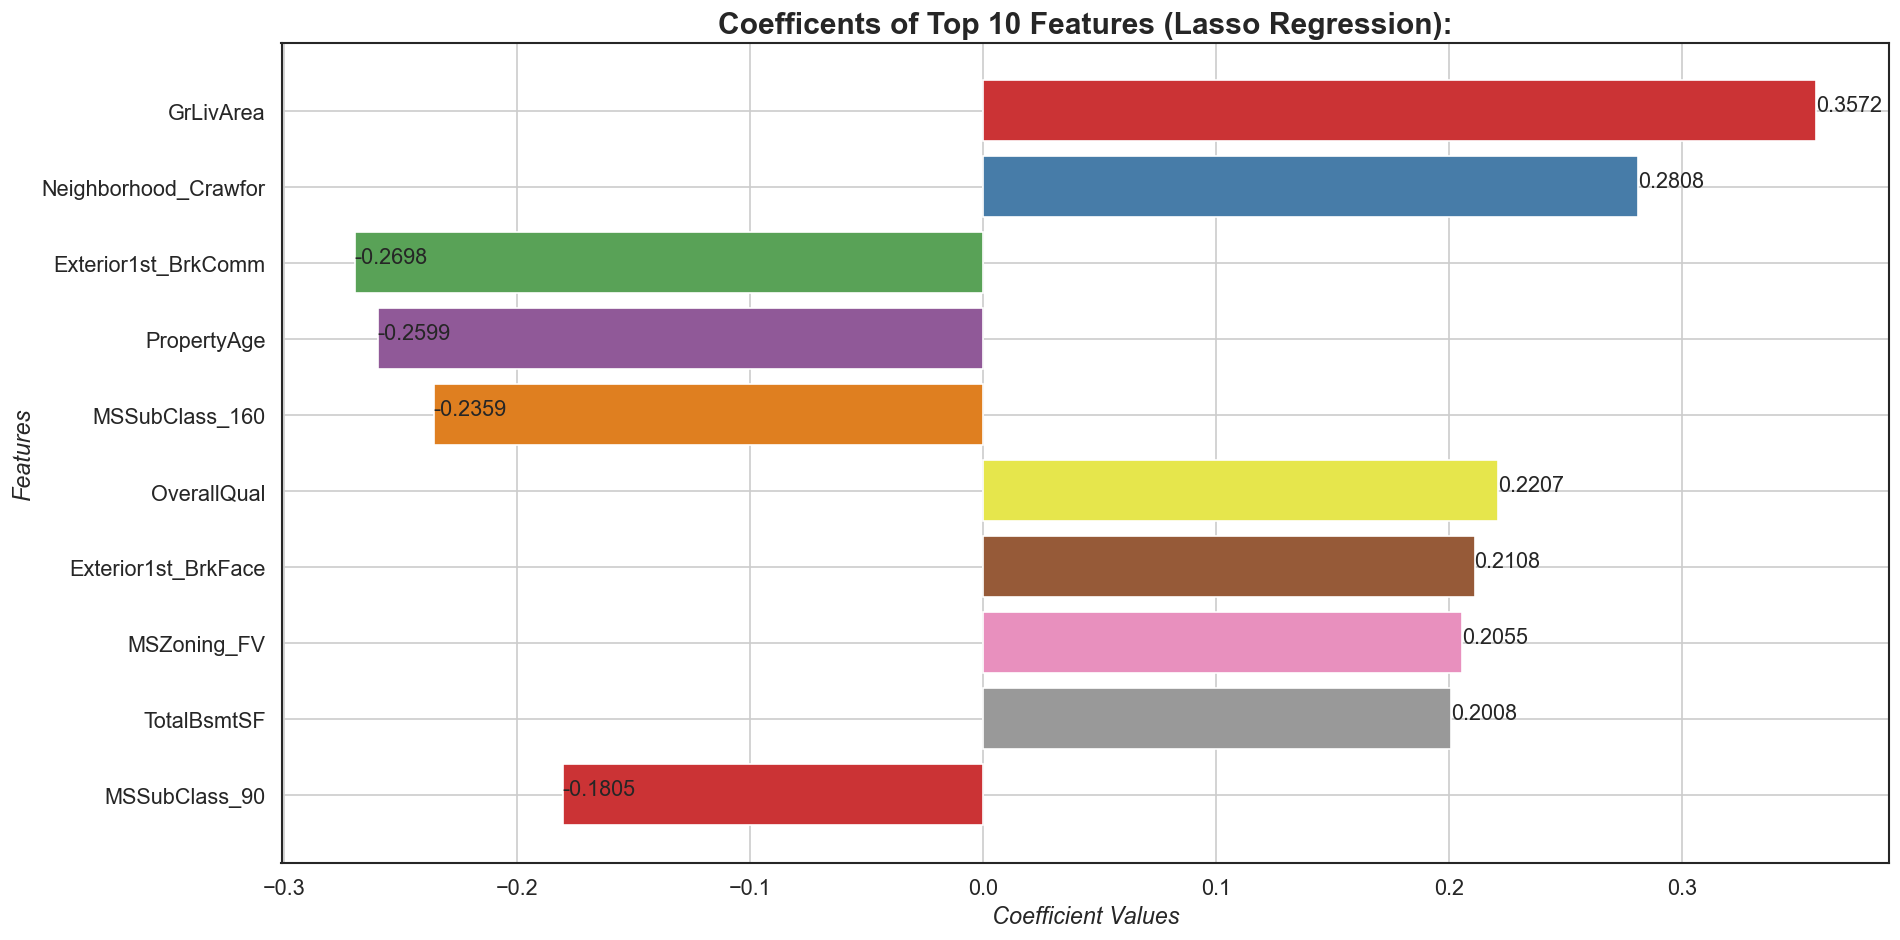

In [290]:
##Coefficient value plot (Lasso Regression)

top10_lasso_df= lasso_df.loc[:9] #Lasso_df with top 10 coefficients

sns.set(style='white')
plt.figure(figsize=(16,8), dpi=120)
ax4= sns.barplot(y=top10_lasso_df['Features'], x=top10_lasso_df['Coefficient'], palette='Set1')

plt.xlabel('Coefficient Values', fontsize= 14, fontstyle='italic')
plt.ylabel('Features' , fontsize= 14, fontstyle='italic')
plt.title('Coefficents of Top 10 Features (Lasso Regression):', fontsize=18,fontweight='bold')

c= top10_lasso_df['Coefficient'] #Storing coefficient values
for index, value in enumerate(c):
    plt.text(value, index, str(value), fontsize=13)

plt.grid(True)
plt.xticks(fontsize=13)
plt.yticks(fontsize=13)
plt.autoscale()
plt.tight_layout()
plt.show()

In [291]:
##Creating the list of top 5 features from Lasso Regression Model which we will be using later to answer 'Question 3'
top5_original_lasso_features = list(top10_lasso_df['Features'].iloc[0:5])
top5_original_lasso_features

['GrLivArea',
 'Neighborhood_Crawfor',
 'Exterior1st_BrkComm',
 'PropertyAge',
 'MSSubClass_160']

# Residual Analysis of Model

Checking for the error terms distribution. They should be normally distributed as it is one of the major assumptions of linear regression.

C:\Users\kouls\anaconda\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


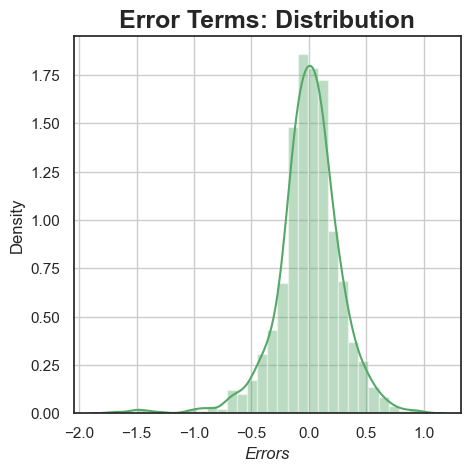

In [292]:
# Plot the histogram of the error terms for train set
sns.set_style('white')
plt.figure(figsize=(5,5), dpi=100)
res1 = (y_train - y_pred_train_l)     #residuals
sns.distplot(res1 , bins = 30, color='g')
plt.title('Error Terms: Distribution', fontweight='bold', fontsize = 18)               
plt.xlabel('Errors', fontstyle='italic', fontsize = 12) 
plt.grid(True)
plt.show()

Error terms seem to be approximately normally distributed with mean 0, so our assumption holds true.

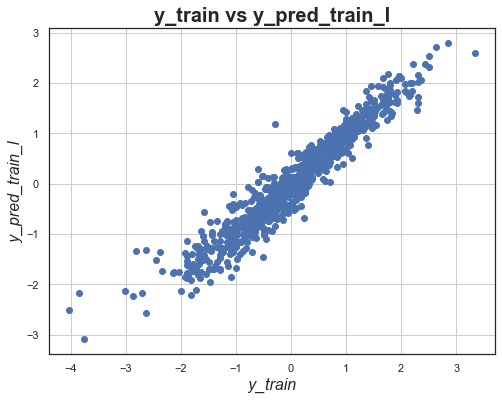

In [293]:
# Plotting y_train and y_train_pred to understand the residuals.
sns.set_style('white')
plt.figure(figsize = (8,6))
plt.scatter(y_train,y_pred_train_l)
plt.title('y_train vs y_pred_train_l', fontweight='bold', fontsize = 20)           
plt.xlabel('y_train', fontstyle='italic', fontsize = 16)              
plt.ylabel('y_pred_train_l', fontstyle='italic', fontsize = 16) 
plt.grid(True)
plt.show()

In [294]:
y_train.shape

(929,)

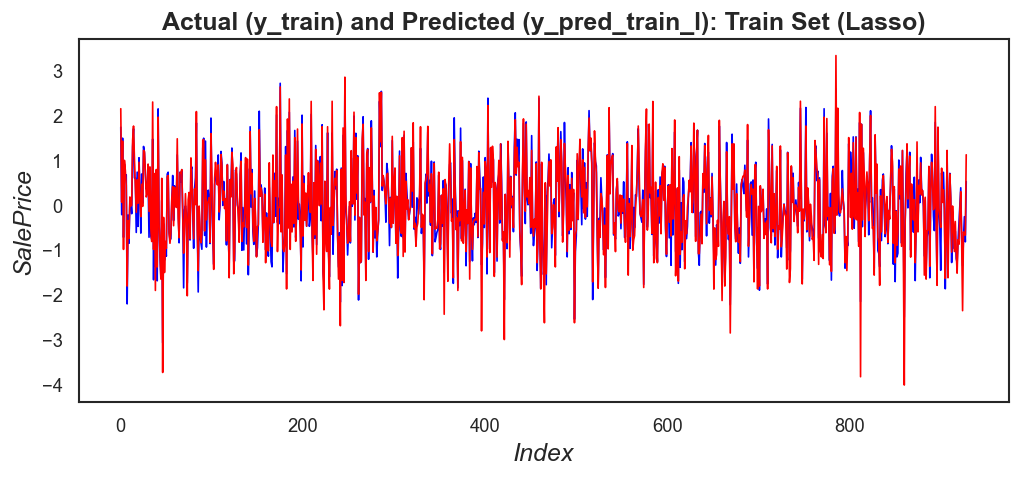

In [296]:
# Actual and Predicted (Train Set)
sns.set_style('white')
plt.figure(figsize = (10,4), dpi=120)
f1 = [i for i in range(0,929,1)] #Since y_train has 929 observations
g1 = [i for i in range(0,929,1)]
plt.plot(f1, y_pred_train_l, color="blue", linewidth=1, linestyle="-")     #Predicted 'y_pred_train_l' plot
plt.plot(g1, y_train, color="red",  linewidth=1, linestyle="-")  #Actual 'y_train' plot
plt.title("Actual (y_train) and Predicted (y_pred_train_l): Train Set (Lasso)", fontsize=15, fontweight='bold')    
plt.xlabel('Index', fontsize=15, fontstyle='italic')                              
plt.ylabel('SalePrice', fontsize=15, fontstyle='italic')  
plt.show()

Blue: Predicted (y_pred_train_l)- - - - - - - - - - - - - - Red: Actual (y_train)

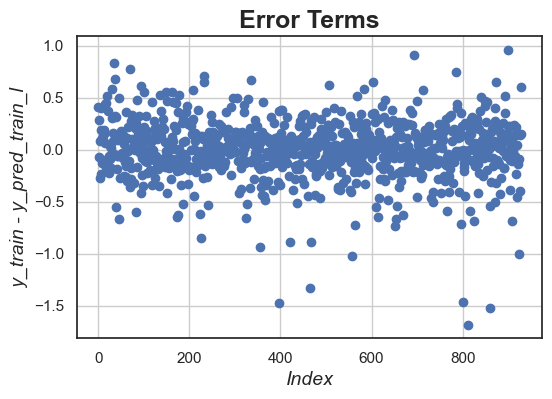

In [297]:
# Error terms for train set
sns.set_style('white')
plt.figure(figsize = (6,4), dpi=100)
j1 = [i for i in range(0,929,1)] #For 929 observations in the train set
res_train1 = (y_train-y_pred_train_l) #residuals (train set)
plt.scatter(j1, res_train1)

plt.title('Error Terms', fontsize=18, fontweight='bold')              
plt.xlabel('Index', fontstyle='italic', fontsize=14)                      
plt.ylabel('y_train - y_pred_train_l', fontstyle='italic', fontsize=14)   
plt.grid(True)
plt.show()

The residuals are scattered along (y=0) and are independent of each other.

C:\Users\kouls\anaconda\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


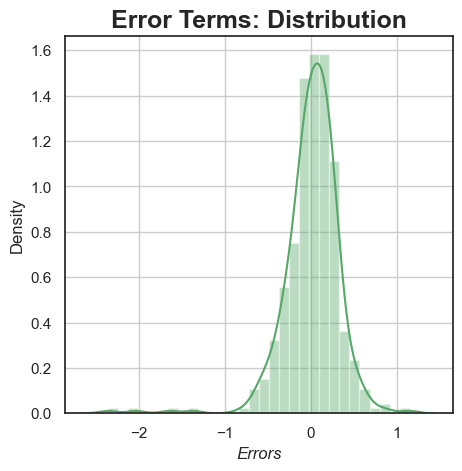

In [298]:
# Plot the histogram of the error terms for test set
sns.set_style('white')
plt.figure(figsize=(5,5), dpi=100)
res1 = (y_test - y_pred_test_l)     #residuals
sns.distplot(res1 , bins = 30, color='g')
plt.title('Error Terms: Distribution', fontweight='bold', fontsize = 18)               
plt.xlabel('Errors', fontstyle='italic', fontsize = 12) 
plt.grid(True)
plt.show()

Error terms seem to be approximately normally distributed with mean 0, so our assumption holds true.

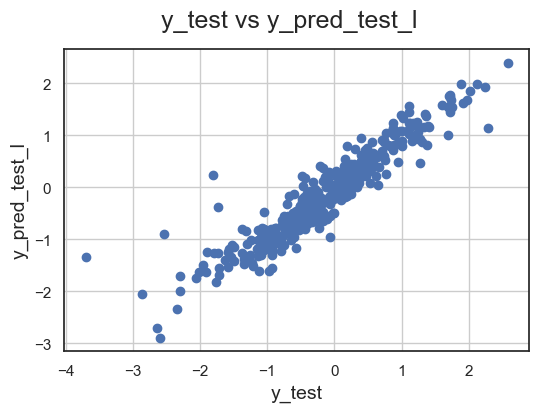

In [299]:
# Plotting y_test and y_pred_test_l to understand the spread.
sns.set_style('white')
fig = plt.figure(figsize=(6,4), dpi=100)
plt.scatter(y_test,y_pred_test_l)
fig.suptitle('y_test vs y_pred_test_l', fontsize=18)             
plt.xlabel('y_test', fontsize=14)                       
plt.ylabel('y_pred_test_l', fontsize=14)  
plt.grid(True)
plt.show()

In [300]:
y_test.shape

(399,)

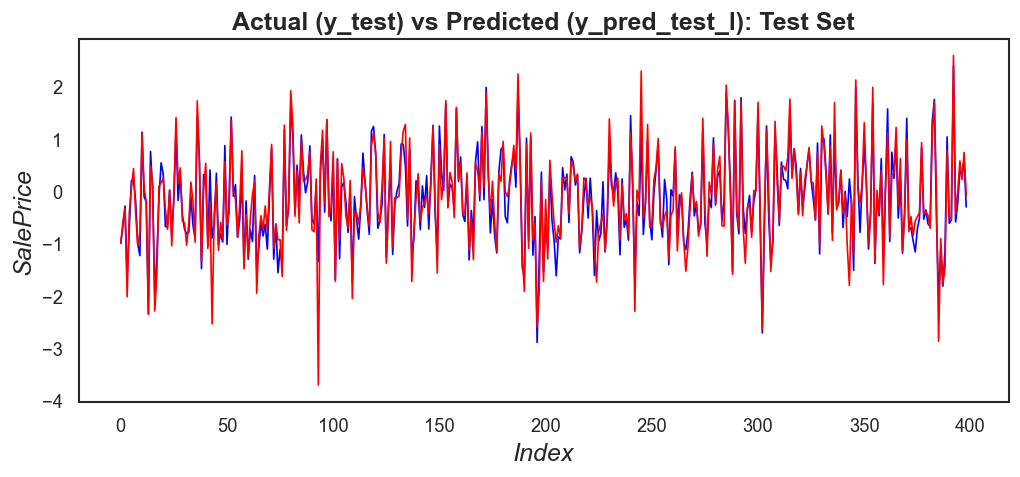

In [301]:
# Actual vs Predicted (Test Set)
plt.figure(figsize = (10,4), dpi=120)
p2 = [i for i in range(0,399,1)] #As test set has 399 observations
l2 = [i for i in range(0,399,1)]
plt.plot(p2, y_pred_test_l, color="blue", linewidth=1, linestyle="-")   #Predicted 'y_pred_test_l' plot(test pred)
plt.plot(l2, y_test, color="red",  linewidth=1, linestyle="-")   #Actual 'y_test' plot
plt.title('Actual (y_test) vs Predicted (y_pred_test_l): Test Set', fontsize=15, fontweight='bold')                              
plt.ylabel('SalePrice', fontsize=15, fontstyle='italic')  
plt.xlabel('Index', fontsize=15, fontstyle='italic')
plt.show()

Blue: Predicted (y_pred_test_l)- - - - - - - - - - - - - - Red: Actual (y_test)

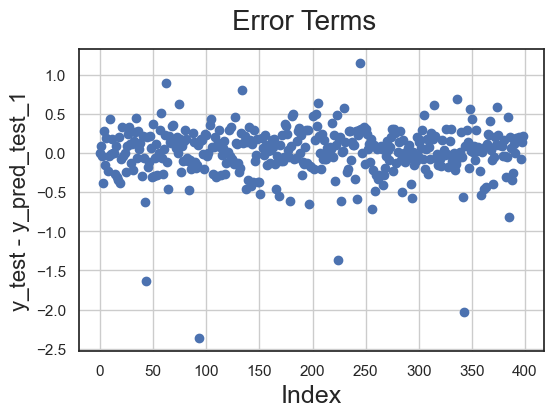

In [302]:
# Error terms
fig = plt.figure(figsize=(6,4), dpi=100)
o1 = [i for i in range(0,399,1)] #For 399 observations in the test set
res_test1 = (y_test-y_pred_test_l) #residuals test set
plt.scatter(o1,res_test1)

fig.suptitle('Error Terms', fontsize=20)              
plt.xlabel('Index', fontsize=18)                     
plt.ylabel('y_test - y_pred_test_1', fontsize=16)    
plt.grid(True)
plt.show()

The residuals are scattered along (y=0) and are independent of each other.

# Assignment II

Q1. What is the optimal value of alpha for ridge and lasso regression? What will be the changes in the model if you choose double the value of alpha for both ridge and lasso? What will be the most important predictor variables after the change is implemented?

Answer:
Ridge(alpha=7.0)
Lasso(alpha=0.001)

#Now we will Check the coefficient values with lambda (alpha) = 7*2 = 14

ridge = Ridge(alpha=14)

ridge.fit(X_train, y_train)
print("Intercept: ", ridge.intercept_)
print("Coefficients:\n",ridge.coef_)

In [312]:
##Make predictions for train and test sets: Ridge Regression Model
y_pred_train_r = ridge.predict(X_train)
y_pred_test_r = ridge.predict(X_test)

##R2 score for Ridge Regression Model
r2_score_ridge_train = r2_score(y_true= y_train, y_pred= y_pred_train_r)
r2_score_ridge_test = r2_score(y_true= y_test, y_pred= y_pred_test_r)

##Check the mean squared error (MSE) for Ridge Regression Model
MSE_ridge_train = mean_squared_error(y_train, y_pred_train_r)
MSE_ridge_test = mean_squared_error(y_test, y_pred_test_r)

##Mean Absolute error for train and test sets
MAE_ridge_train = mean_absolute_error(y_train, y_pred_train_r)
MAE_ridge_test = mean_absolute_error(y_test, y_pred_test_r)

##Root Mean Squared Error for Train and Test Sets
RMSE_ridge_train = np.sqrt(MSE_ridge_train)
RMSE_ridge_test = np.sqrt(MSE_ridge_test)


print("For Ridge Regression Model (Doubled alpha model, alpha=7*2=14):\n","*"*40)
print("\nFor Train Set:\nR2 score:",r2_score_ridge_train,"\nMSE score:",MSE_ridge_train,"\nMAE score:",MAE_ridge_train,\
     "\nRMSE score:",RMSE_ridge_train)
print("\nFor Test Set:\nR2 score:",r2_score_ridge_test,"\nMSE score:",MSE_ridge_test,"\nMAE score:",MAE_ridge_test,\
      "\nRMSE score:",RMSE_ridge_test,"\n","*"*40)

For Ridge Regression Model (Doubled alpha model, alpha=7*2=14):
 ****************************************

For Train Set:
R2 score: 0.9215159047399489 
MSE score: 0.07848409526005107 
MAE score: 0.19774184498344707 
RMSE score: 0.2801501298590652

For Test Set:
R2 score: 0.8734512065487656 
MSE score: 0.10566174851599645 
MAE score: 0.22227064946011924 
RMSE score: 0.32505653126186596 
 ****************************************


In [313]:
##Creating a dataframe of features and coefficients

ridge_df = pd.DataFrame({'Features':X_train.columns, 'Coefficient':ridge.coef_.round(4), 
                         'Abs_Coefficient_Ridge(Desc_Sort)':abs(ridge.coef_.round(4))})

##Sorting coefficient in descending order of absolute values and reset index
ridge_df = ridge_df.sort_values(by='Abs_Coefficient_Ridge(Desc_Sort)', ascending=False)
ridge_df.reset_index(drop=True, inplace=True)  

#Dataframe rdige_df
ridge_df.head(10)    #Top10 features display

Features  Coefficient  Abs_Coefficient_Ridge(Desc_Sort)
0             GrLivArea       0.3417                            0.3417
1           PropertyAge      -0.2469                            0.2469
2           OverallQual       0.2286                            0.2286
3  Neighborhood_Crawfor       0.2050                            0.2050
4           TotalBsmtSF       0.2043                            0.2043
5   Exterior1st_BrkFace       0.1603                            0.1603
6        MSSubClass_160      -0.1585                            0.1585
7           MSZoning_FV       0.1503                            0.1503
8  Neighborhood_OldTown      -0.1463                            0.1463
9           OverallCond       0.1389                            0.1389

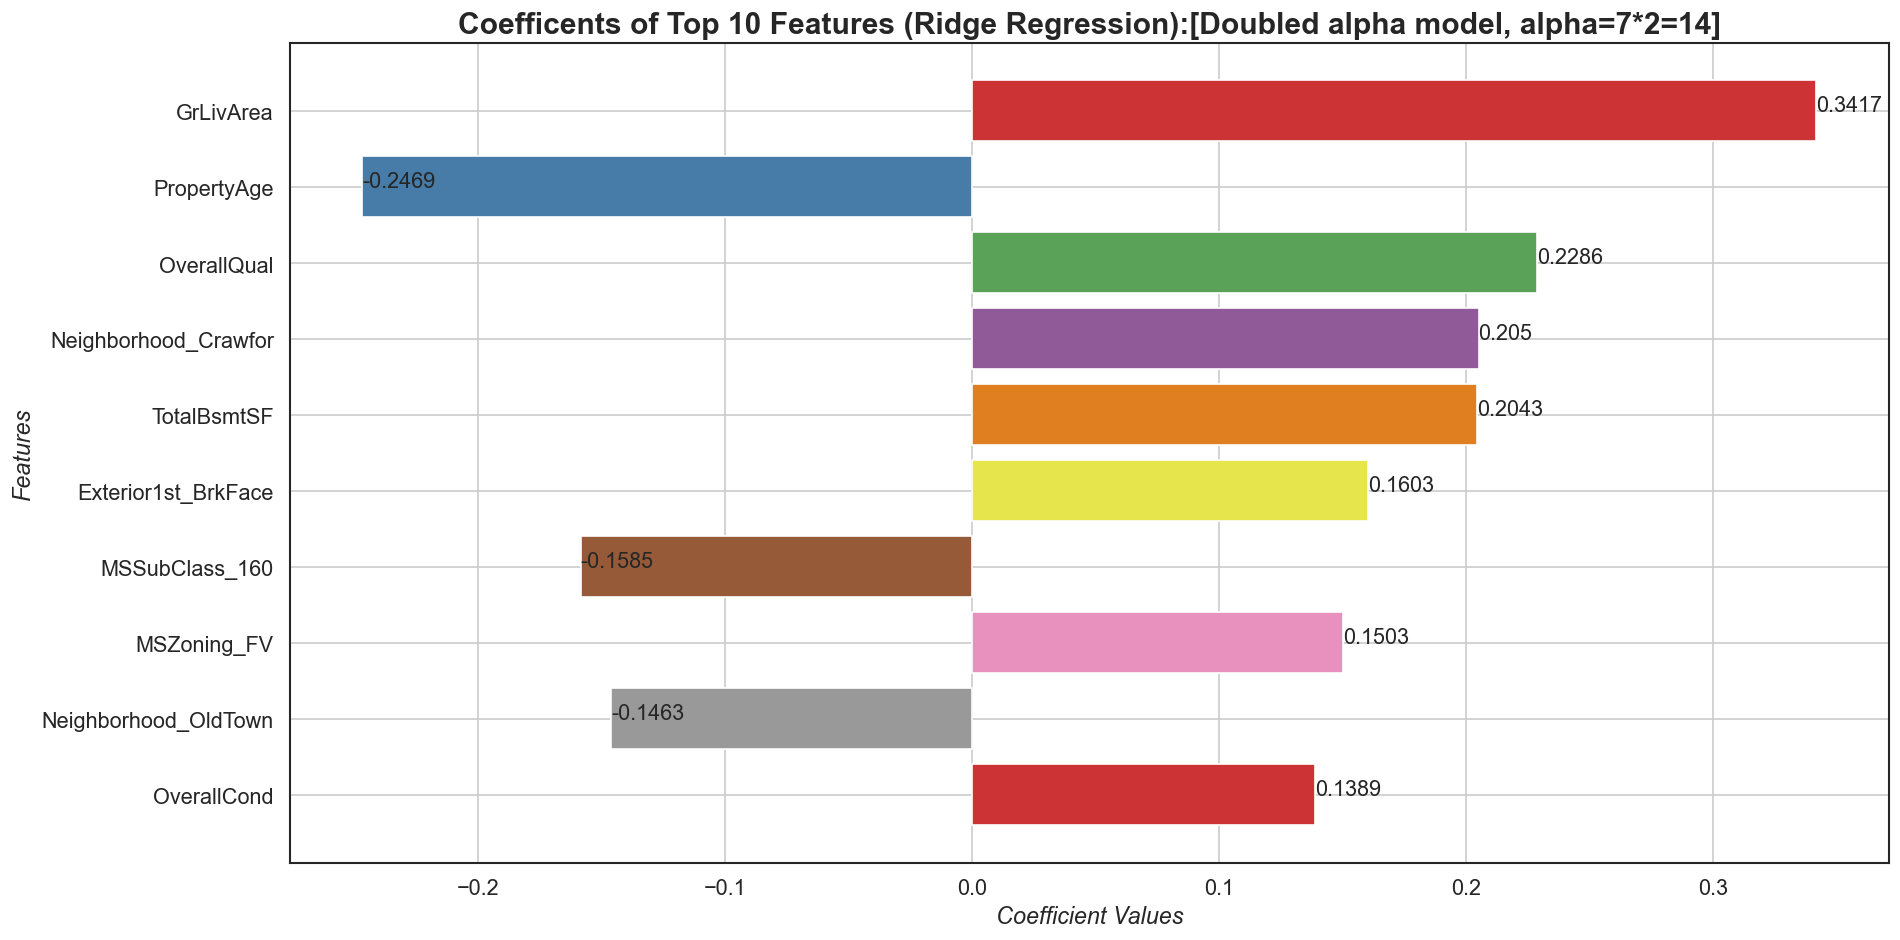

In [314]:
##Coefficient value plot (Ridge Regression)

top10_ridge_df= ridge_df.loc[:9] #Ridge_df with top 10 coefficients

sns.set(style='white')
plt.figure(figsize=(16,8), dpi=120)
ax3= sns.barplot(y=top10_ridge_df['Features'], x=top10_ridge_df['Coefficient'], palette='Set1')

plt.xlabel('Coefficient Values', fontsize= 14, fontstyle='italic')
plt.ylabel('Features' , fontsize= 14, fontstyle='italic')
plt.title('Coefficents of Top 10 Features (Ridge Regression):[Doubled alpha model, alpha=7*2=14]', fontsize=18,fontweight='bold')

coef= top10_ridge_df['Coefficient'] #Storing coefficient values
for index, value in enumerate(coef):
    plt.text(value, index, str(value), fontsize=13)

plt.grid(True)
plt.xticks(fontsize=13)
plt.yticks(fontsize=13)
plt.autoscale()
plt.tight_layout()
plt.show()

In [309]:
print("For Ridge Regression (Doubled alpha model, alpha=7*2=14): \n","*"*125)
print("The most important top10 predictor variables after the change is implemented are as follows:\n\n",\
      list(top10_ridge_df['Features']),"\n", "*"*125)

For Ridge Regression (Doubled alpha model, alpha=7*2=14): 
 *****************************************************************************************************************************
The most important top10 predictor variables after the change is implemented are as follows:

 ['GrLivArea', 'PropertyAge', 'OverallQual', 'Neighborhood_Crawfor', 'TotalBsmtSF', 'Exterior1st_BrkFace', 'MSSubClass_160', 'MSZoning_FV', 'Neighborhood_OldTown', 'OverallCond'] 
 *****************************************************************************************************************************


# Lasso Regression

In [310]:
##Checking the outcome: coefficient values with double the value of alpha = 0.001*2 = 0.002 (For Lasso Regression)

lasso = Lasso(alpha=0.002)
        
lasso.fit(X_train, y_train) 
print("Intercept: ", lasso.intercept_)
print("Coefficients:\n ", lasso.coef_)

Intercept:  -0.02837111166260886
Coefficients:
  [ 0.06080285  0.23690911  0.13938283 -0.10387202  0.20506941  0.35202651
  0.07907767 -0.25912706  0.07566867 -0.00540079  0.         -0.
  0.         -0.14265259 -0.17686434 -0.          0.18036996  0.10561561
  0.         -0.00304345  0.28024484 -0.05769779  0.         -0.
 -0.04555448 -0.         -0.         -0.02891781 -0.          0.09674509
 -0.09700635 -0.         -0.01697986 -0.01634005  0.03566586 -0.
  0.         -0.         -0.          0.04399428  0.          0.
 -0.          0.         -0.08416656 -0.          0.07628218 -0.03820098
  0.         -0.          0.18140182 -0.         -0.         -0.05664145]


In [311]:
##RMaking predictions for test and train sets: Lasso Regression Model
y_pred_train_l = lasso.predict(X_train)
y_pred_test_l = lasso.predict(X_test)

##R2 score for Lasso Regression Model
r2_score_lasso_train = r2_score(y_true= y_train, y_pred= y_pred_train_l)
r2_score_lasso_test = r2_score(y_true= y_test, y_pred= y_pred_test_l)

##Check the mean squared error (MSE) for Lasso Regression Model
MSE_lasso_train = mean_squared_error(y_train, y_pred_train_l)
MSE_lasso_test = mean_squared_error(y_test, y_pred_test_l)

##Mean Absolute error for train and test sets
MAE_lasso_train = mean_absolute_error(y_train, y_pred_train_l)
MAE_lasso_test = mean_absolute_error(y_test, y_pred_test_l)

##Root Mean Squared Error for Train and Test Sets
RMSE_lasso_train = np.sqrt(MSE_lasso_train)
RMSE_lasso_test = np.sqrt(MSE_lasso_test)

print("For Lasso Regression Model: (Doubled alpha model: alpha:0.001*2 = 0.002)\n","*"*40)
print("\nFor Train Set:\nR2 score:",r2_score_lasso_train,"\nMSE score:",MSE_lasso_train,"\nMAE score:",MAE_lasso_train,\
     "\nRMSE score:",RMSE_lasso_train)
print("\nFor Test Set:\nR2 score:",r2_score_lasso_test,"\nMSE score:",MSE_lasso_test,"\nMAE score:",MAE_lasso_test,\
      "\nRMSE score:",RMSE_lasso_test,"\n","*"*40)

For Lasso Regression Model: (Doubled alpha model: alpha:0.001*2 = 0.002)
 ****************************************

For Train Set:
R2 score: 0.9193839812394939 
MSE score: 0.08061601876050603 
MAE score: 0.20029448012110793 
RMSE score: 0.2839296017686533

For Test Set:
R2 score: 0.8713606000987777 
MSE score: 0.10740729761954965 
MAE score: 0.22389525601265237 
RMSE score: 0.3277305259196184 
 ****************************************
